# Compare multi fitted atmospheric parameters with MERRA2

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : April 25th 2023
- last update : April 25th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

## MERRA2

In [5]:
path_merra2="data/merra2"
files_merra2=["MERRA2_2022_inst1_2d_asm_Nx_M2I1NXASM_lsst_AllYear.csv","MERRA2_2023_inst1_2d_asm_Nx_M2I1NXASM_lsst_AllYear.csv"]

In [6]:
all_merra2 = []
for file in files_merra2:
    merra2 = pd.read_csv(os.path.join(path_merra2,file))
    all_merra2.append(merra2)

In [7]:
merra2 = pd.concat(all_merra2,axis=0)

In [8]:
all_merra2_datetime = [ Time(str_time).to_datetime() for str_time in merra2['time'] ]
pwv_merra2 = merra2['TQV']
oz_merra2 = merra2['TO3']

Text(0.5, 1.0, 'precipitable water vapor in MERRA2 in 2022 and 2023')

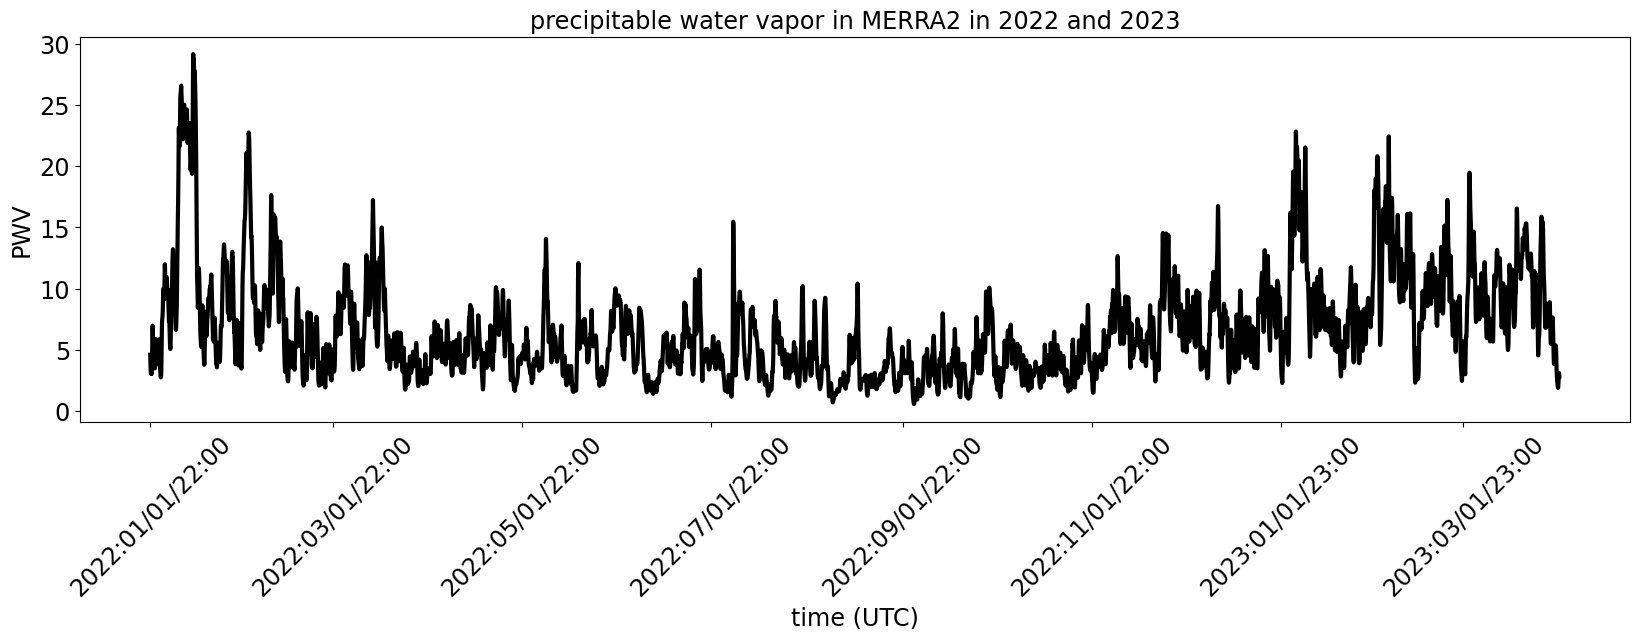

In [9]:
fig=plt.figure(figsize=(20,5))
    
ax=fig.add_subplot(111)
#myFmt = mdates.DateFormatter('%H:%M')
myFmt = mdates.DateFormatter('%Y:%D:%H')
ax.xaxis.set_major_formatter(myFmt)

ax.plot(all_merra2_datetime,pwv_merra2 ,'-',color='k',lw=3)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")
ax.set_ylabel("PWV")
ax.set_title('precipitable water vapor in MERRA2 in 2022 and 2023')

In [10]:
all_merra2_datetime = [ Time(str_time).to_datetime() for str_time in merra2['time'] ]
oz_merra2 = merra2['TO3']

(0.0, 600.0)

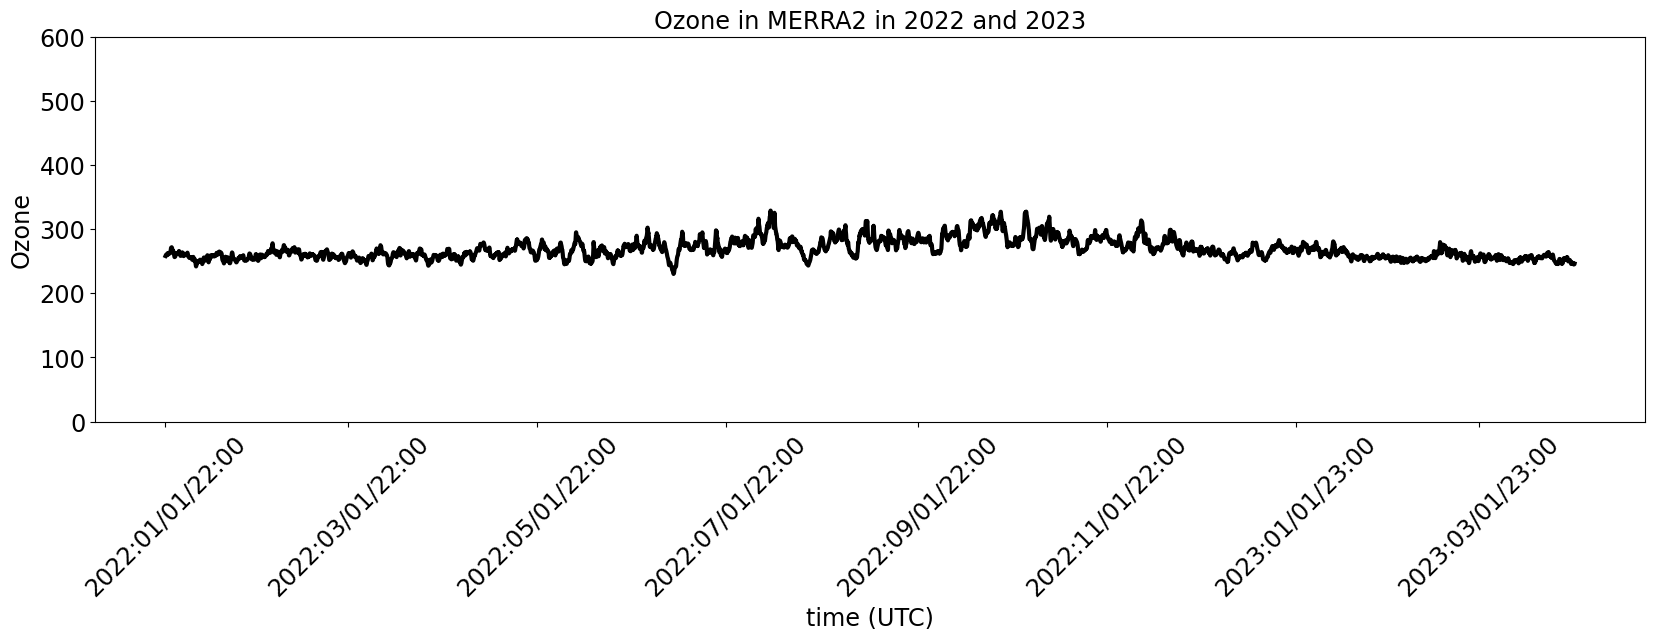

In [11]:
fig=plt.figure(figsize=(20,5))
    
ax=fig.add_subplot(111)
#myFmt = mdates.DateFormatter('%H:%M')
myFmt = mdates.DateFormatter('%Y:%D:%H')
ax.xaxis.set_major_formatter(myFmt)

ax.plot(all_merra2_datetime,oz_merra2 ,'-',color='k',lw=3)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")
ax.set_ylabel("Ozone")
ax.set_title('Ozone in MERRA2 in 2022 and 2023')
ax.set_ylim(0,600)

## Data

In [12]:
DATE="2022 - 2023"
#DATE="2022/03/17 and 2022/06 (29,30)"

In [13]:
FLAG_SELECT_POLAR = True
FLAG_SELECT_REMOVE_BIGSIGMA = True

In [14]:
if FLAG_SELECT_POLAR:
    tag_stars = "HD185975_star"
else:
    tag_stars = "all_stars"

In [15]:
path_out = "dataout/fitparamatm"

In [16]:
filenames = [
"multifitcovparamatm-2022-09-27-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-09-28-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-09-29-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-10-12-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-10-26-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-10-27-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-11-09-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-11-10-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-11-23-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-12-08-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-12-09-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-01-17-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-01-18-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-01-19-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-14-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-15-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-16-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-28-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-01-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-02-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-15-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-16-empty~holo4_003-psf2dffm-polar.csv",
]

In [18]:
NDAYS = len(filenames)
tags = [
    "2022/09/27","2022/09/29","2022/09/29",
    "2022/10/12","2022/10/26","2022/10/27",
    "2022/11/09","2022/11/10","2022/11/23","2022/12/08","2022/12/09",
    "2023/01/17","2023/01/18","2023/01/19",
    "2023/02/14","2023/02/15","2023/02/16","2023/02/28",
    "2023/03/01","2023/03/02","2023/03/15","2023/03/16"
]

In [19]:
all_df = []
for filename in filenames:
    df = pd.read_csv(os.path.join(path_out,filename), index_col=0)
    df=df.dropna(axis=0)
    
    if FLAG_SELECT_POLAR:
        df = df[df["spec_target_label"]=='HD185975']
        
    if FLAG_SELECT_REMOVE_BIGSIGMA:
        df =df[df["pwv_sig"]<1]
    all_df.append(df)

In [20]:
df

index       exposure                   spec_date_obs spec_target_label   
0       0  2023031600465  2023-03-17T06:20:56.082001145Z          HD185975  \
1       1  2023031600466  2023-03-17T06:21:39.074005228Z          HD185975   
2       8  2023031600505  2023-03-17T06:52:06.172502735Z          HD185975   
3       9  2023031600506  2023-03-17T06:52:49.175495727Z          HD185975   
4      16  2023031600544  2023-03-17T07:26:52.619493301Z          HD185975   
5      17  2023031600545  2023-03-17T07:27:35.585004713Z          HD185975   
6      26  2023031600589  2023-03-17T07:59:53.341001019Z          HD185975   
7      27  2023031600590  2023-03-17T08:00:36.347990813Z          HD185975   
8      37  2023031600645  2023-03-17T08:43:51.125005011Z          HD185975   
9      38  2023031600646  2023-03-17T08:44:34.193006376Z          HD185975   
10     45  2023031600681  2023-03-17T09:17:21.585506918Z          HD185975   
11     46  2023031600682  2023-03-17T09:18:04.497498865Z          HD185975   

   spec_filter_label  spec_airmass  spec_pressure  spec_temperature   
0              empty      2.034006              0                 0  \
1              empty      2.033523              0                 0   
2              empty      2.013025              0                 0   
3              empty      2.012533              0                 0   
4              empty      1.989428              0                 0   
5              empty      1.988936              0                 0   
6              empty      1.967435              0                 0   
7              empty      1.966954              0                 0   
8              empty      1.939320              0                 0   
9              empty      1.938865              0                 0   
10             empty      1.919228              0                 0   
11             empty      1.918809              0                 0   

    spec_humidity  spec_hour_angle  ...   egrey_3     SNR_3     chi2_4   
0               0      -107.983587  ...  0.004077  0.090913  26.186849  \
1               0      -107.803713  ...  0.001320  0.059766   3.779965   
2               0      -100.287611  ...  0.003339  0.218959  17.977881   
3               0      -100.107582  ...  0.002705  0.003425  11.050183   
4               0       -91.696580  ...  0.004178  0.173574  87.636143   
5               0       -91.517218  ...  0.003387  0.000556  16.140642   
6               0       -83.628469  ...  0.002581  0.046287  11.629380   
7               0       -83.448648  ...  0.001948  0.014420   6.401902   
8               0       -72.914176  ...  0.003266  0.028791  15.038974   
9               0       -72.734137  ...  0.002576  0.049594  10.624450   
10              0       -64.681493  ...  0.001605  0.004579   4.447019   
11              0       -64.502596  ...  0.002151  0.062389   6.013407   

       pwv_4    grey_4    epwv_4   egrey_4     SNR_4   pwv_avg   pwv_sig  
0   6.309265  1.000386  0.451908  0.002948  0.163989  5.485352  0.496158  
1   6.596235  1.014952  0.186864  0.001206  0.031077  6.241020  0.555942  
2   6.132925  1.013341  0.374993  0.002455  0.075281  5.413093  0.475768  
3   6.487817  1.011192  0.296783  0.001933  0.088479  5.453372  0.626046  
4   5.253455  1.011087  0.765208  0.005233  0.100871  4.109853  0.628623  
5   6.265293  1.013693  0.358565  0.002344  0.048332  5.090668  0.726499  
6   6.037212  1.015865  0.302178  0.001960  0.024015  5.283627  0.600988  
7   6.257694  1.022070  0.226937  0.001473  0.025808  5.582819  0.605181  
8   5.641604  1.014928  0.337094  0.002202  0.058981  4.584843  0.619398  
9   5.764122  1.016409  0.287014  0.001873  0.059926  4.975795  0.484521  
10  5.919923  1.029023  0.188087  0.001241  0.009370  5.508866  0.494929  
11  5.783747  1.020060  0.217599  0.001415  0.002415  4.507684  0.972110  

[12 rows x 97 columns]

In [21]:
NF =len(all_df)

In [22]:
all_df[0].head()

index       exposure                   spec_date_obs spec_target_label   
4     27  2022092700734  2022-09-28T08:44:30.712000547Z          HD185975  \
5     28  2022092700735  2022-09-28T08:45:13.622001236Z          HD185975   

  spec_filter_label  spec_airmass  spec_pressure  spec_temperature   
4             empty      2.052135              0                 0  \
5             empty      2.052582              0                 0   

   spec_humidity  spec_hour_angle  ...   egrey_3     SNR_3    chi2_4   
4              0      -239.381469  ...  0.001286  0.061369  3.751920  \
5              0      -239.202314  ...  0.002306  0.022281  6.633117   

      pwv_4    grey_4    epwv_4   egrey_4     SNR_4   pwv_avg   pwv_sig  
4  7.287261  0.642768  0.301317  0.001209  0.041826  6.452972  0.688520  
5  7.231863  0.989349  0.325393  0.002020  0.091236  6.150769  0.815311  

[2 rows x 97 columns]

In [23]:
hls_colors = sns.color_palette("hls", NF)

## Airmass

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_45624/1147230304.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)


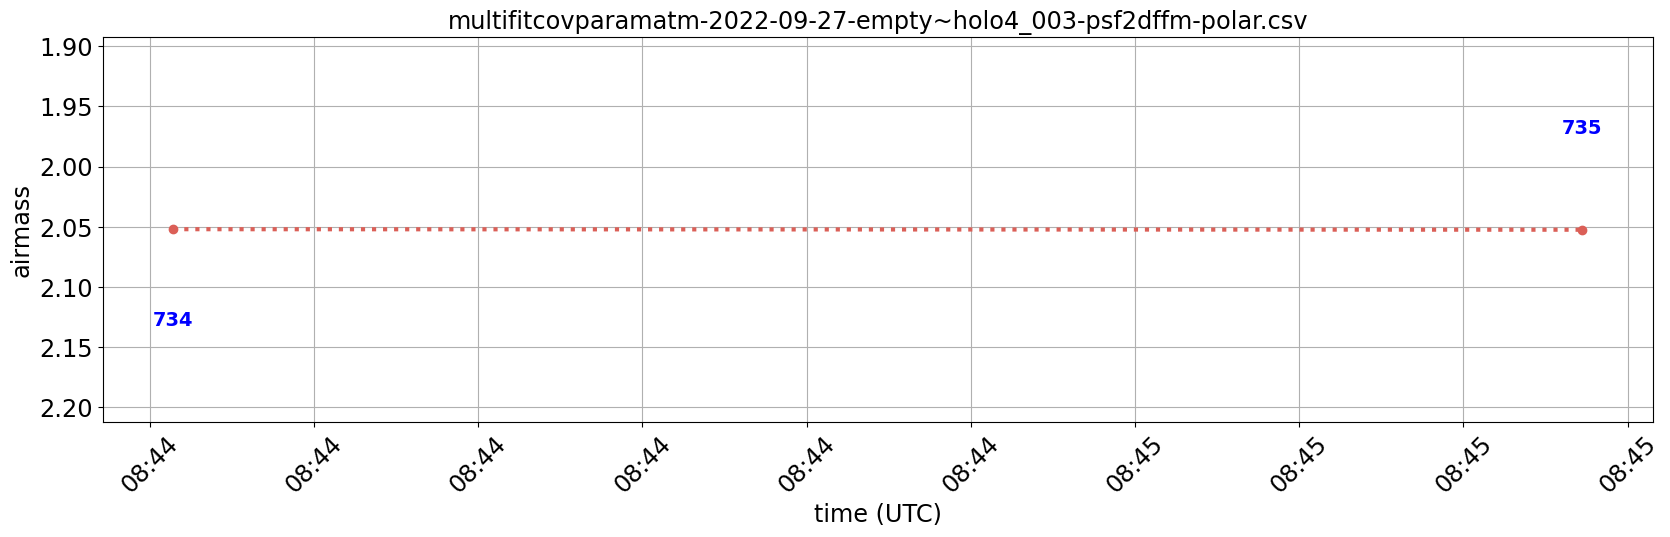

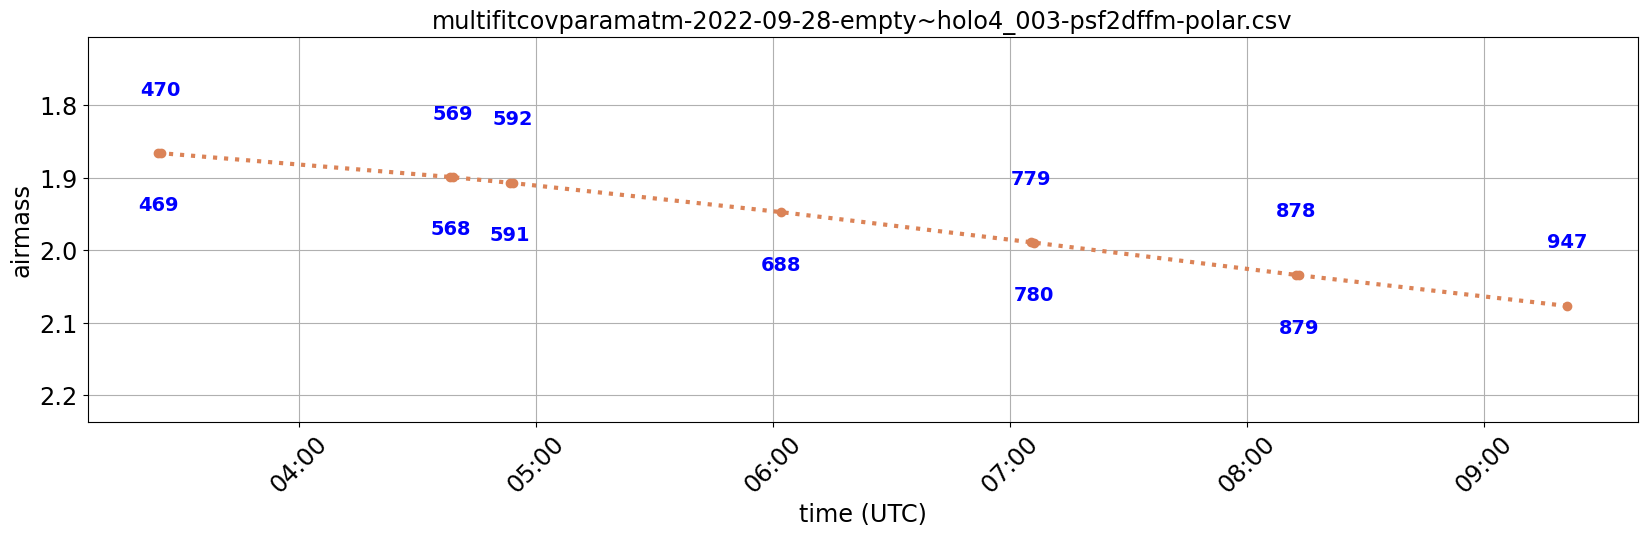

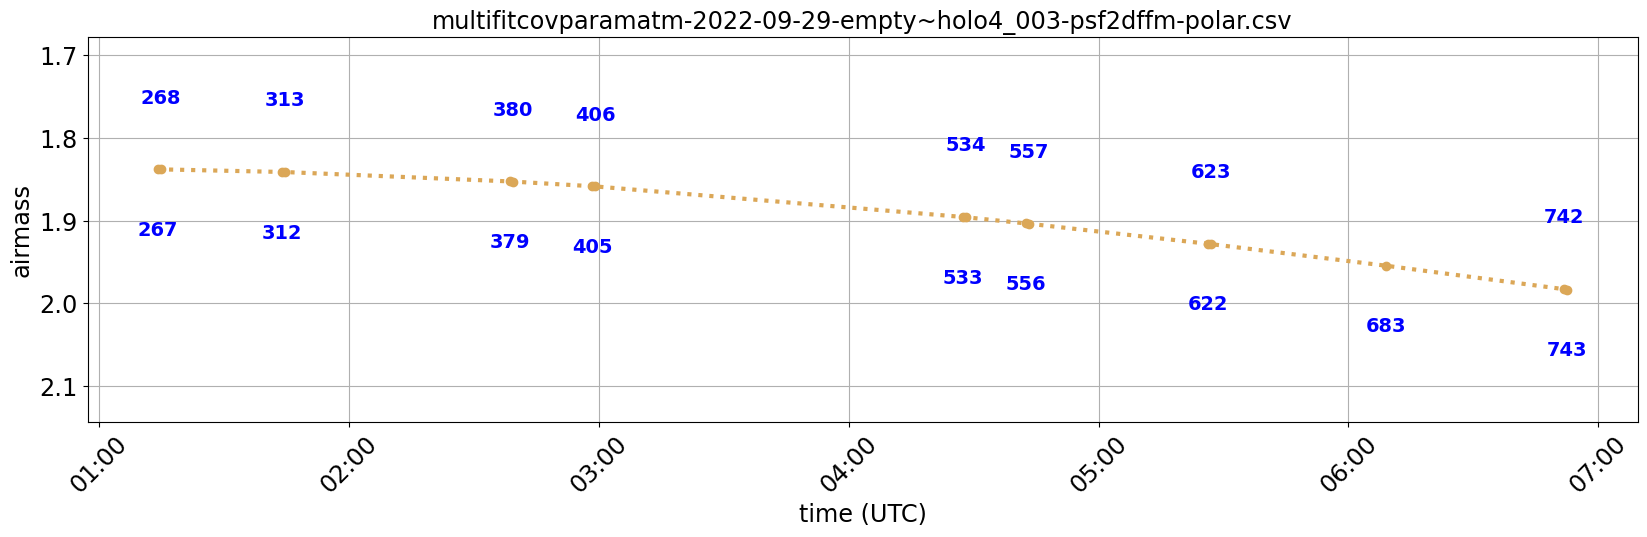

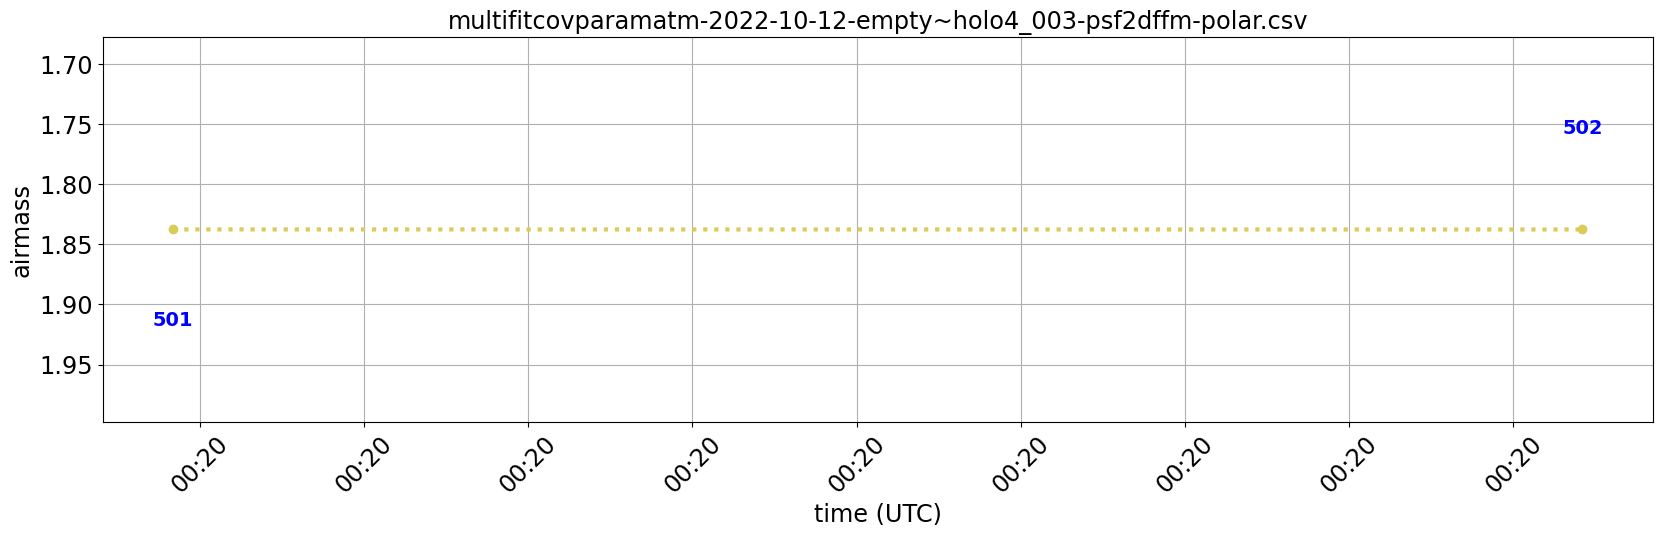

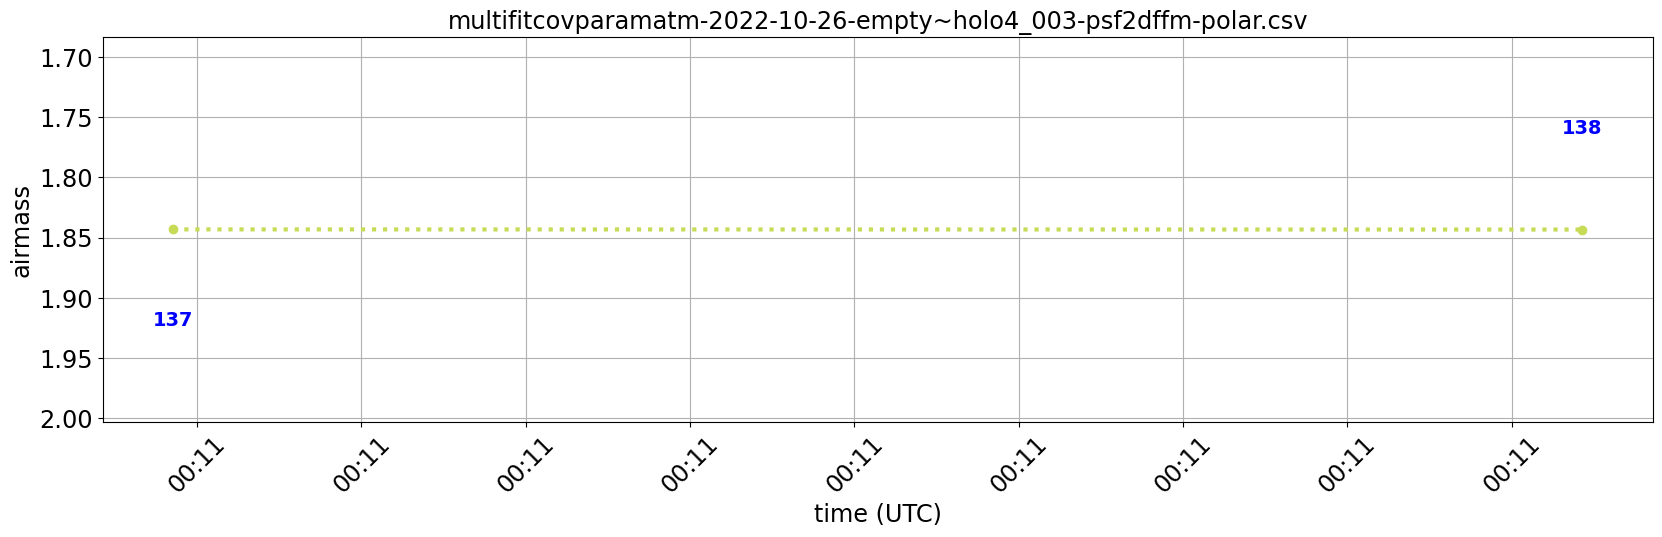

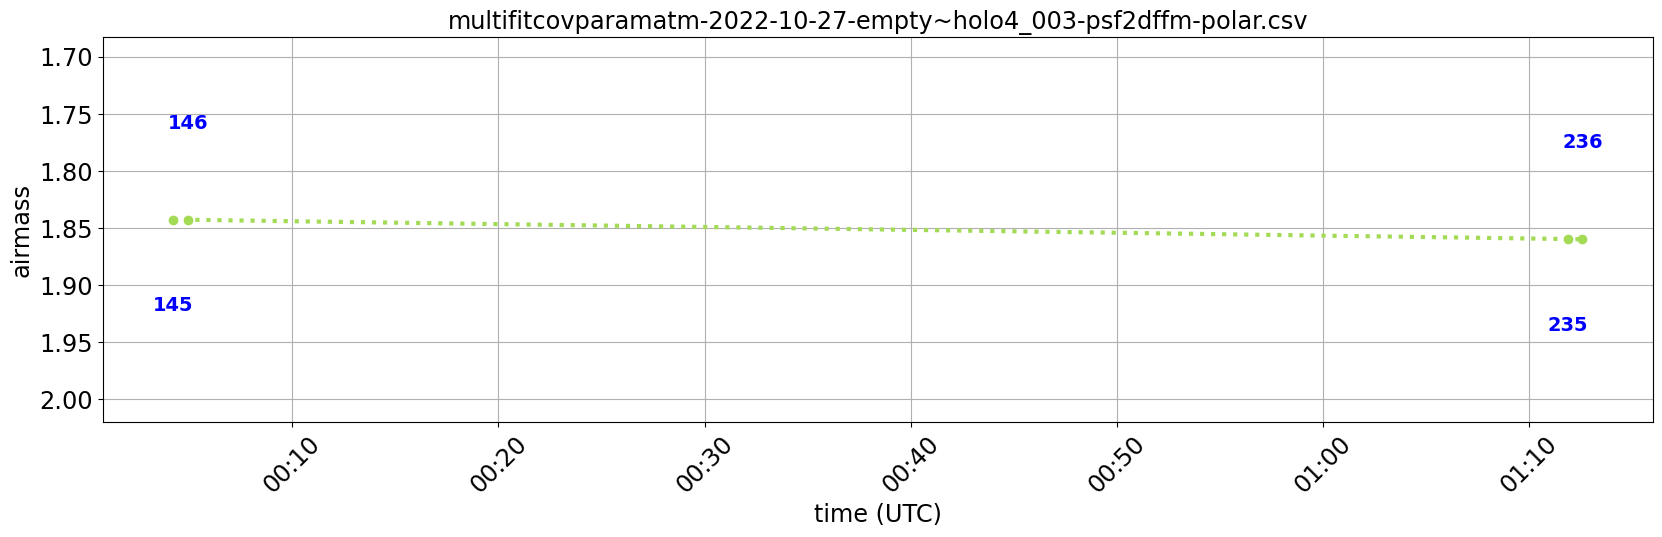

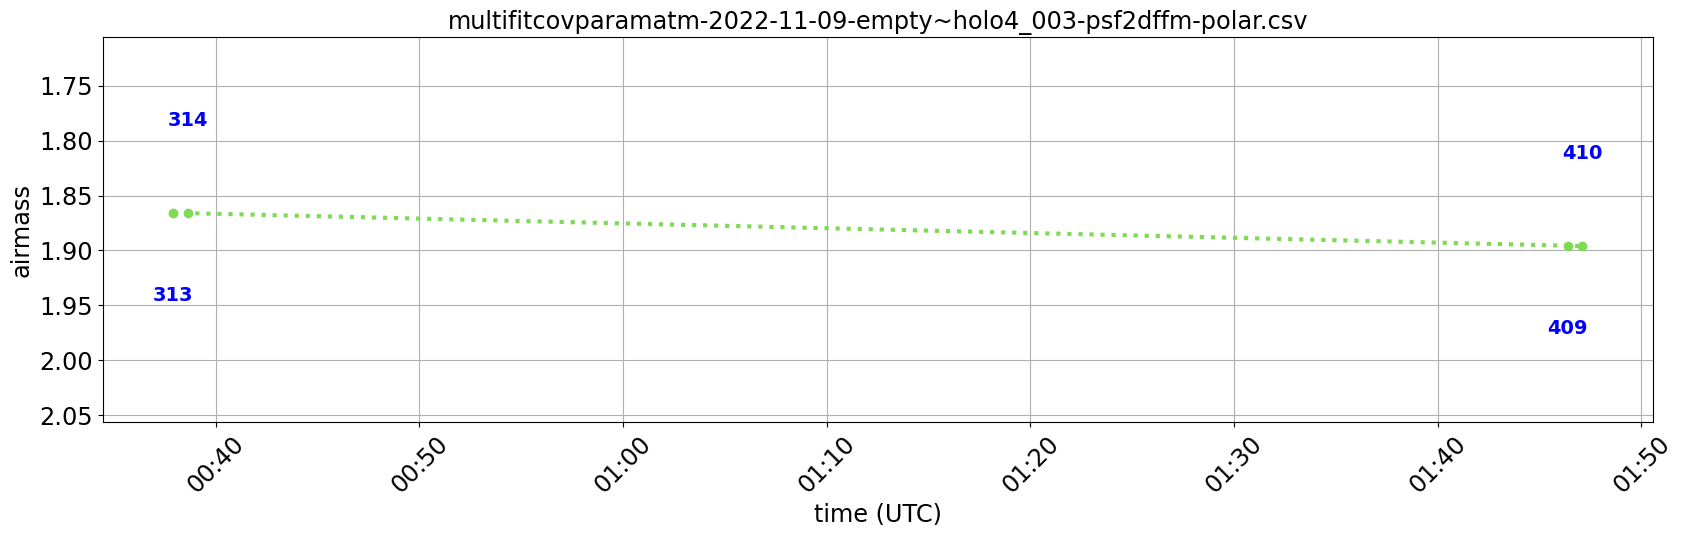

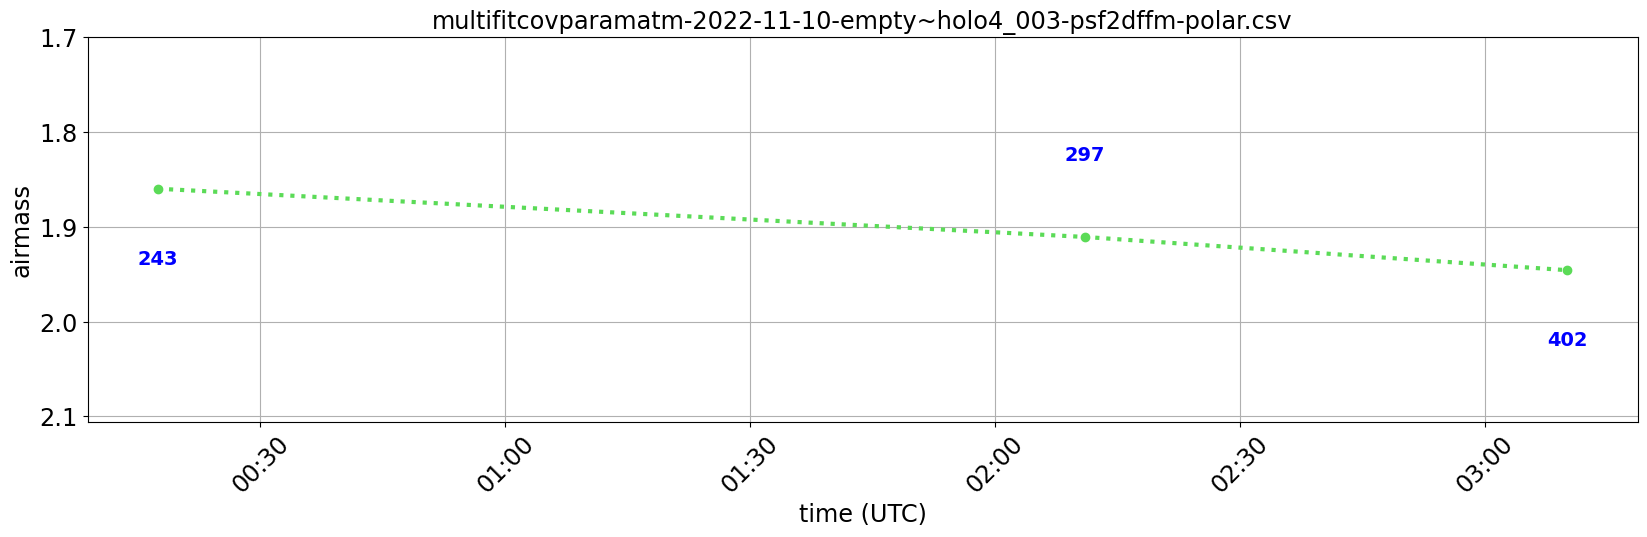

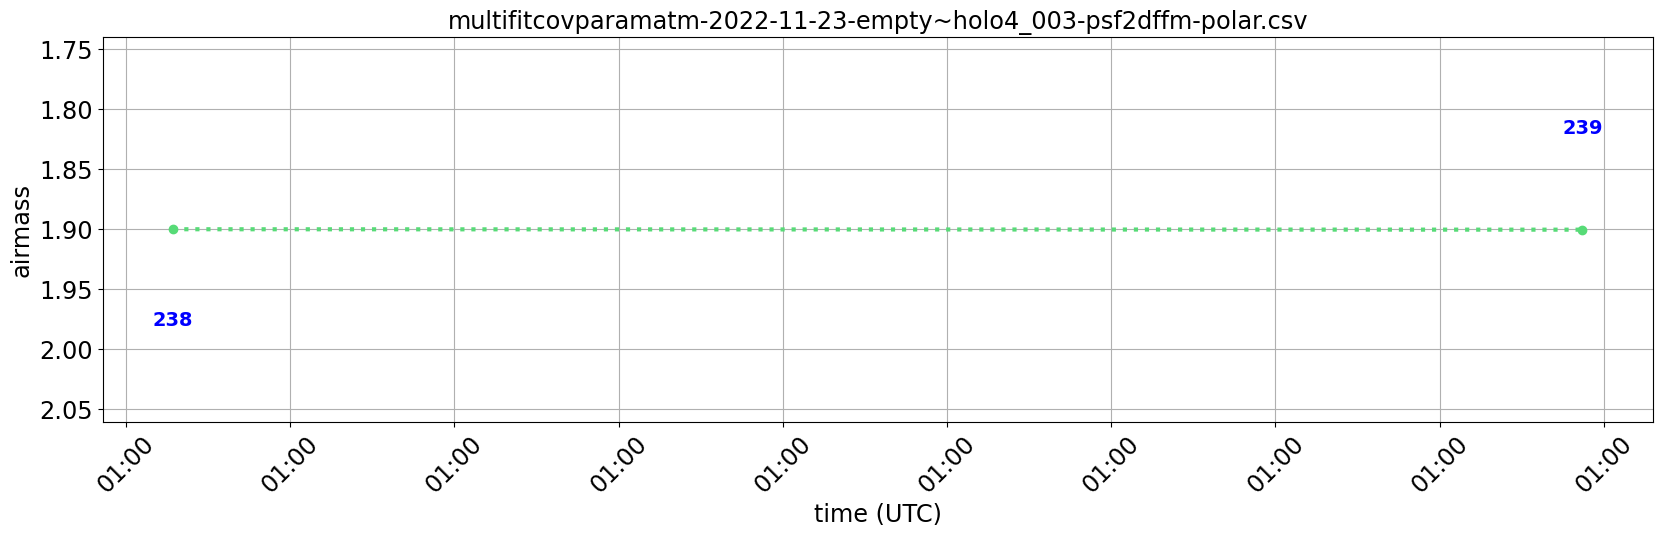

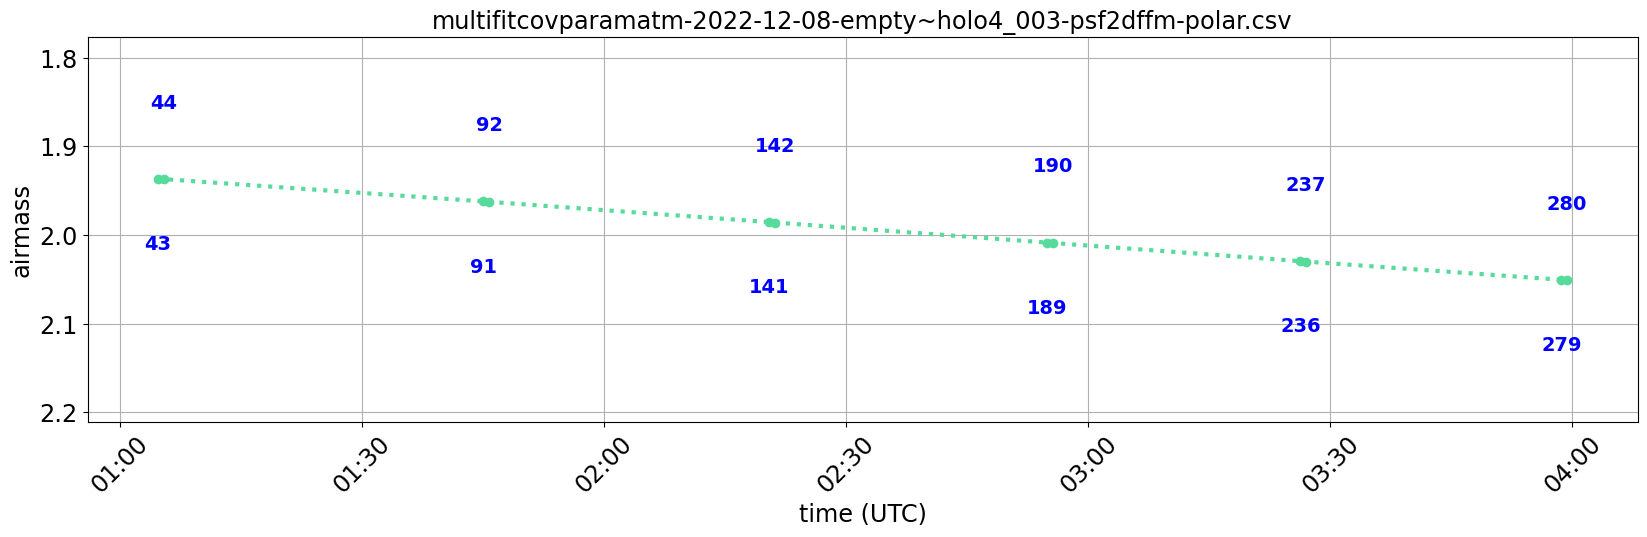

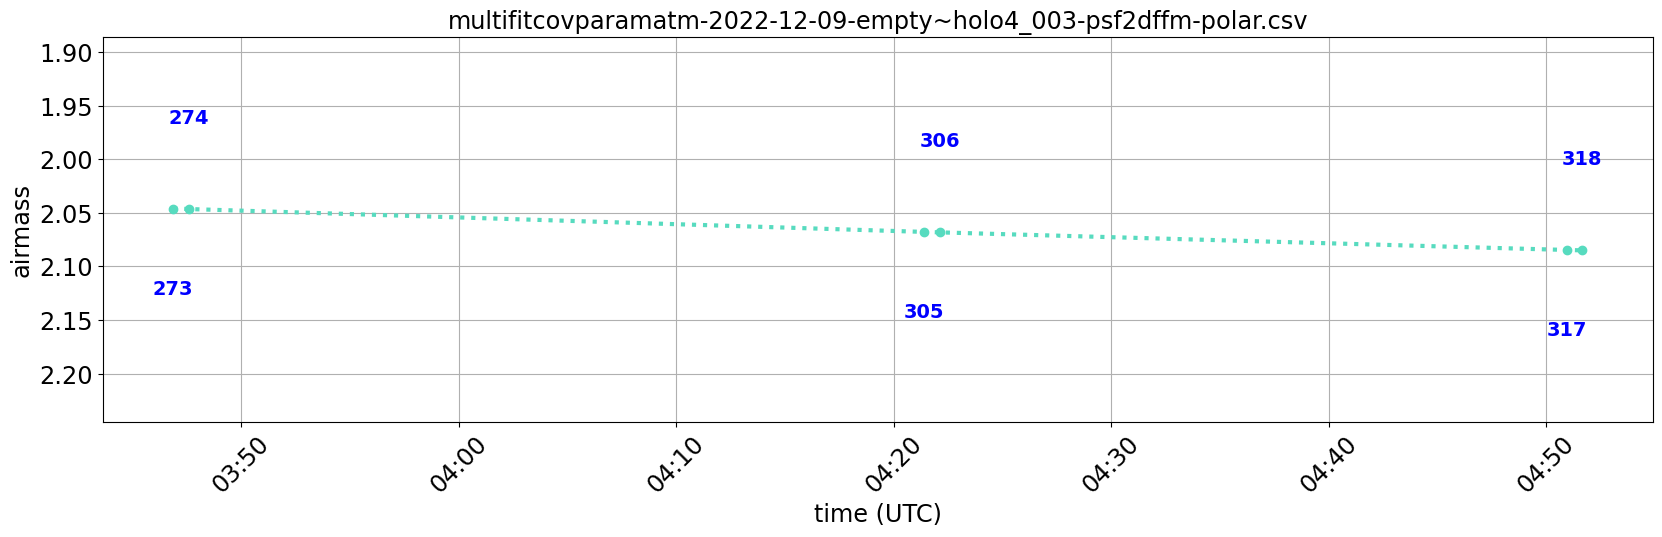

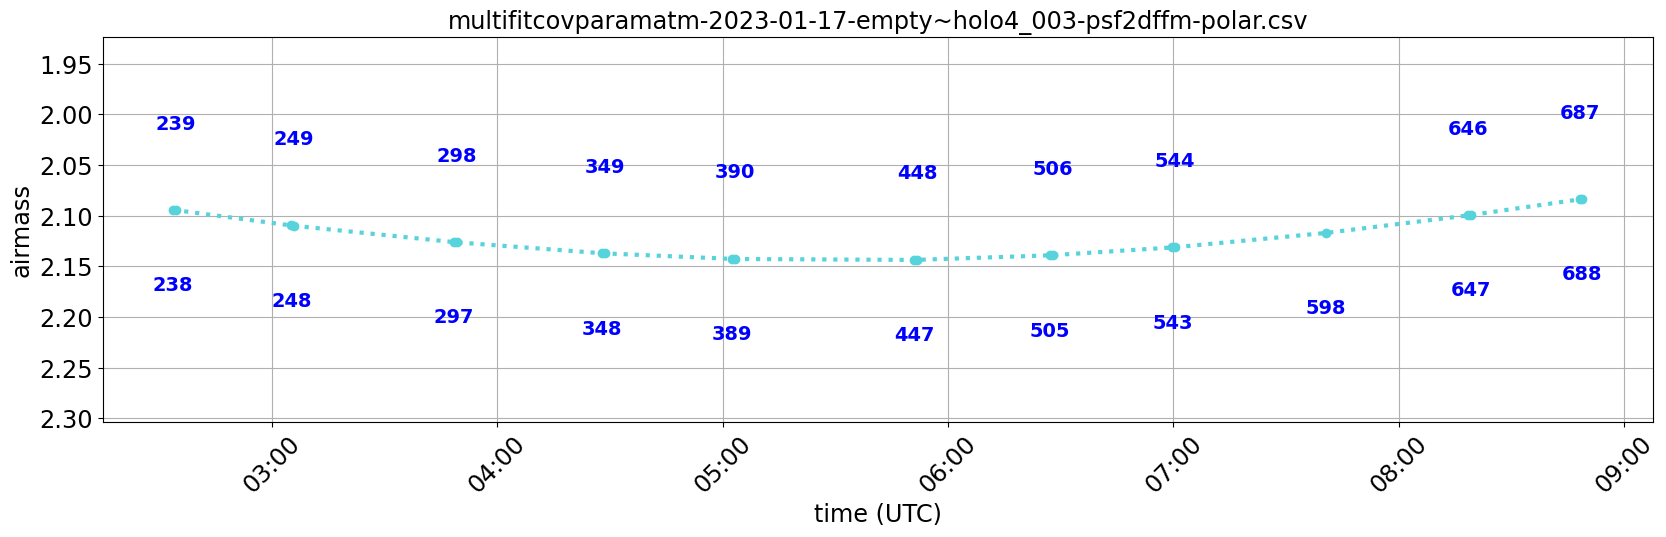

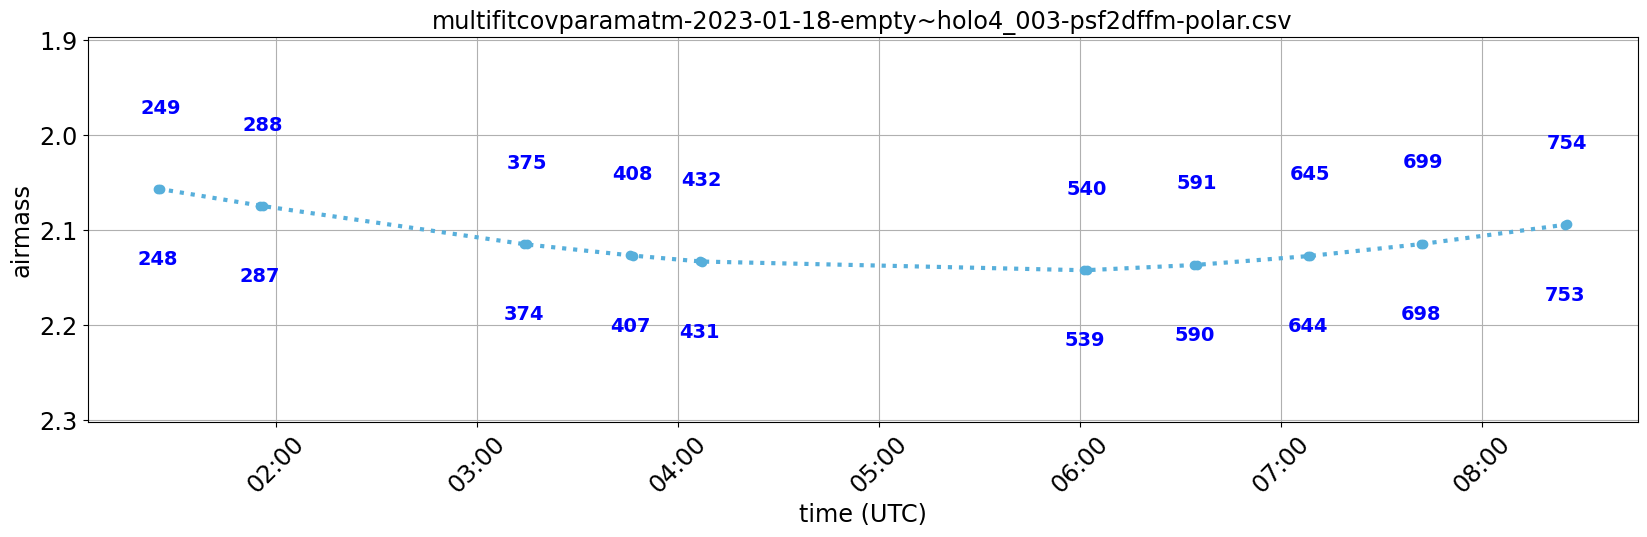

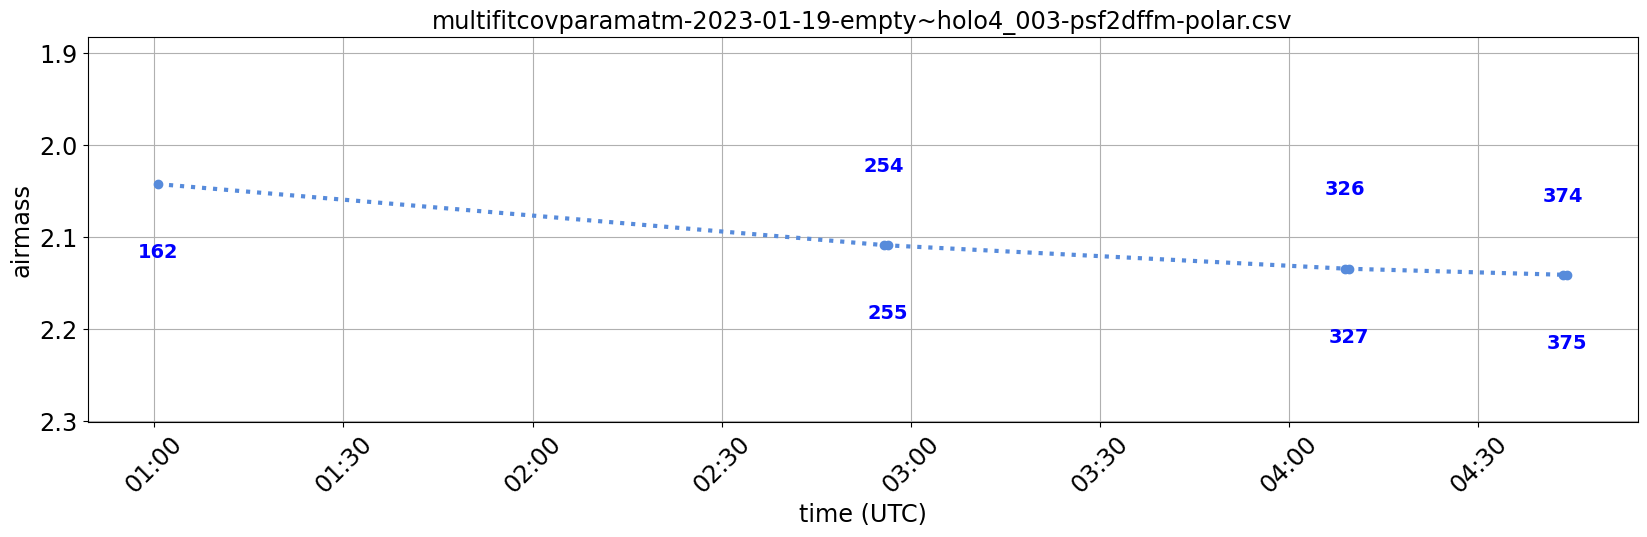

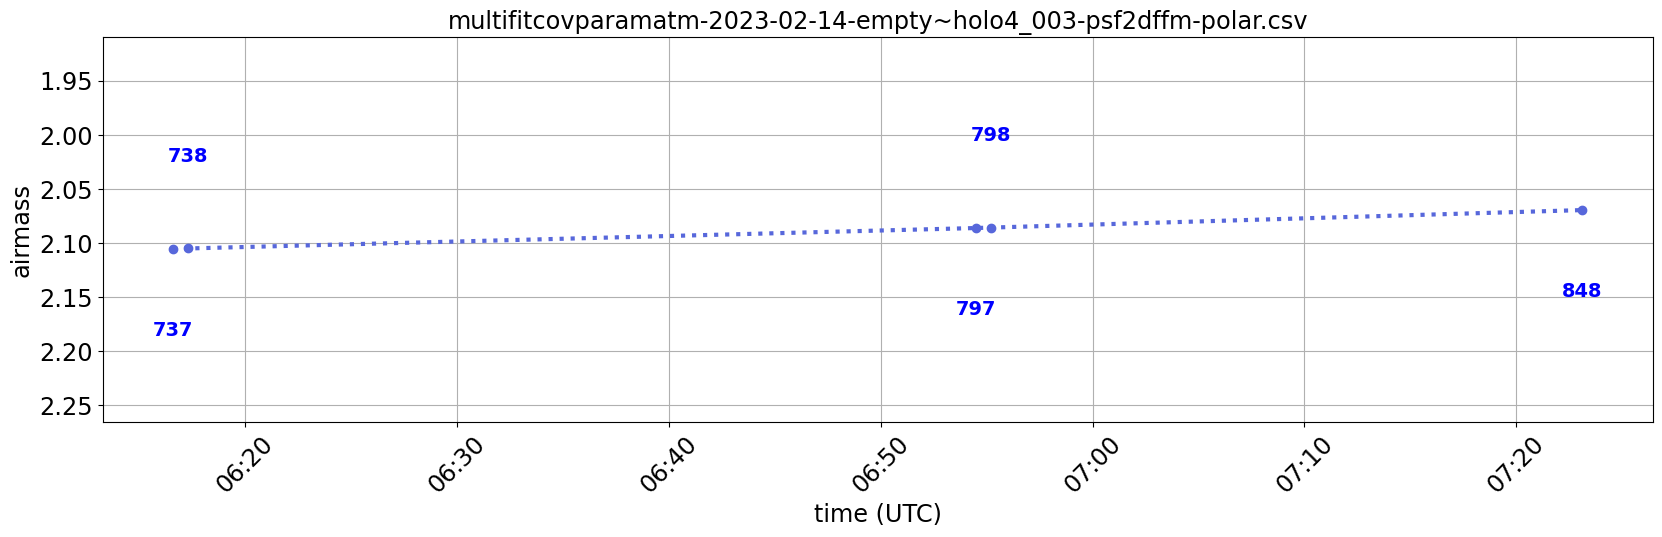

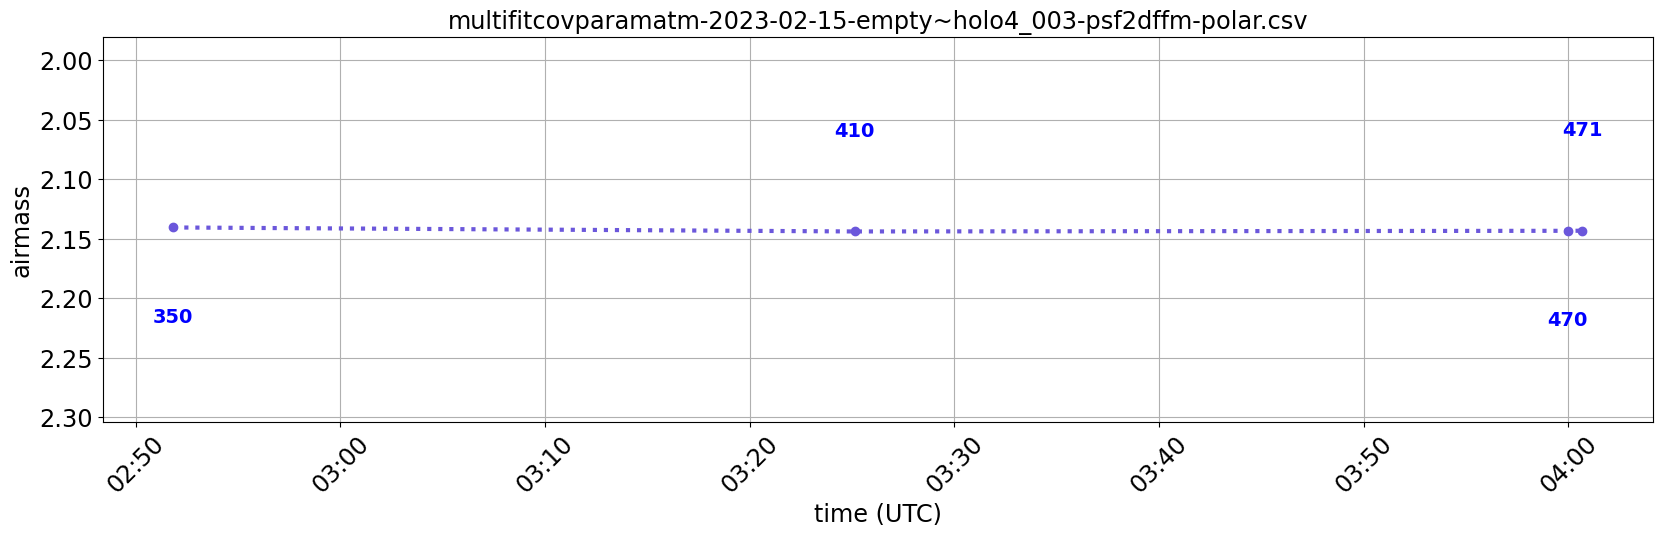

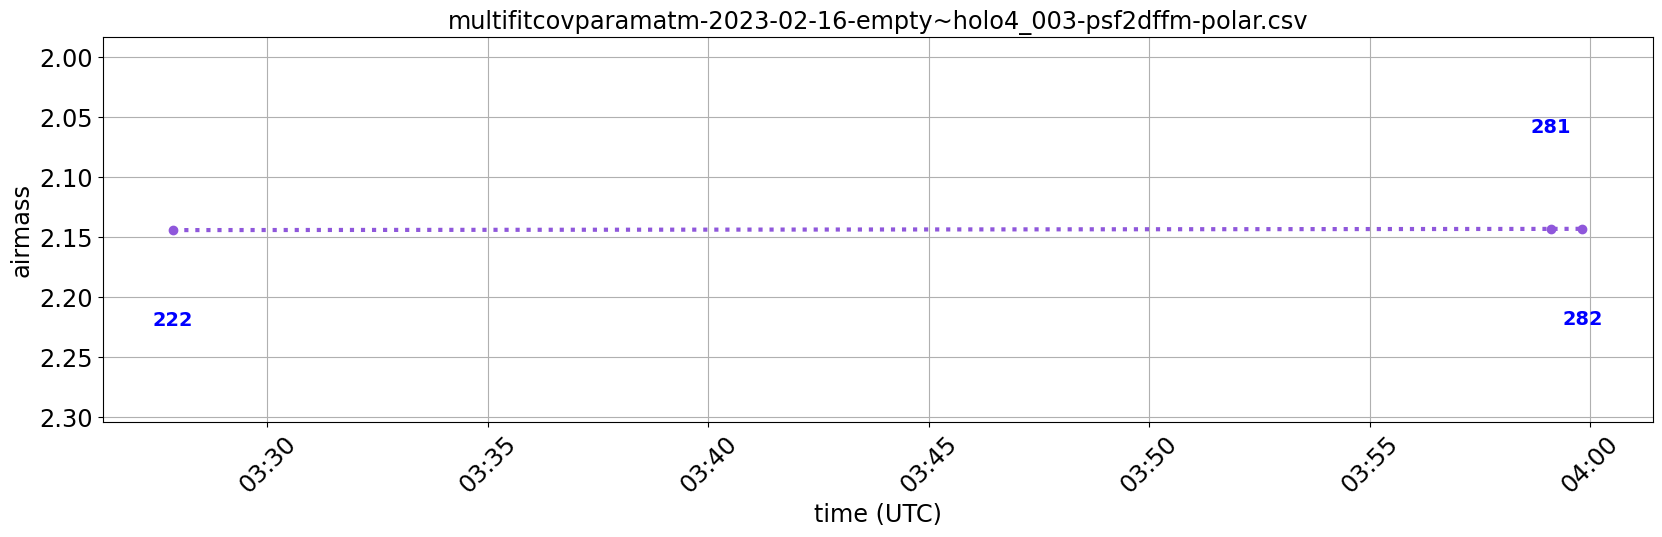

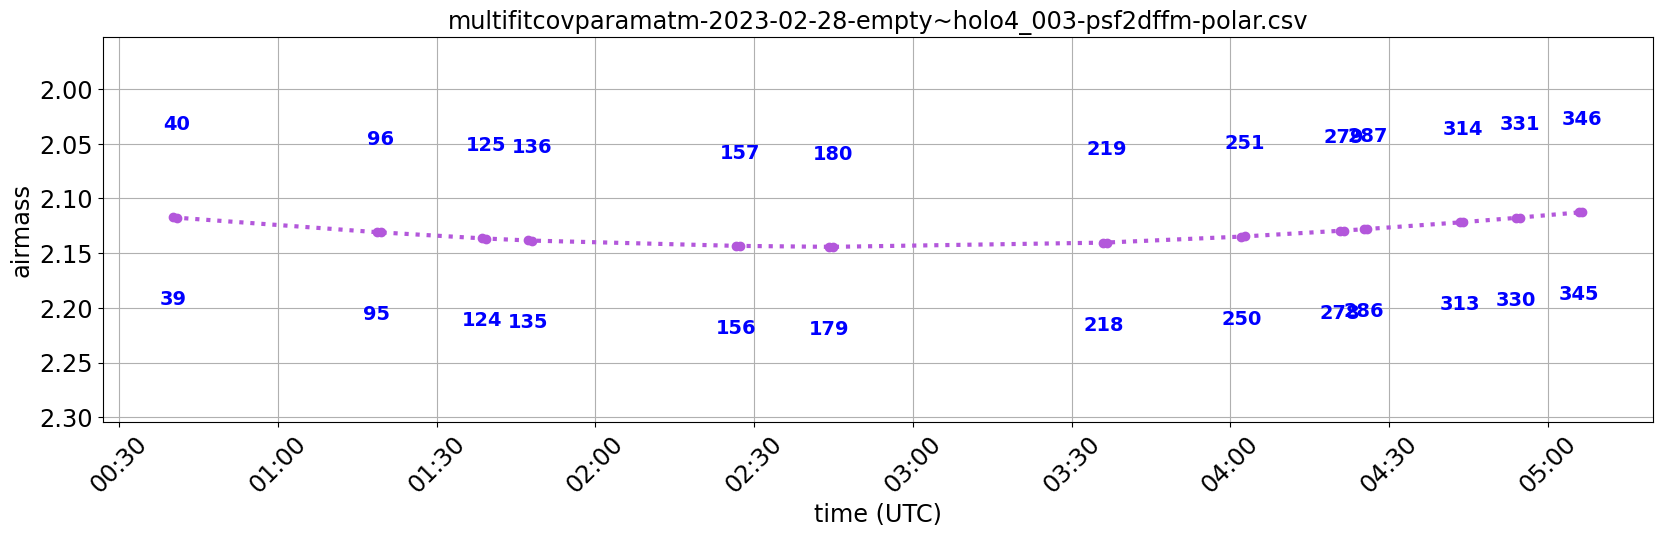

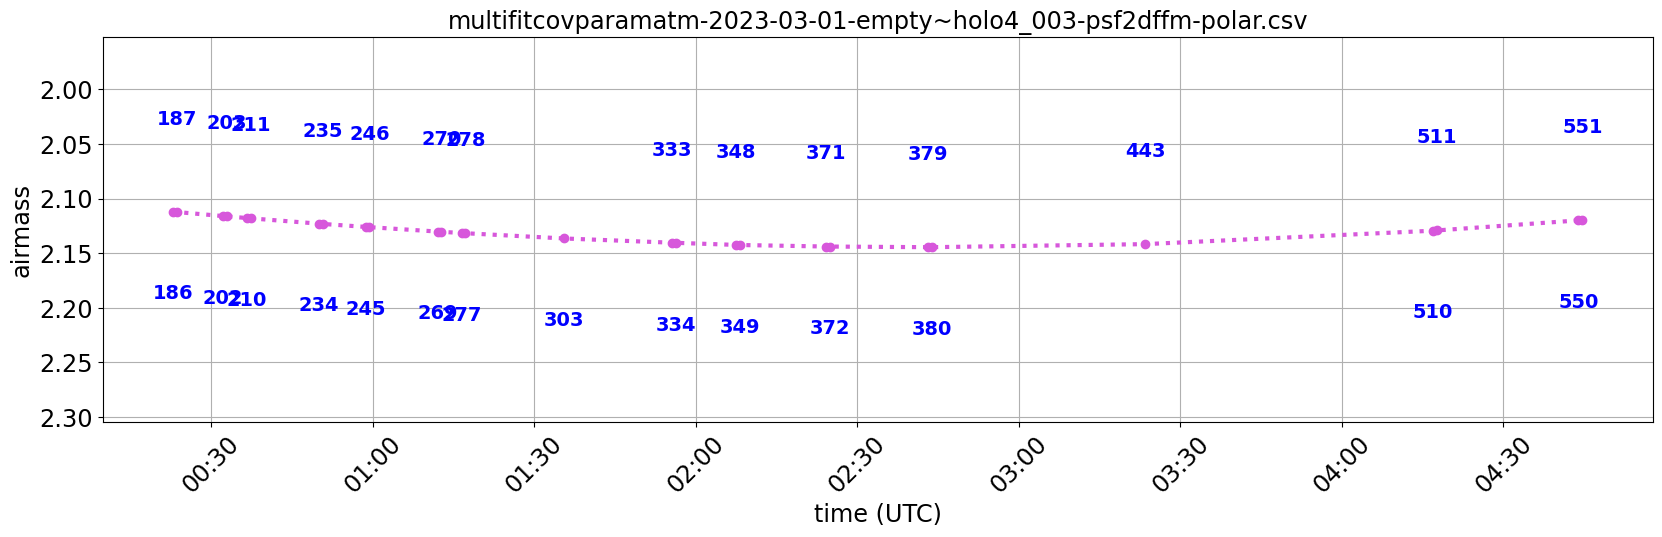

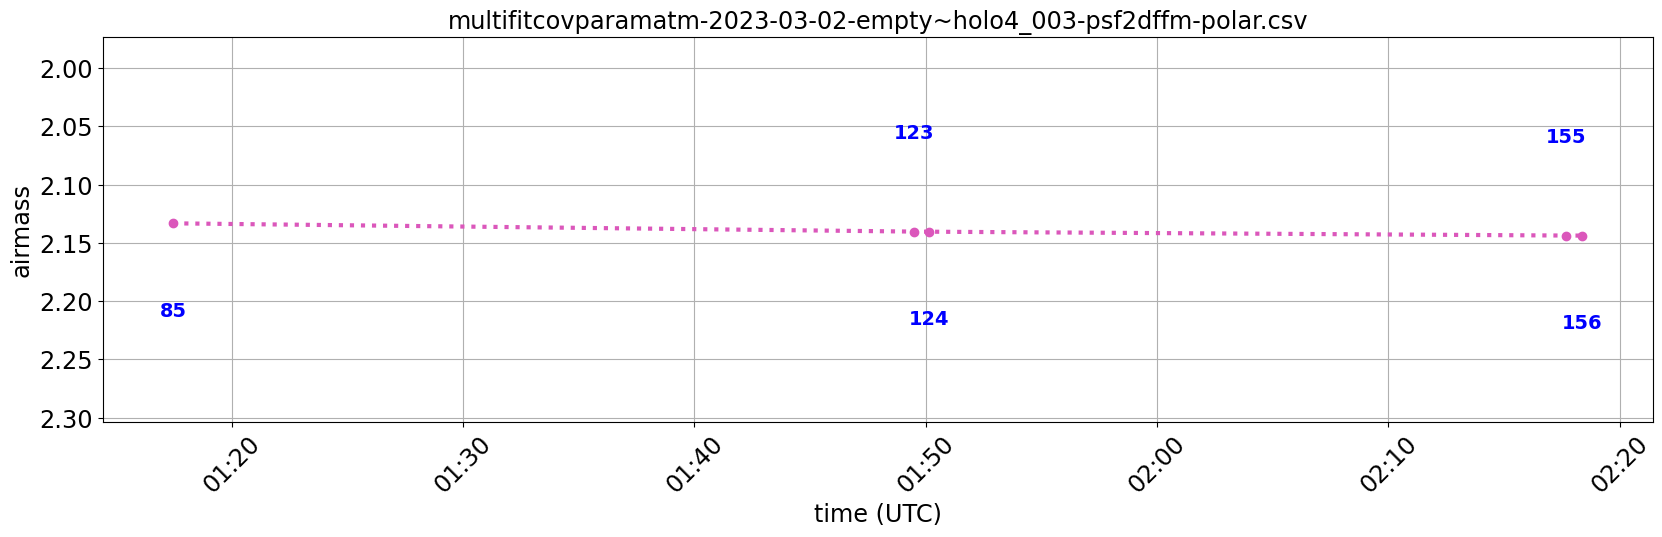

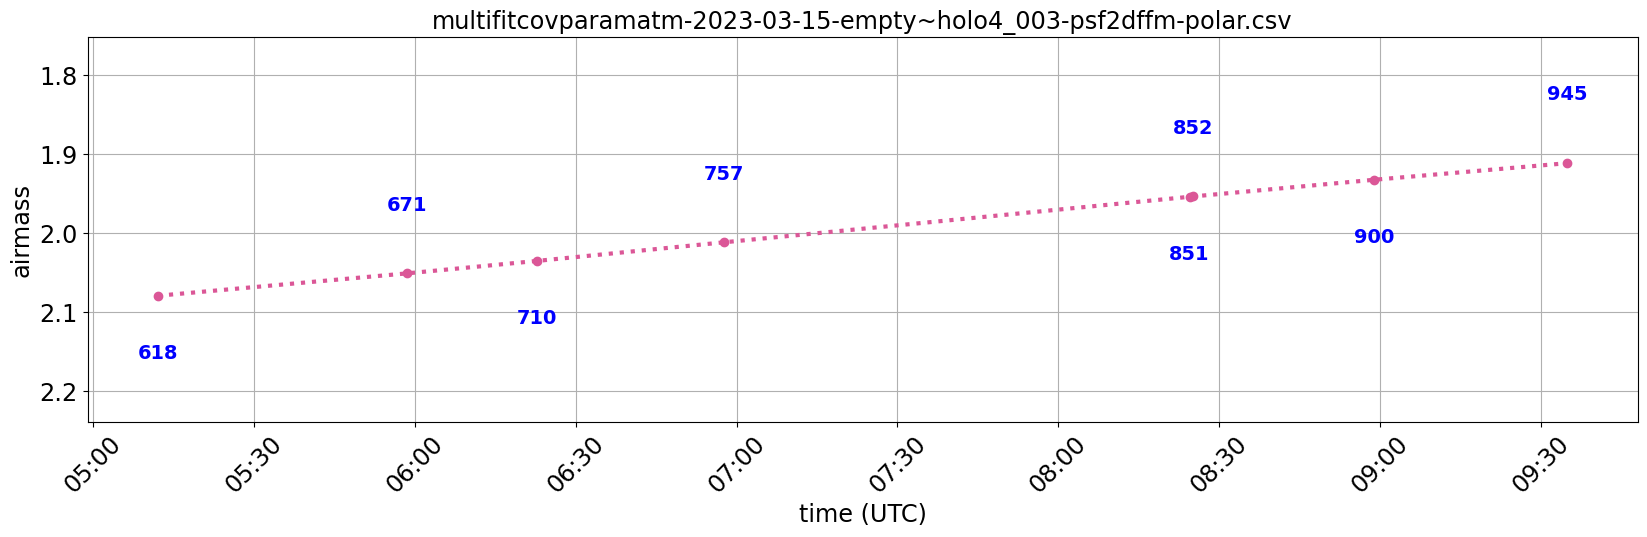

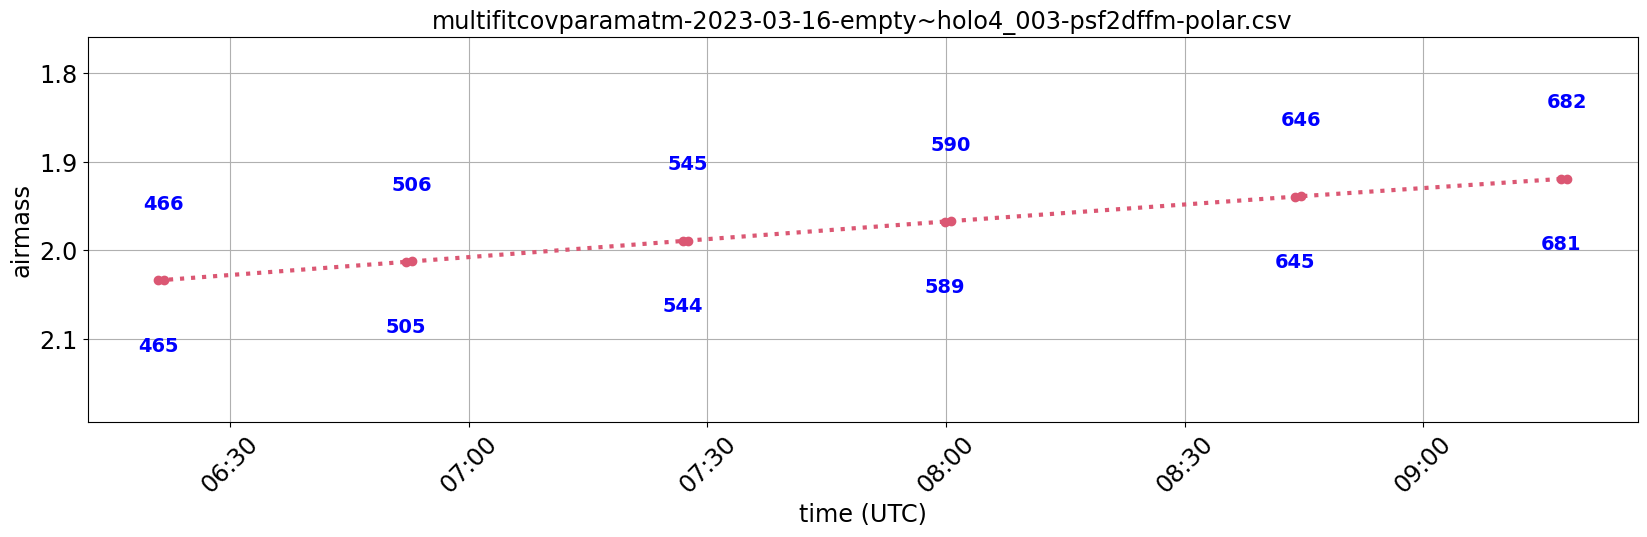

In [24]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    airmasses = infos['spec_airmass'].values
    
    N= len(numbers)
    
    if N>0:
  
        # Create rectangle x coordinates
        startTime = all_datetime[0]
        endTime =  all_datetime[-1]

        # convert to matplotlib date representation
        start = mdates.date2num(startTime)
        end = mdates.date2num(endTime)
        width = end - start


        fig=plt.figure(figsize=(20,5))
    
        ax=fig.add_subplot(111)
        myFmt = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_formatter(myFmt)

    

        y_shift= 0.08

  
        ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)
        ax.xaxis.set_major_formatter(myFmt)
        ax.xaxis.set_tick_params(rotation=45)
        ax.set_xlabel("time (UTC)")
        ax.set_ylabel("airmass")
        ax.set_ylim(airmasses.min()-2*y_shift,airmasses.max()+2*y_shift)
        # Plot rectangle
        #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
        #ax2.add_patch(rect)   
        ax.invert_yaxis()
        ax.grid()


        for index in range(N):
            textstr= str(numbers[index])
            if index%2 == 0:
                dy = y_shift
            else:
                dy = -y_shift
            
            ax.text(all_datetime[index], airmasses[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
        ax.set_title(filenames[idx])
    
    plt.show()
    
    

## Precipitable water vapor

### Plot all PWV in different figures

In [25]:
hls_colors = sns.color_palette("hls", NF)

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_45624/980135550.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")


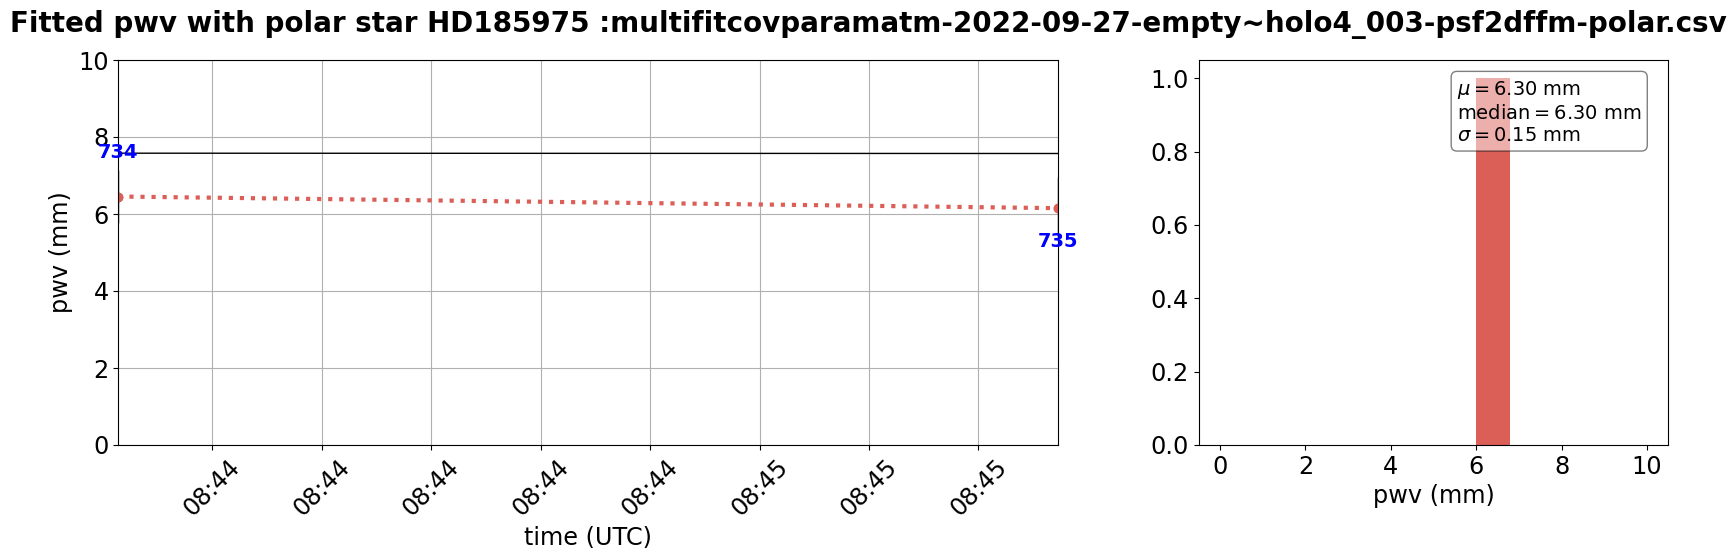

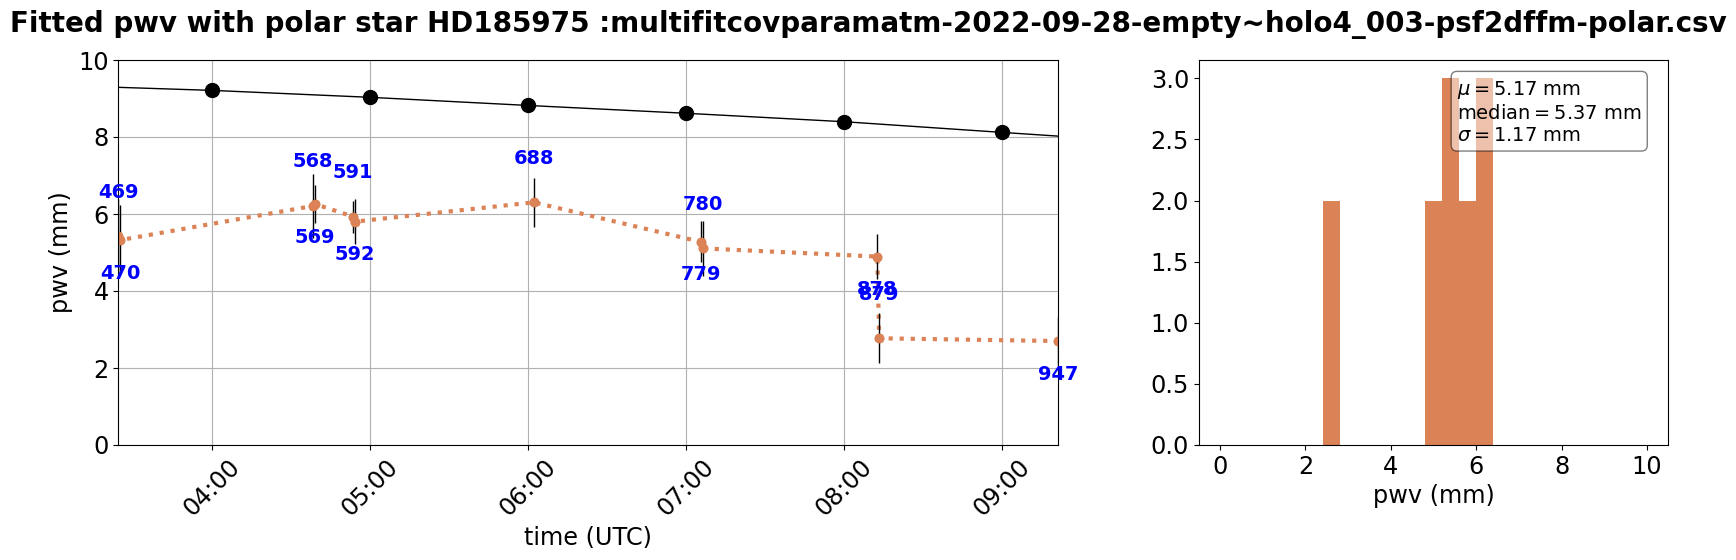

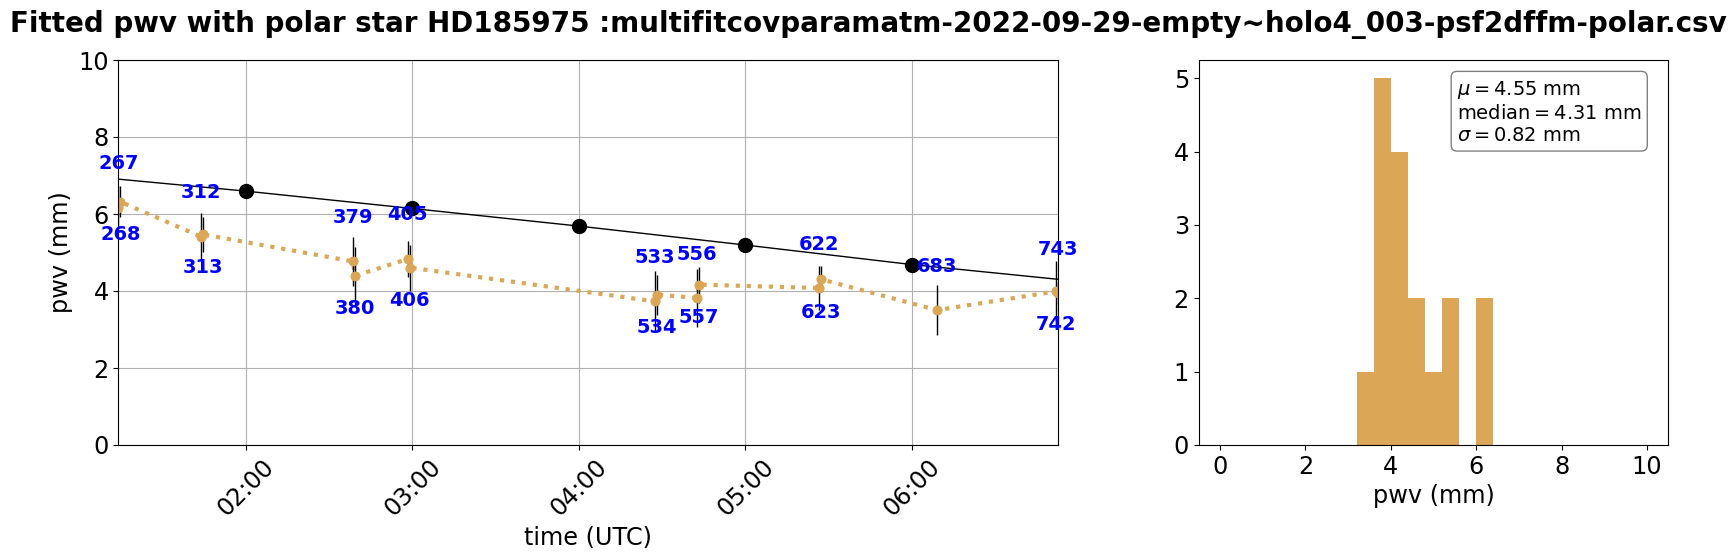

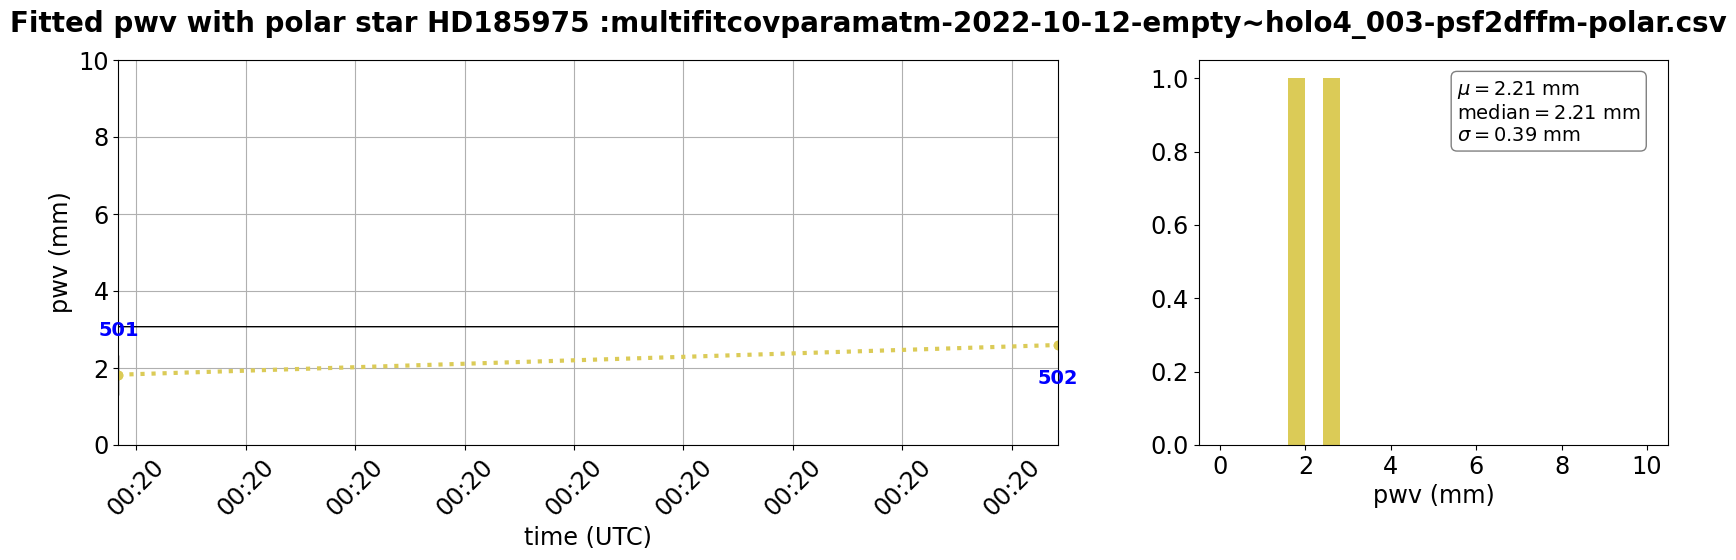

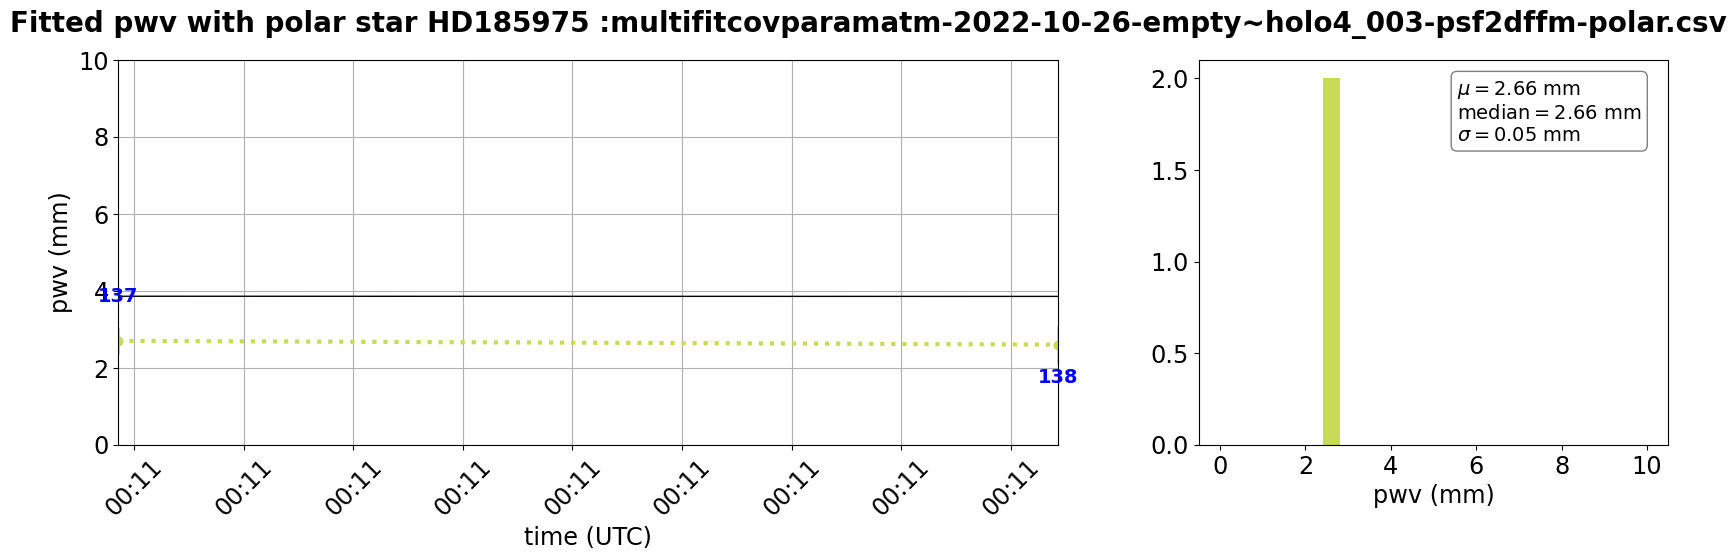

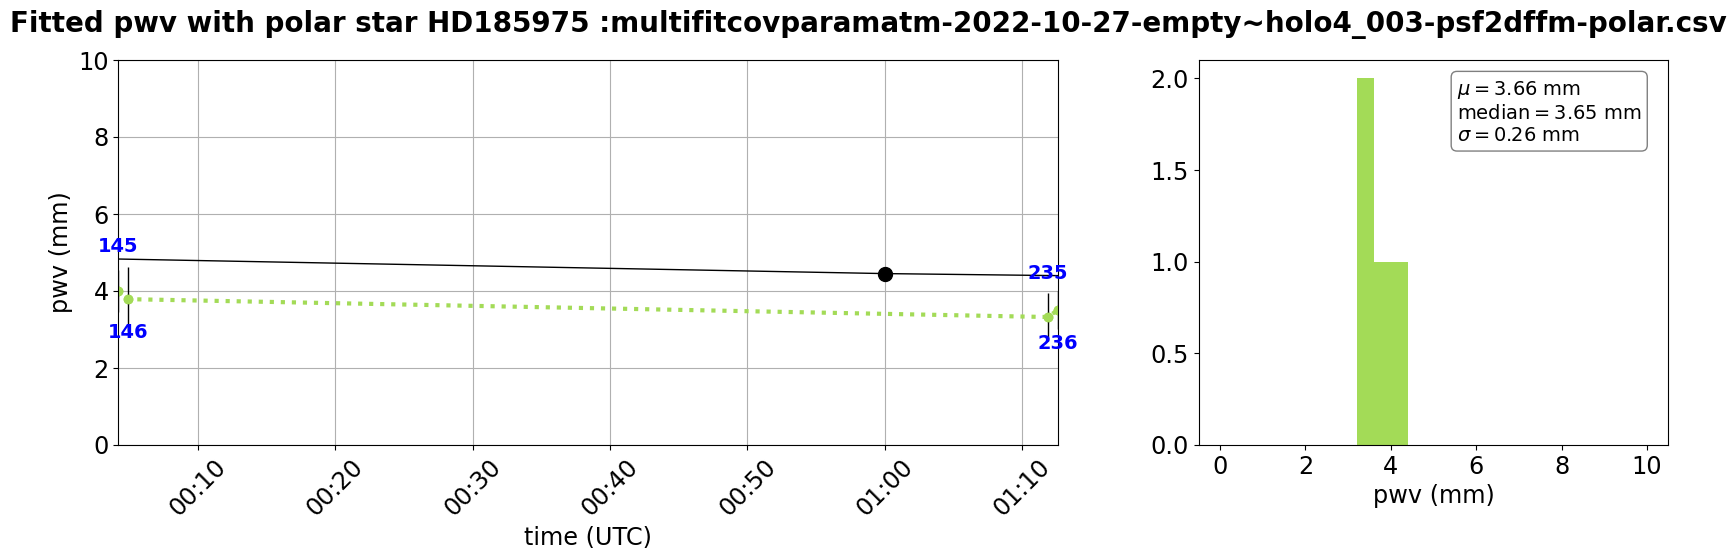

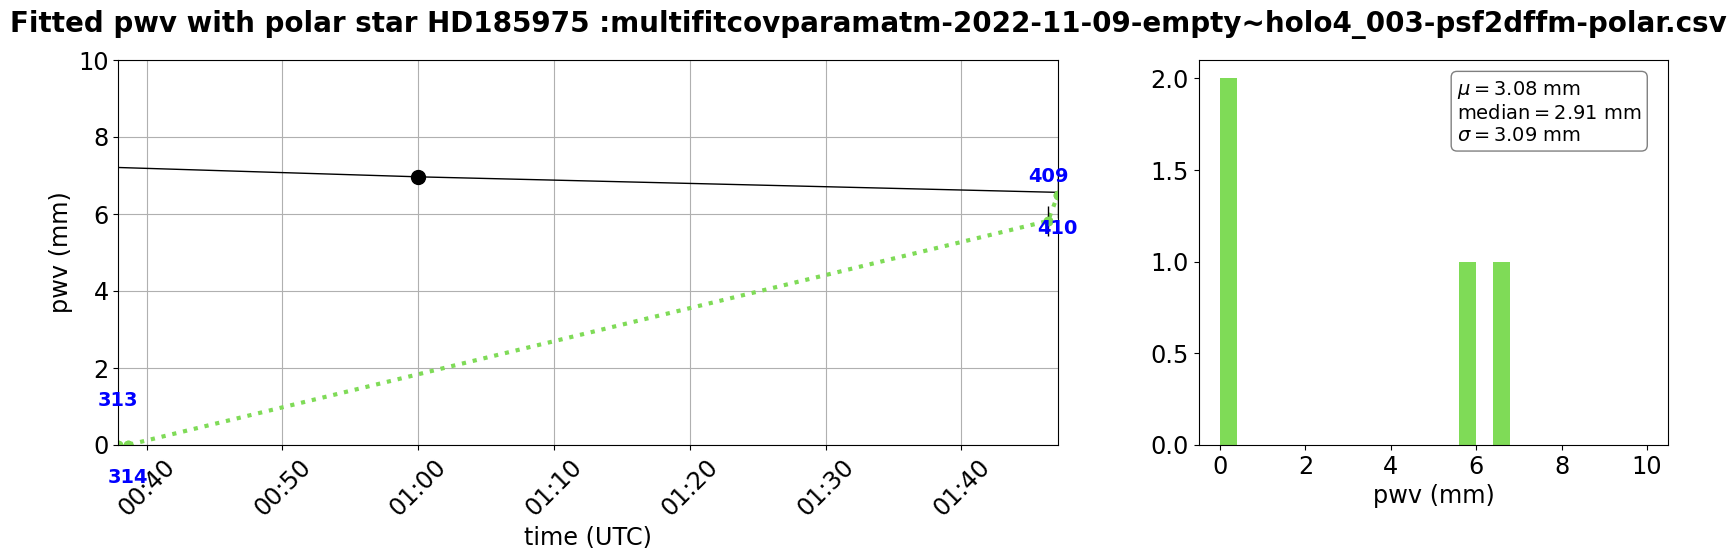

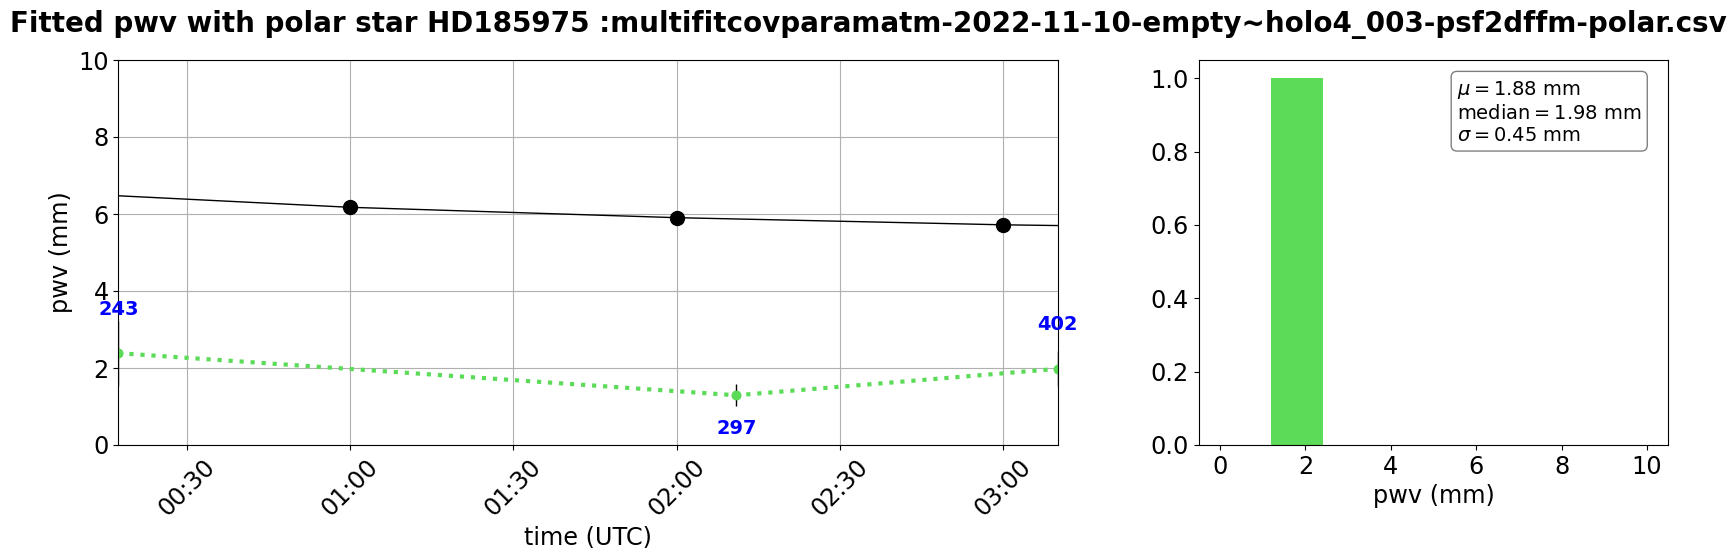

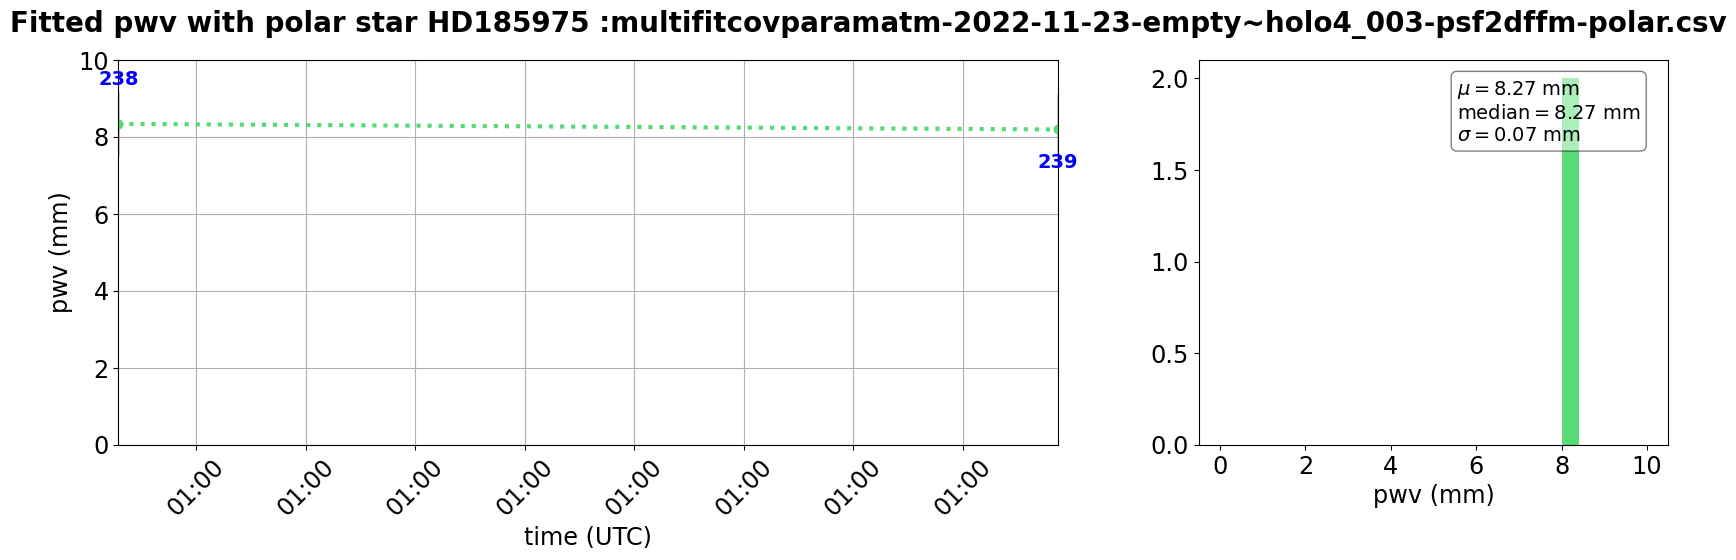

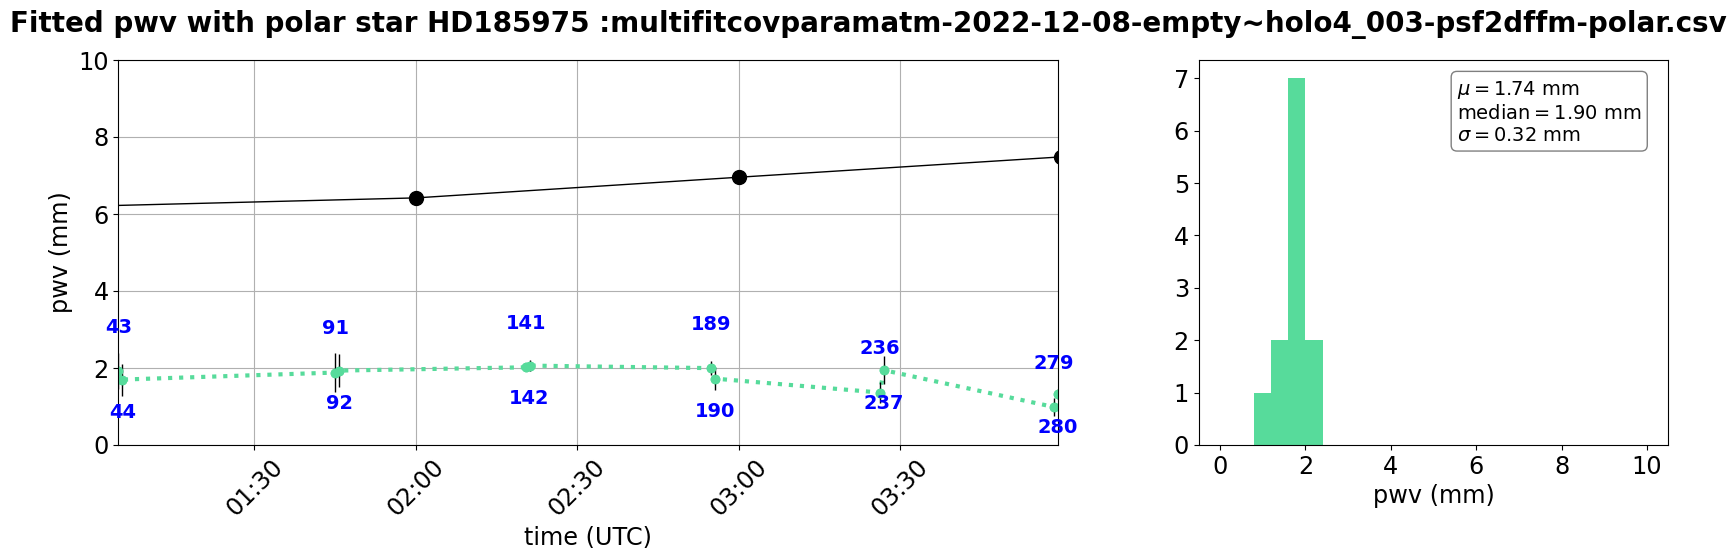

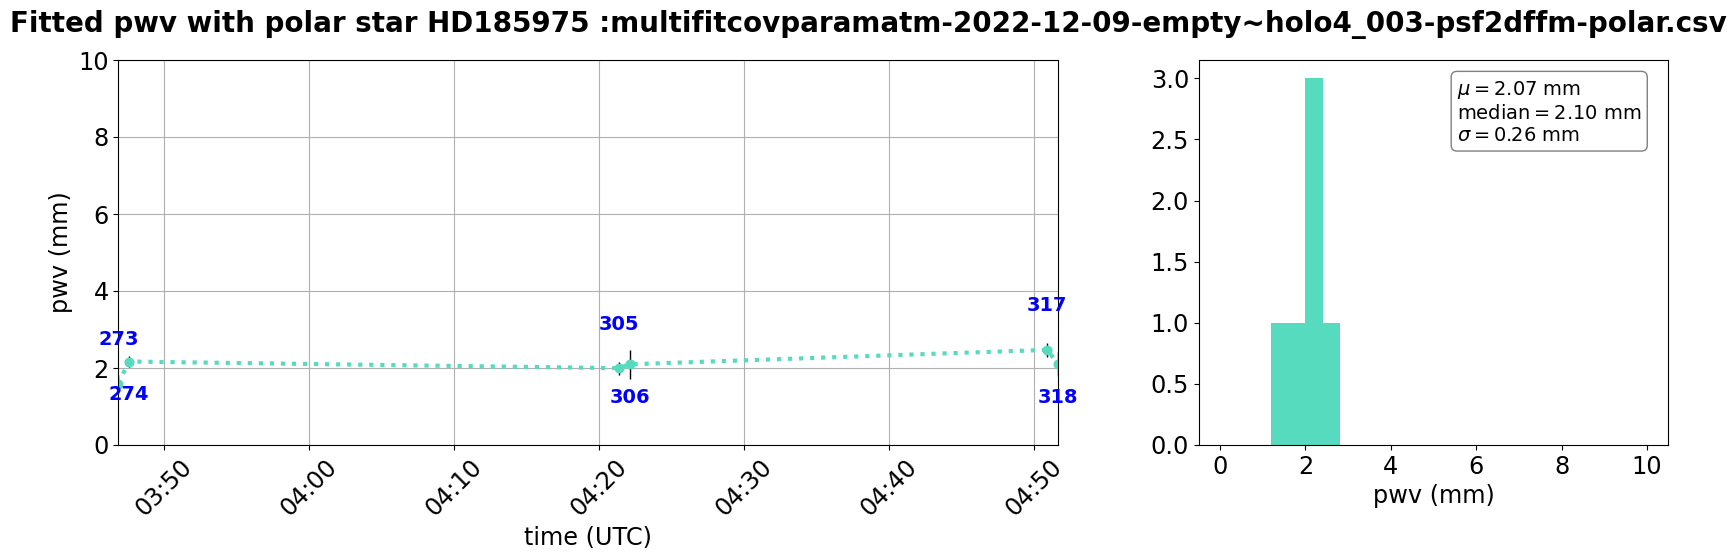

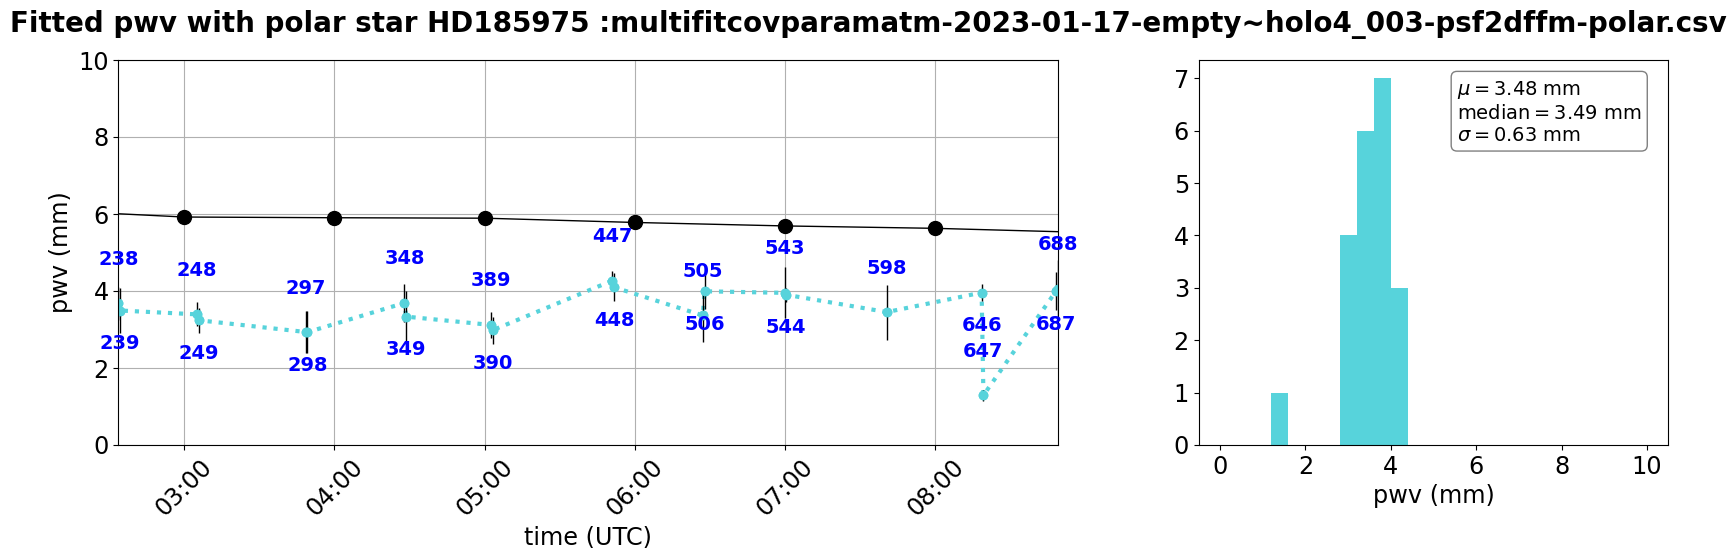

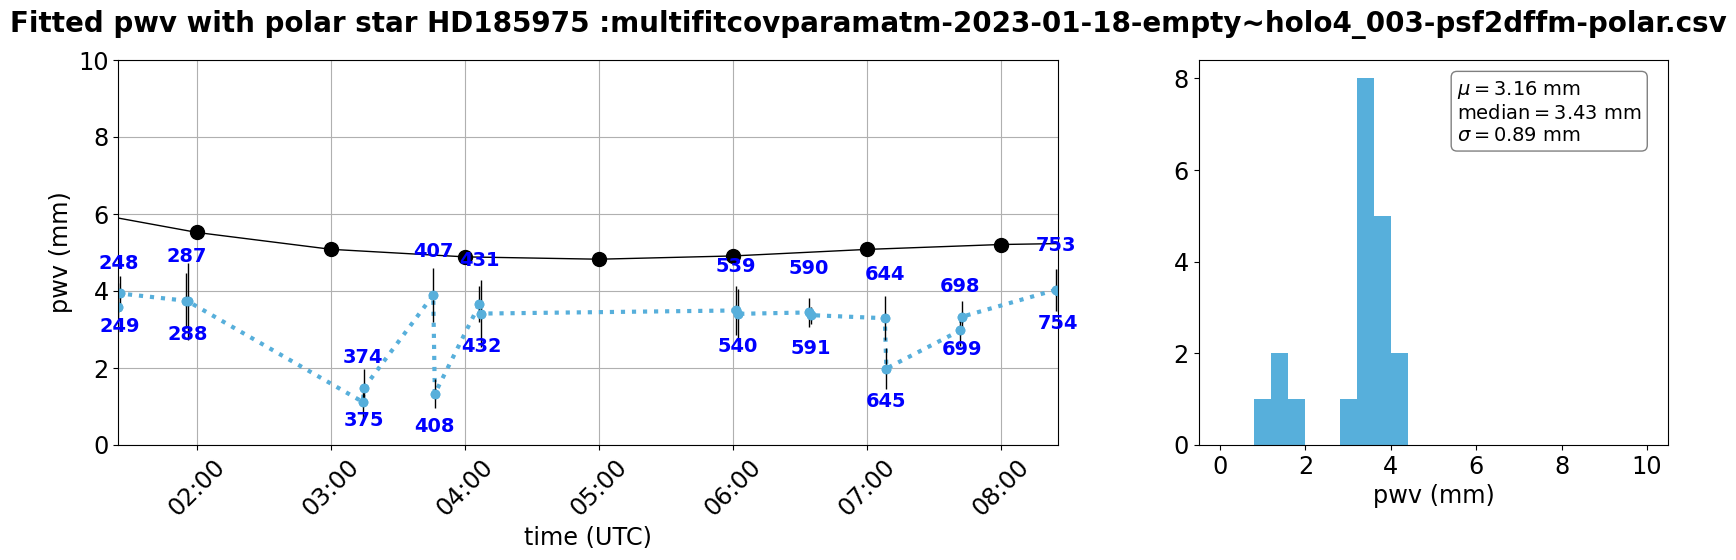

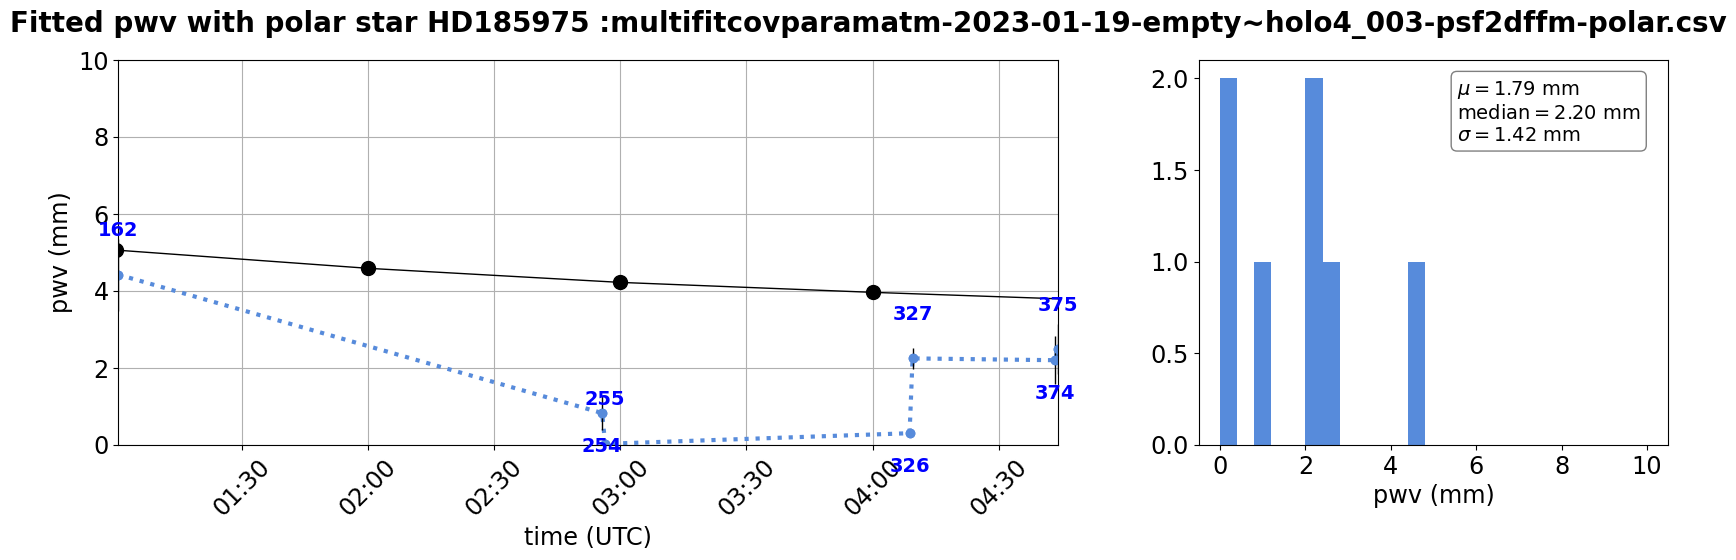

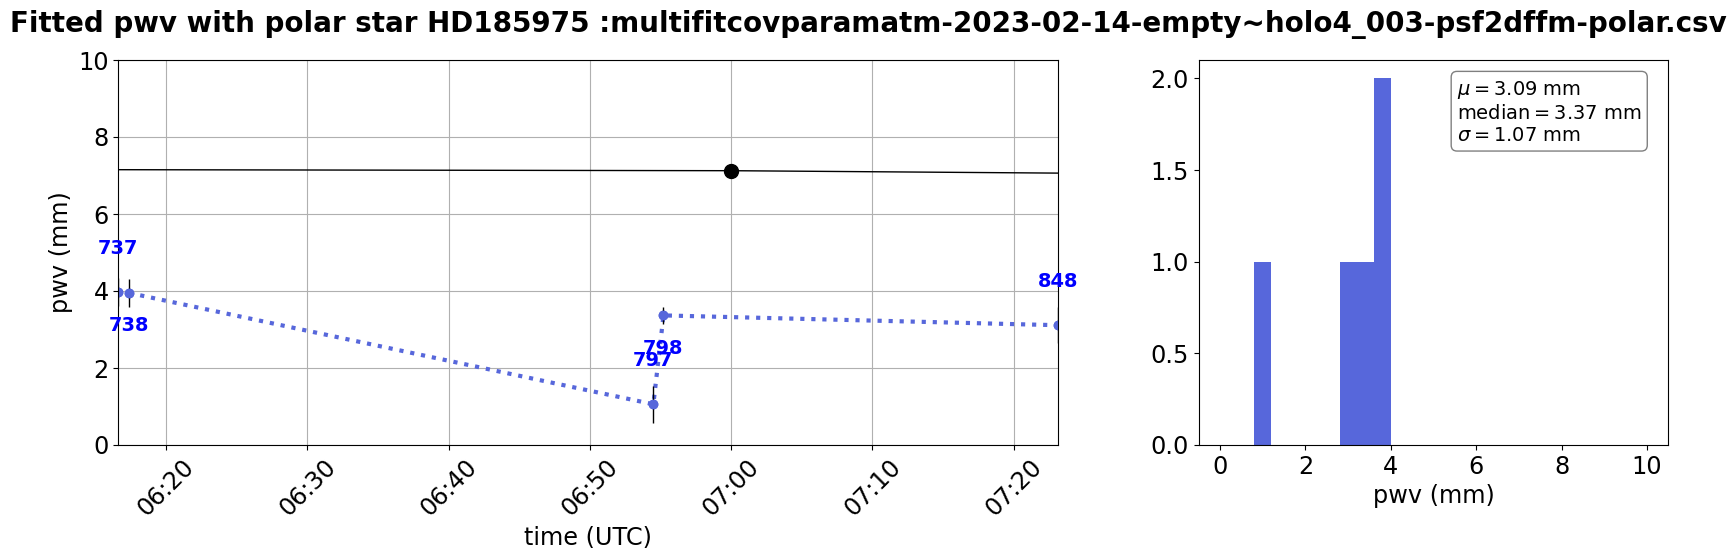

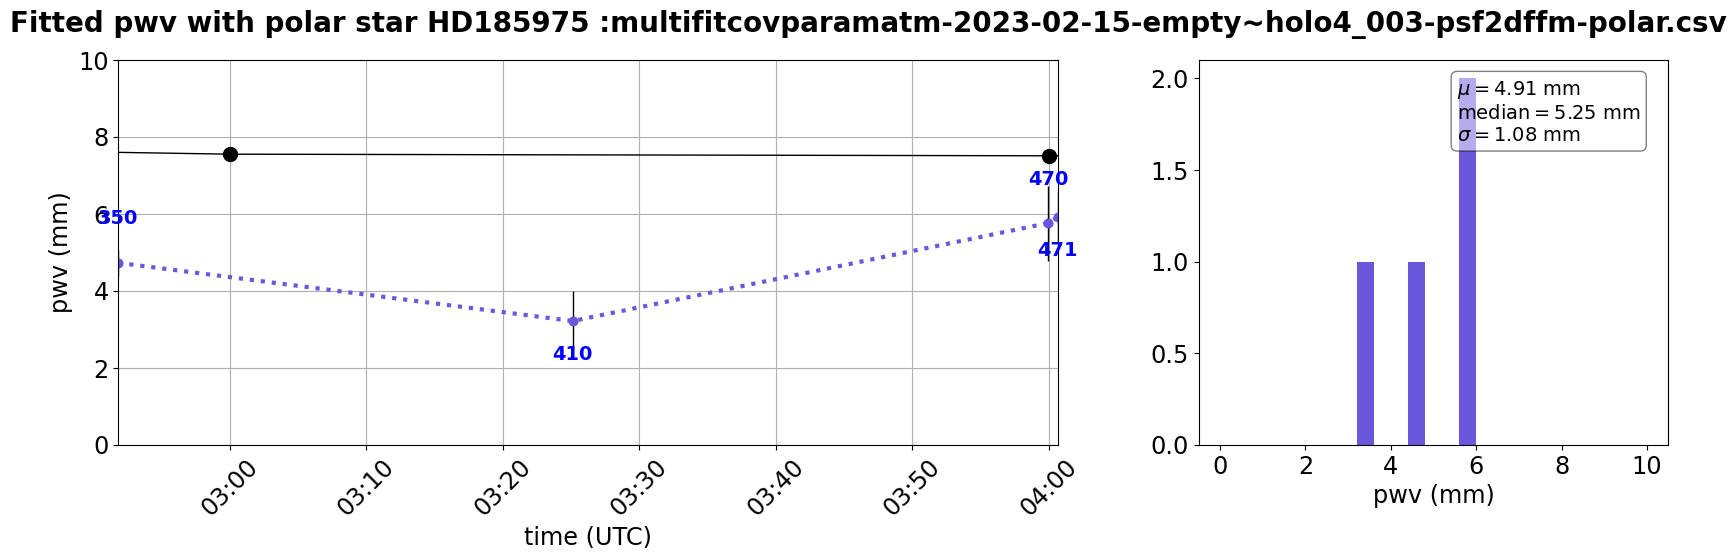

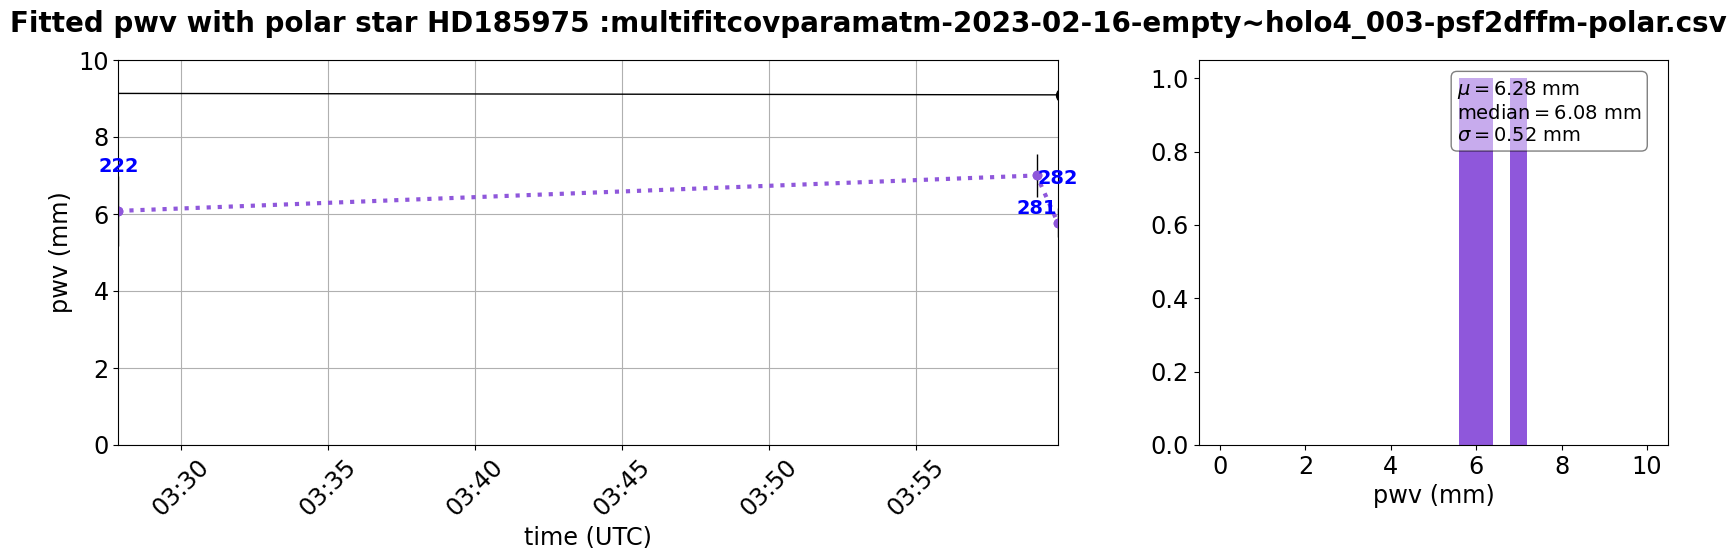

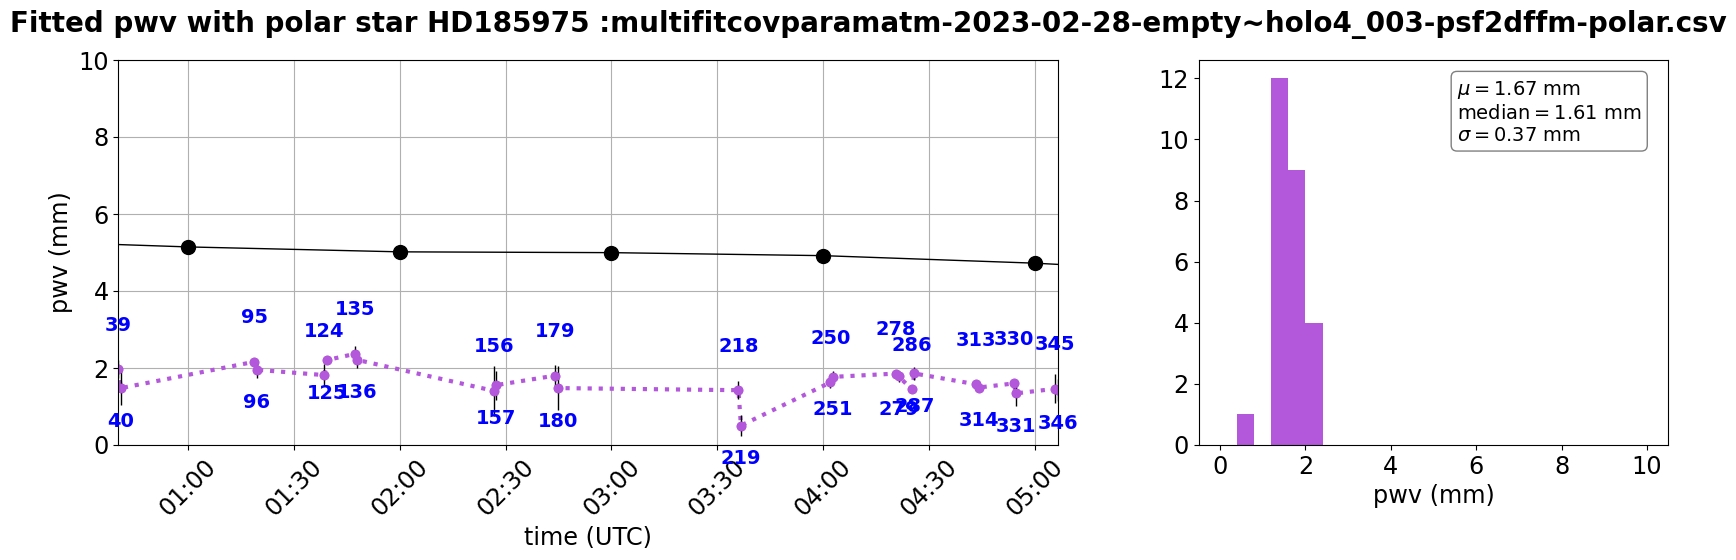

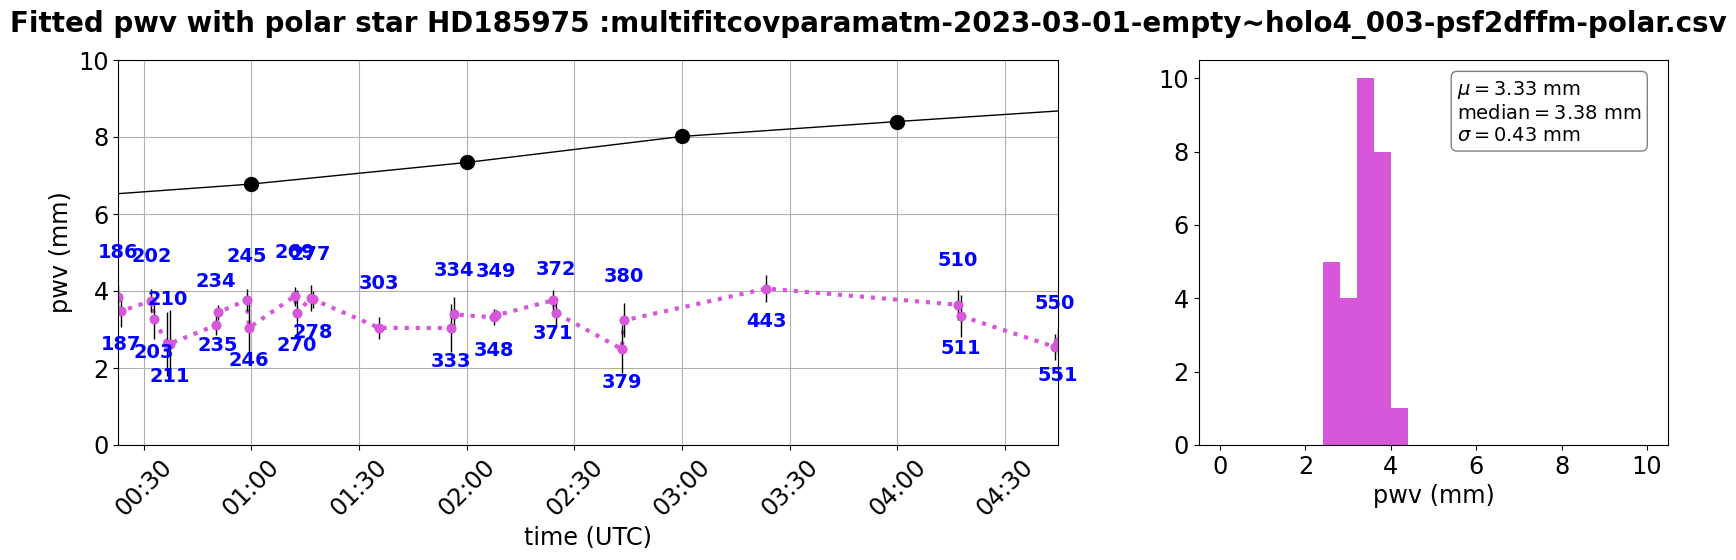

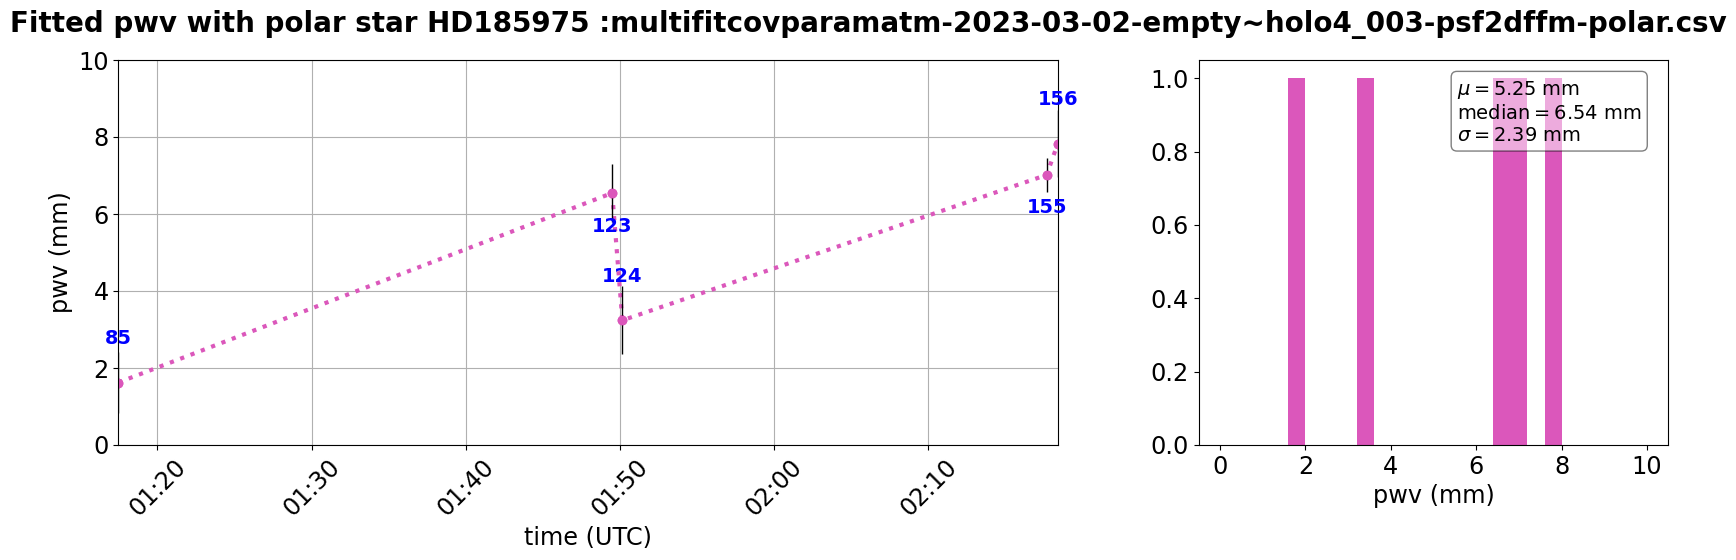

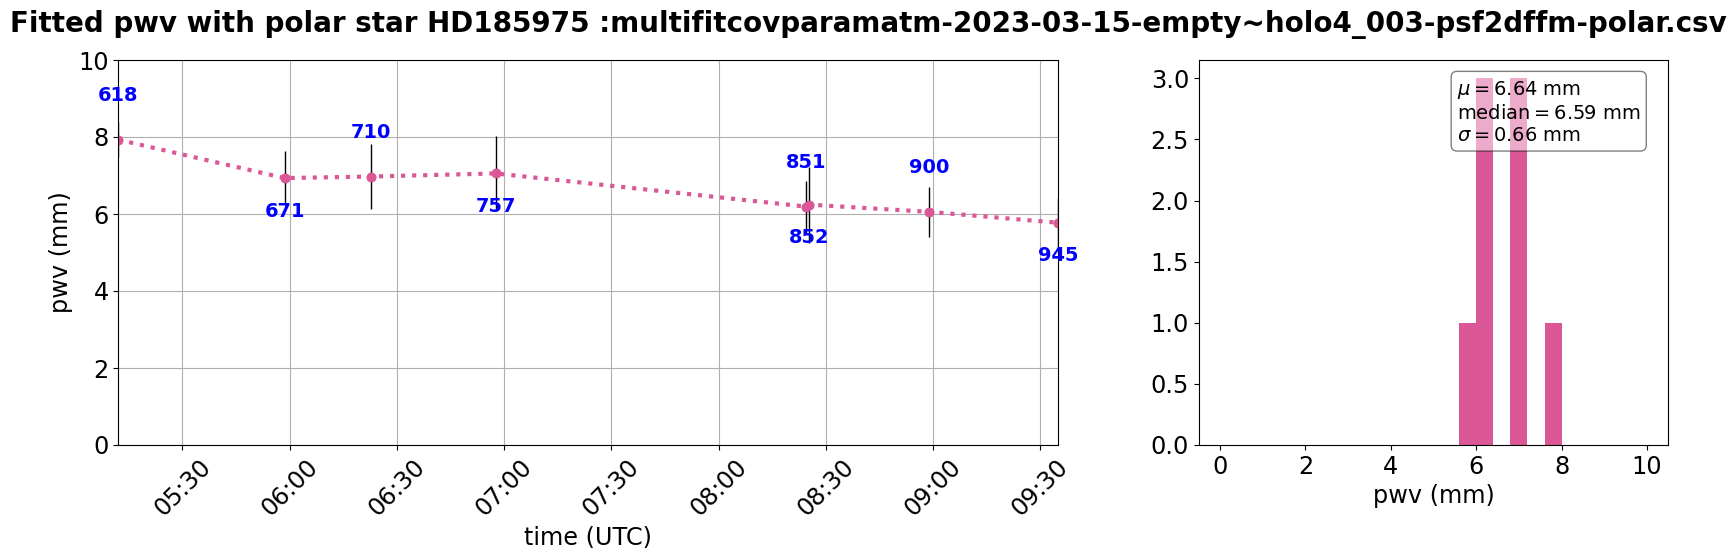

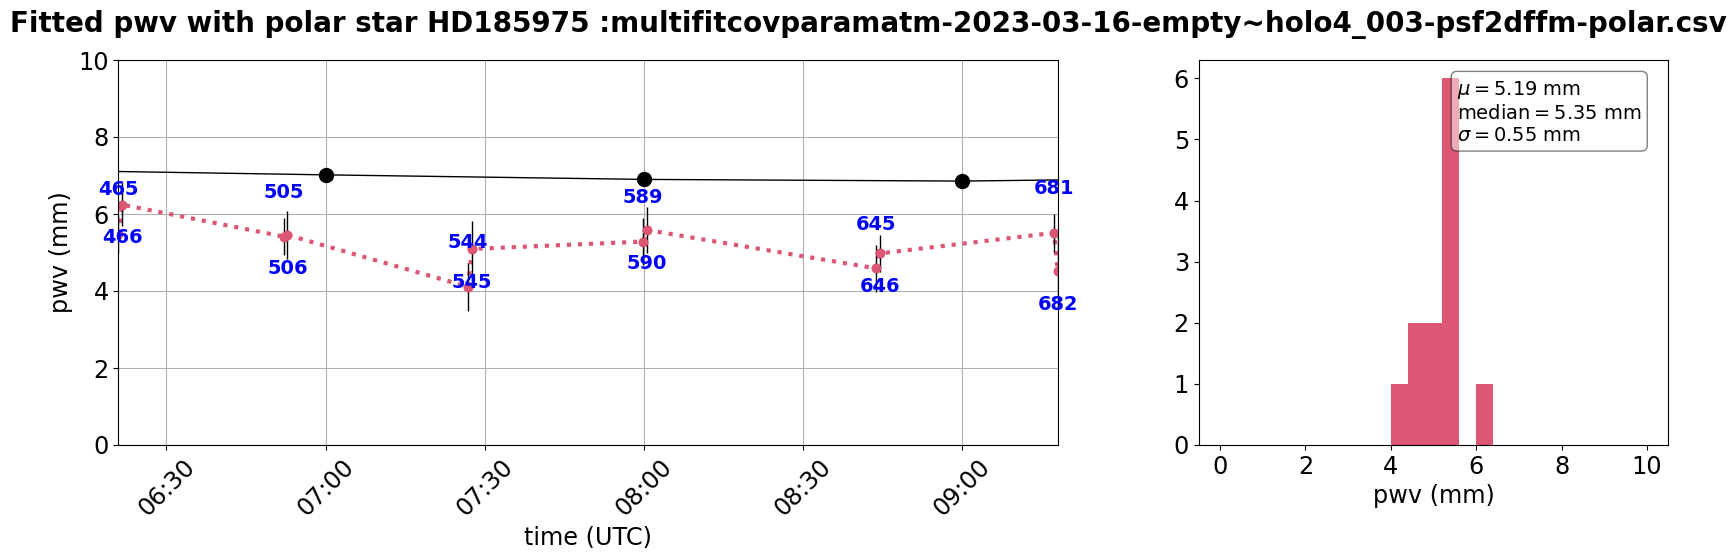

In [26]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    pwv= infos['pwv_avg'].values
    epwv= infos['pwv_sig'].values
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1,label="merra2")
    
    ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="RERRA2(2022)")
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    ax.set_xlim(start,end)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()
    ax.set_ylim(0.,10.)


    for index in range(N):
        textstr= str(numbers[index])
        
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], pwv[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    
    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(pwv,bins=25,range=(0,10),facecolor=hls_colors[idx])
    ax.set_xlabel("pwv (mm)")
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted pwv with polar star HD185975 :" + filenames[idx]
    else:
        the_title = "Fitted pwv with all stars :" + filenames[idx]
    plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_45624/2185353410.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])


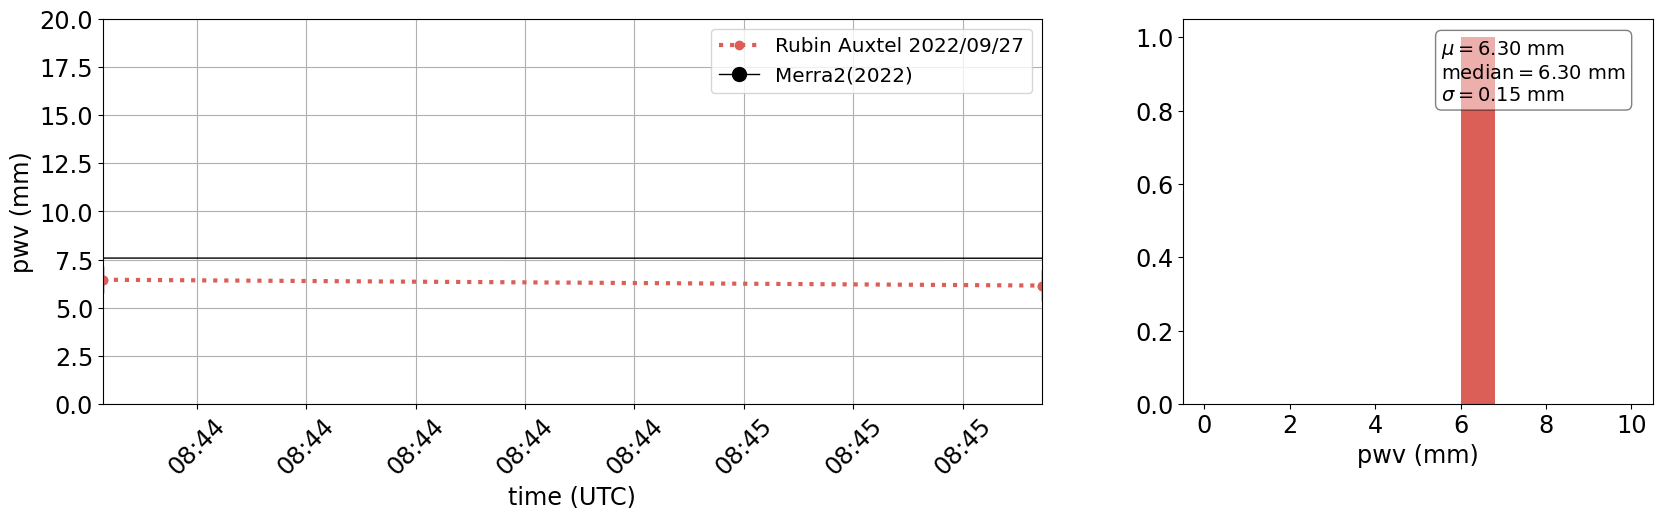

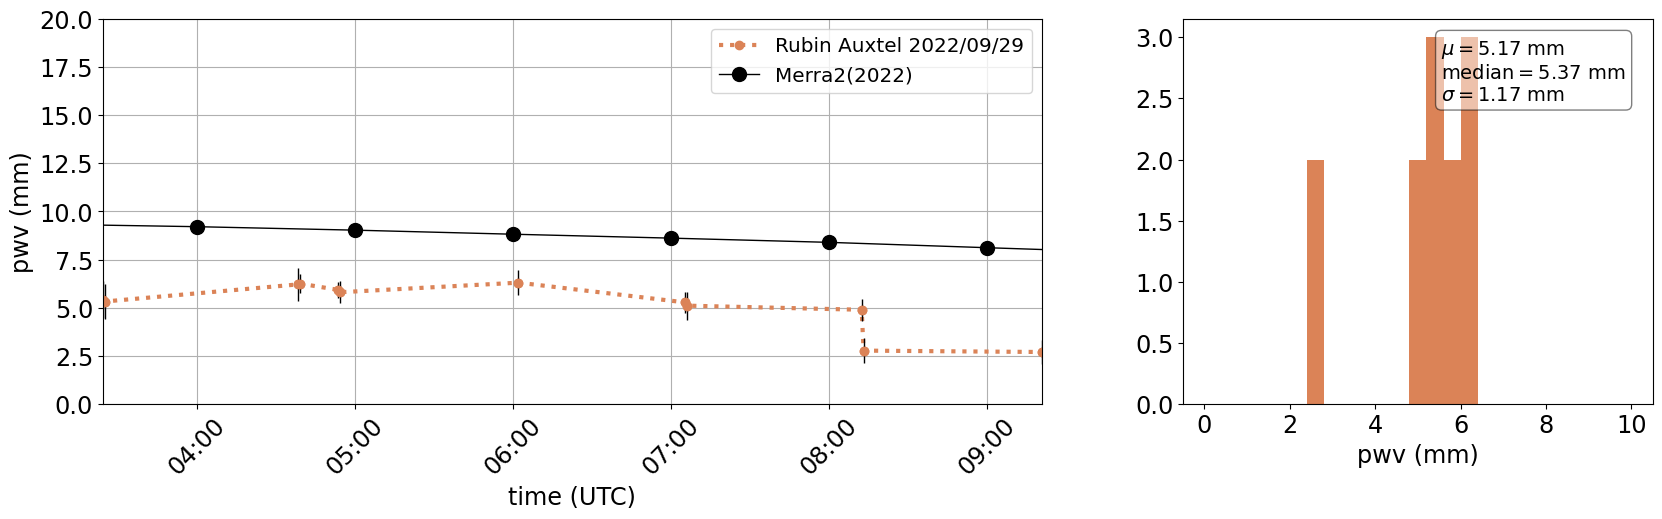

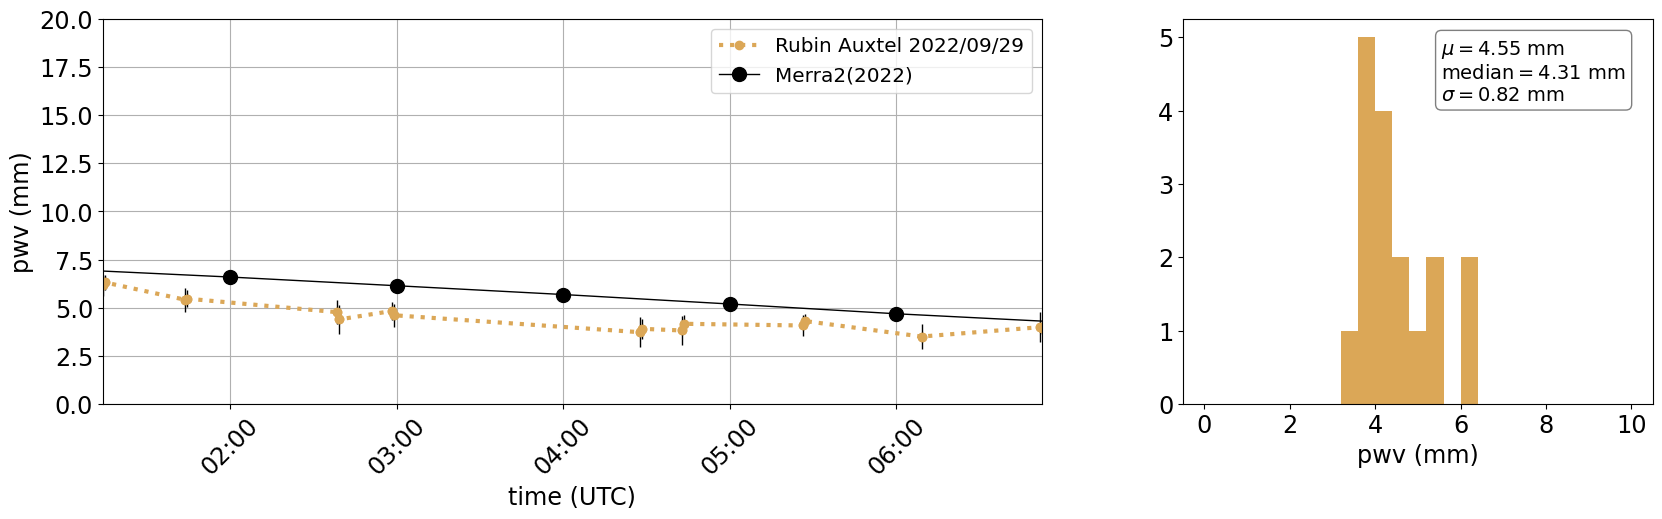

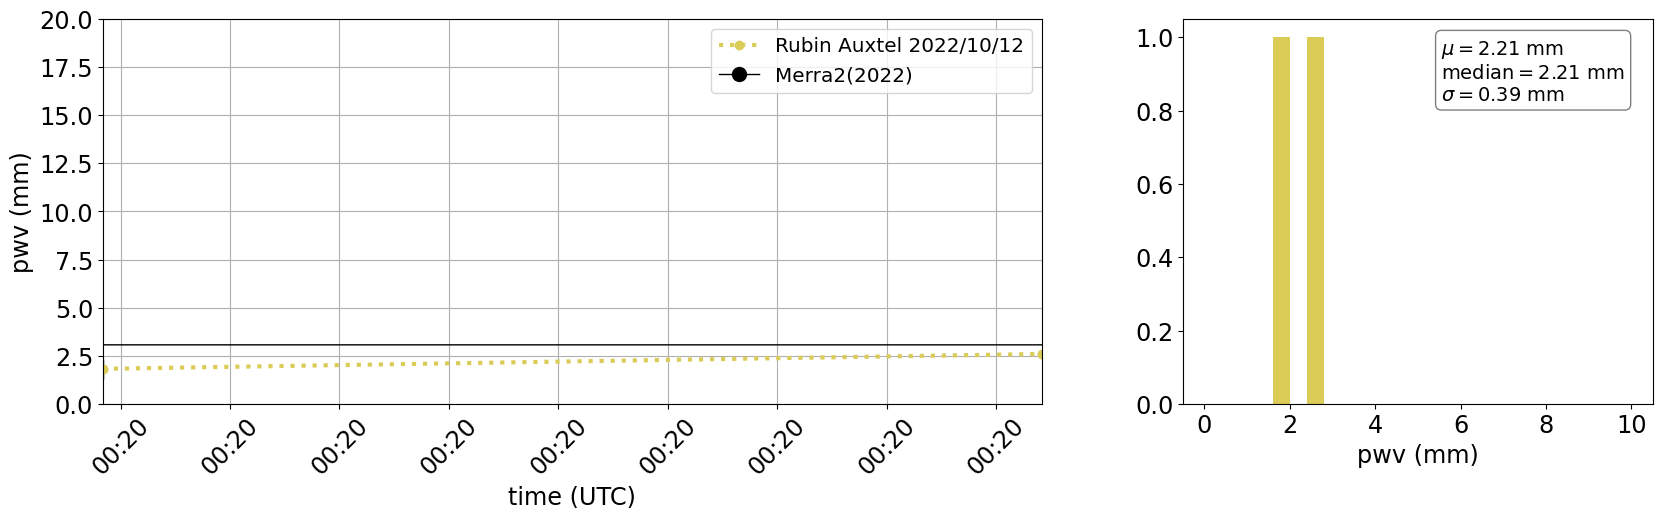

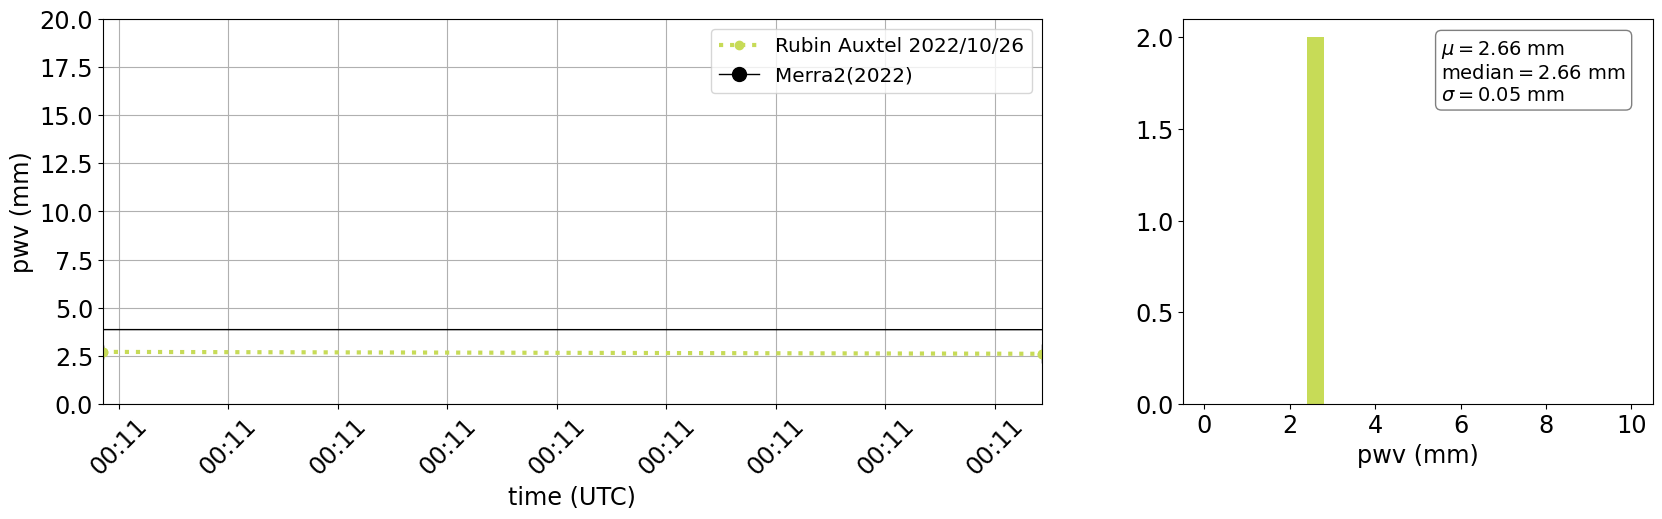

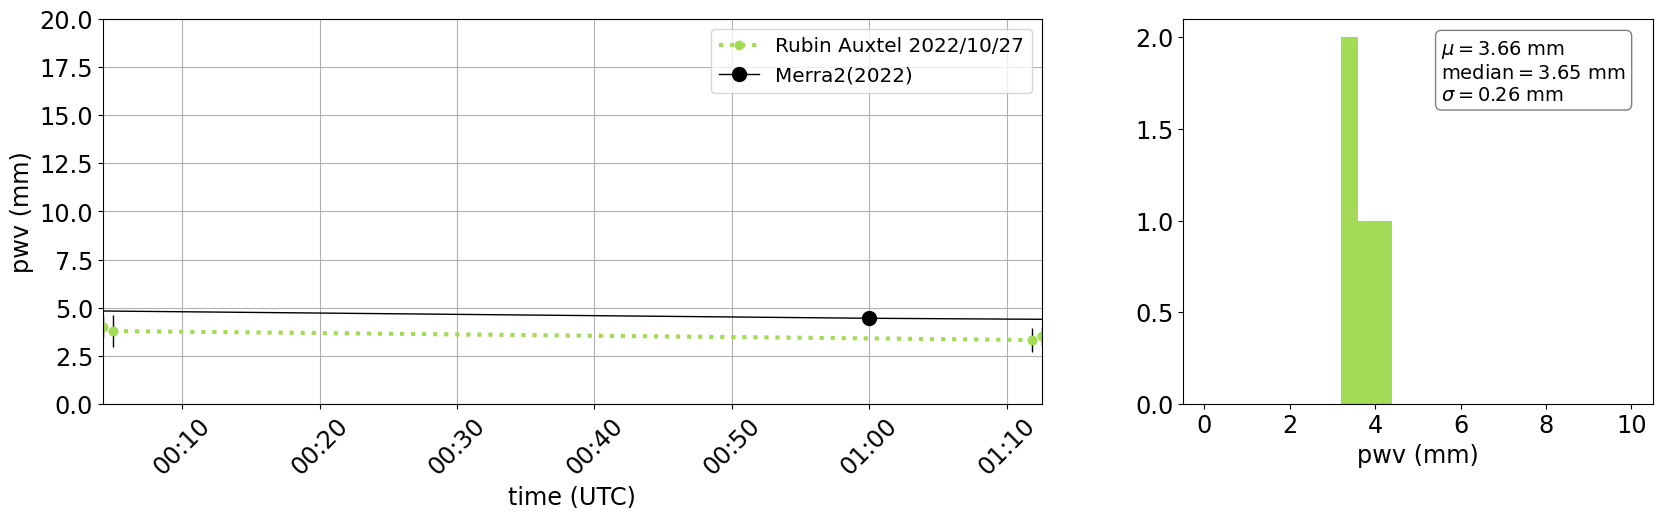

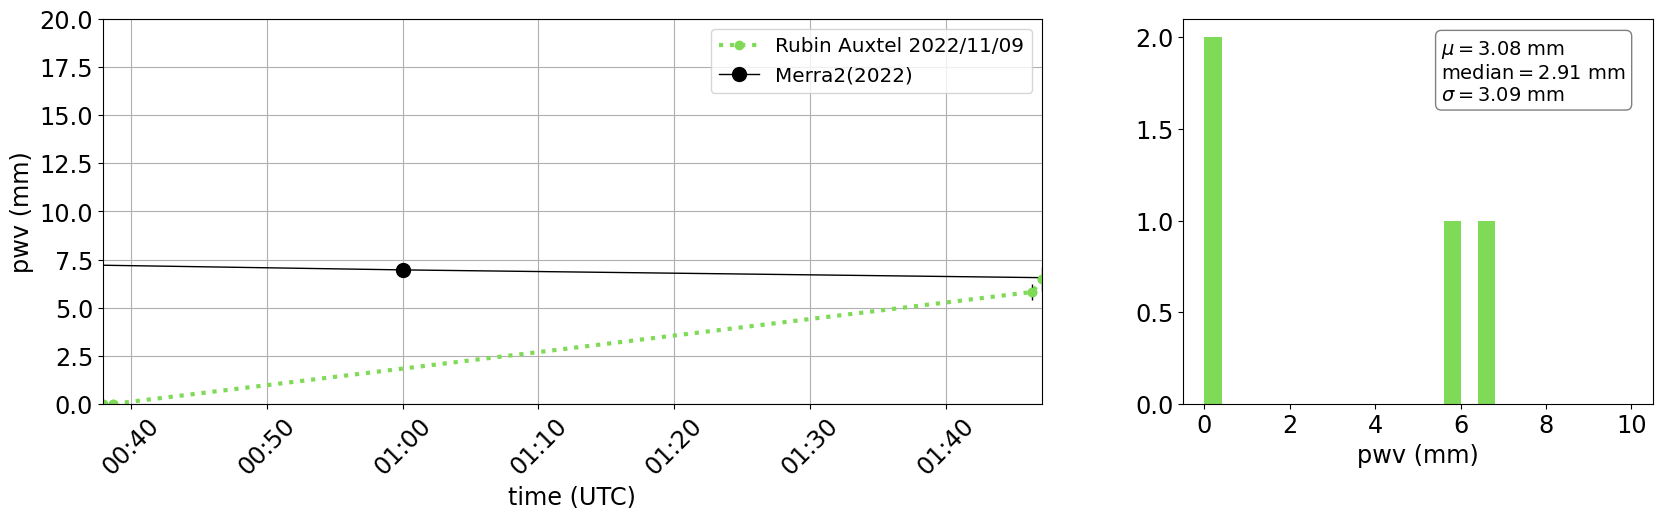

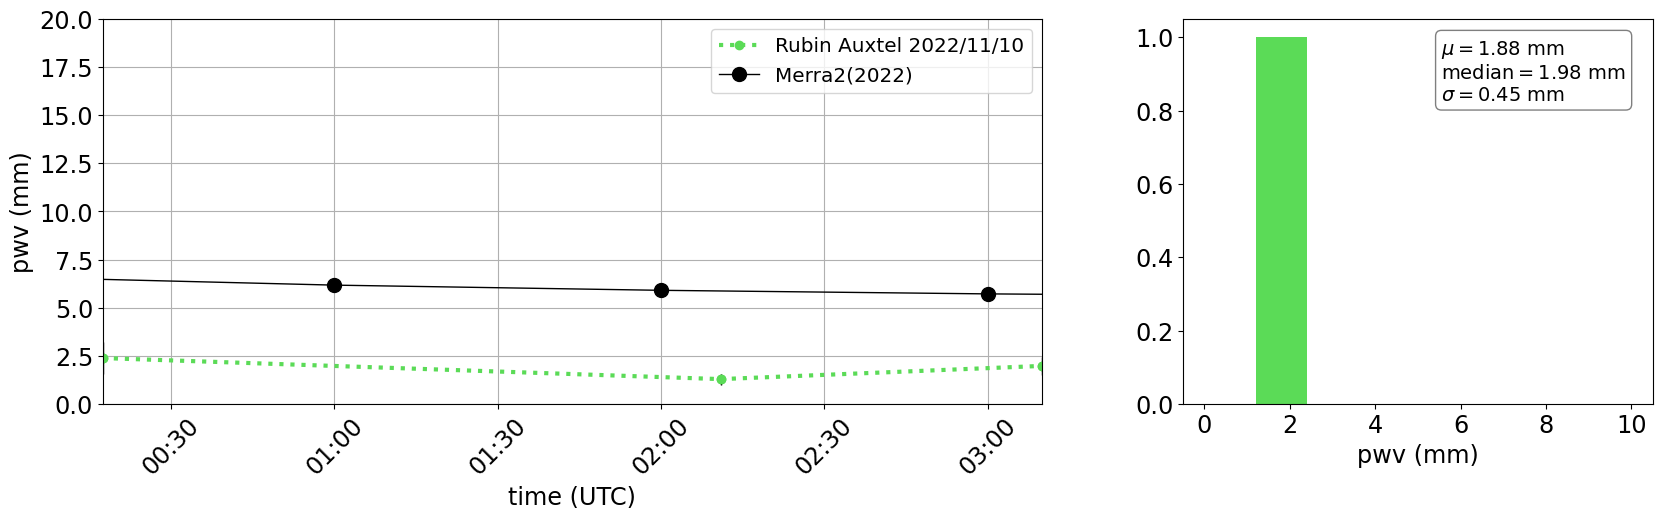

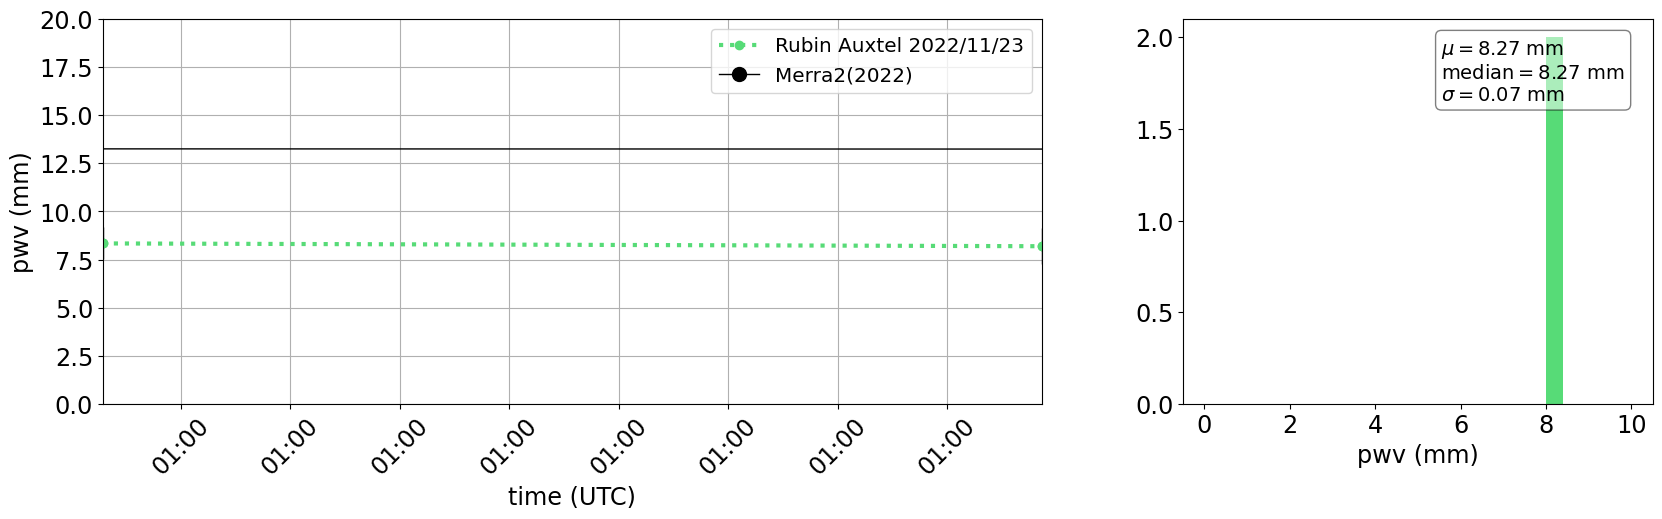

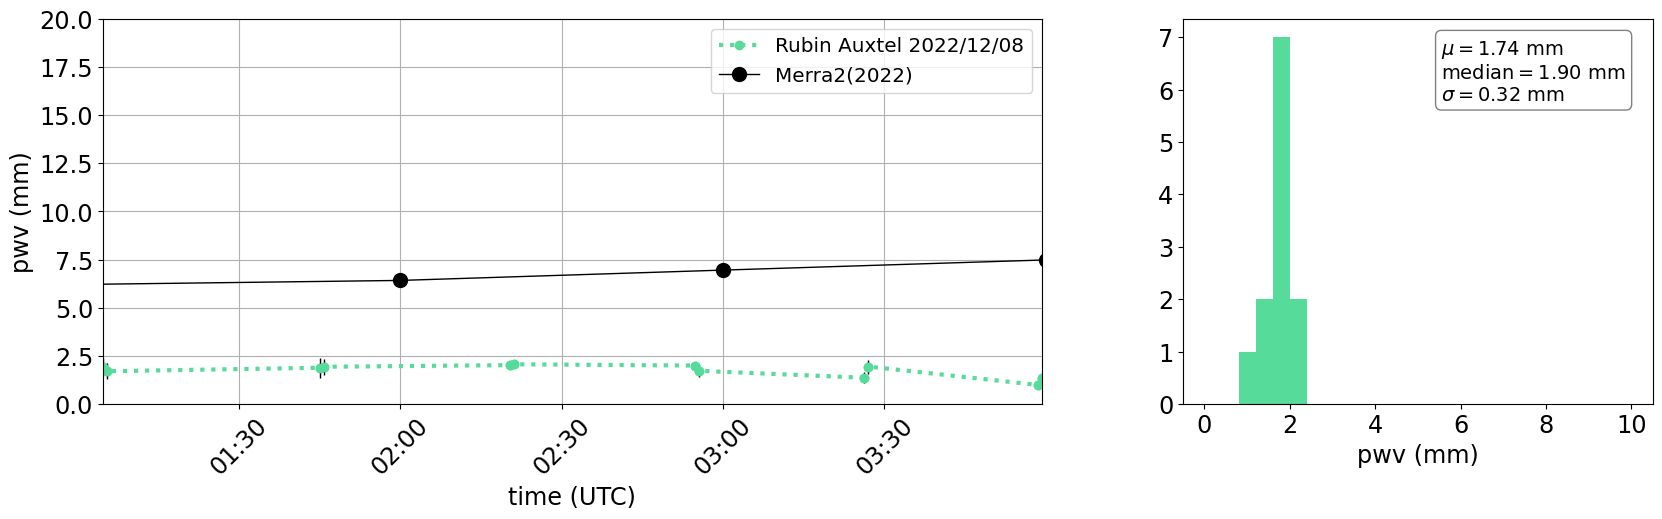

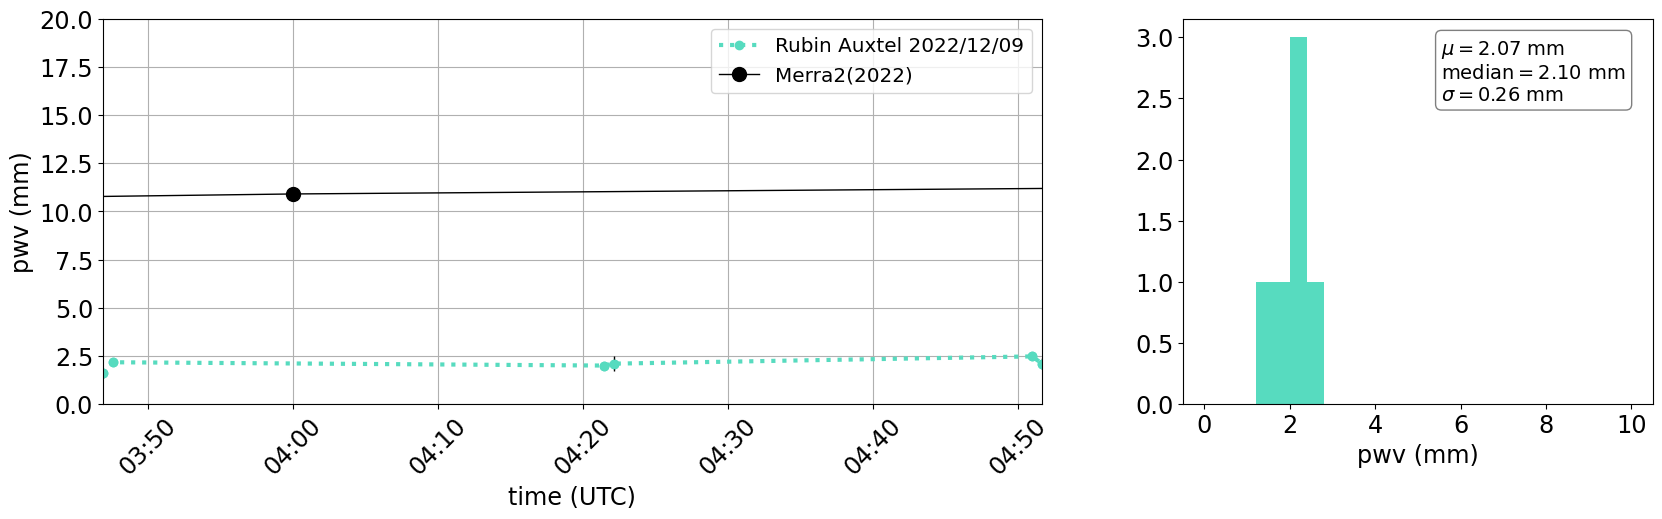

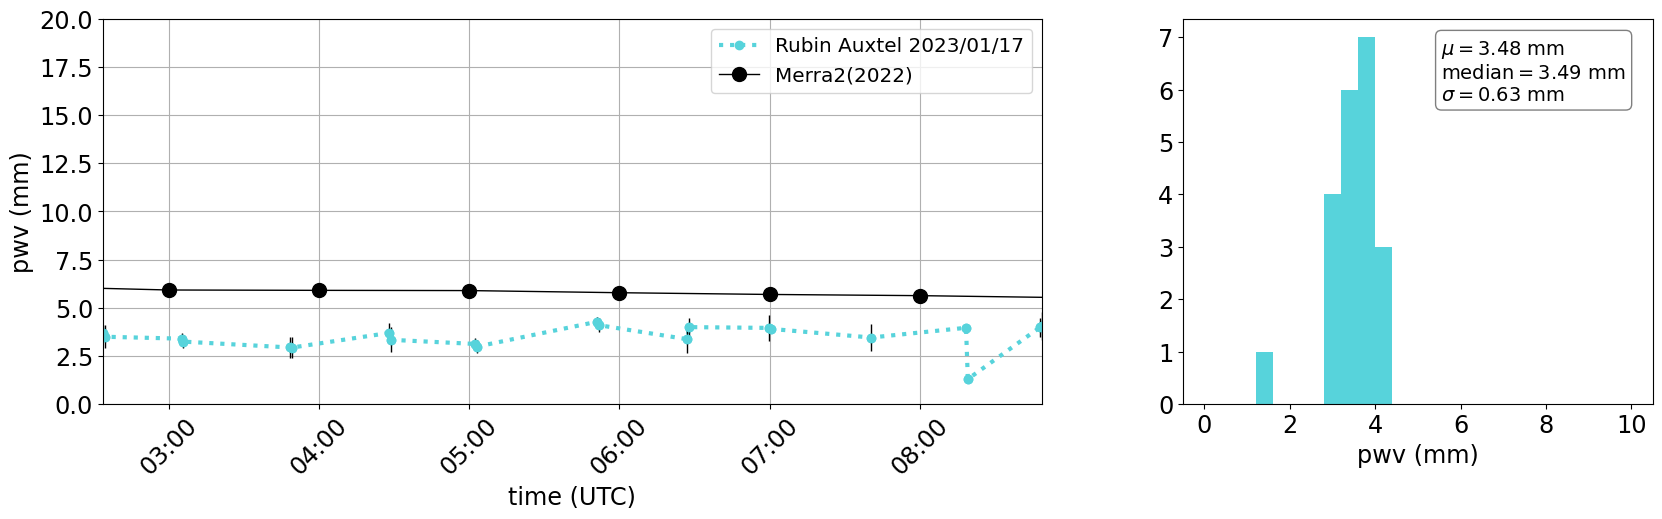

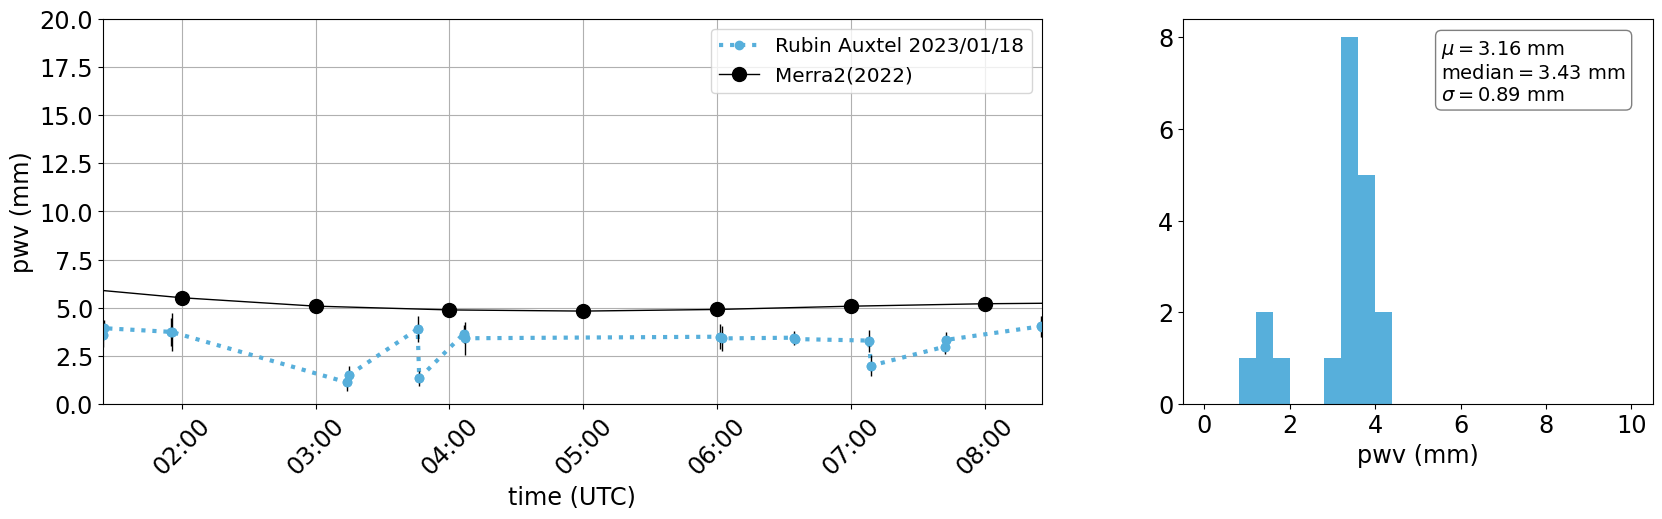

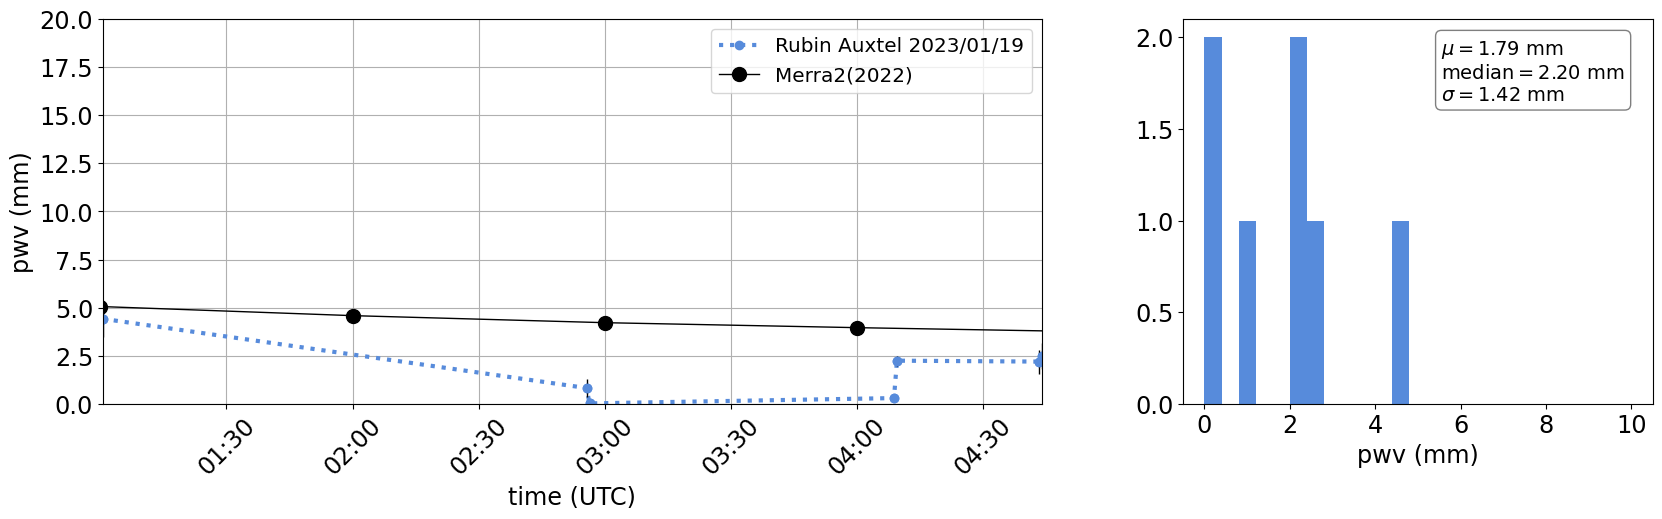

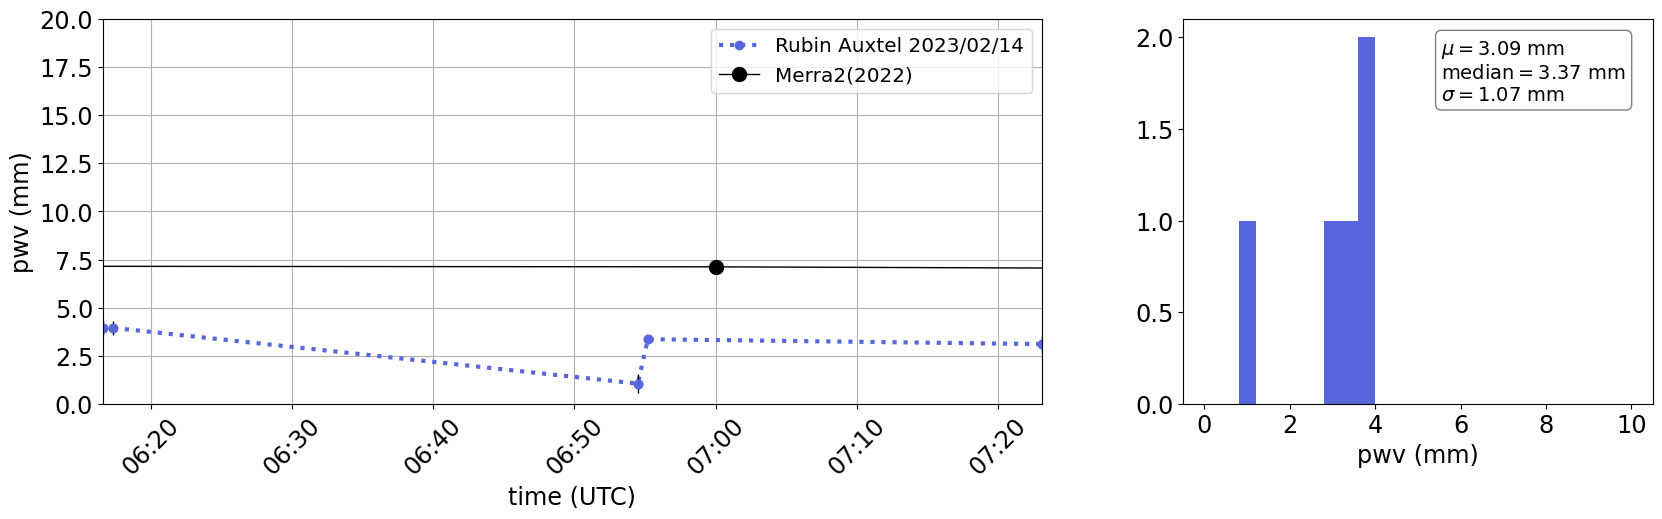

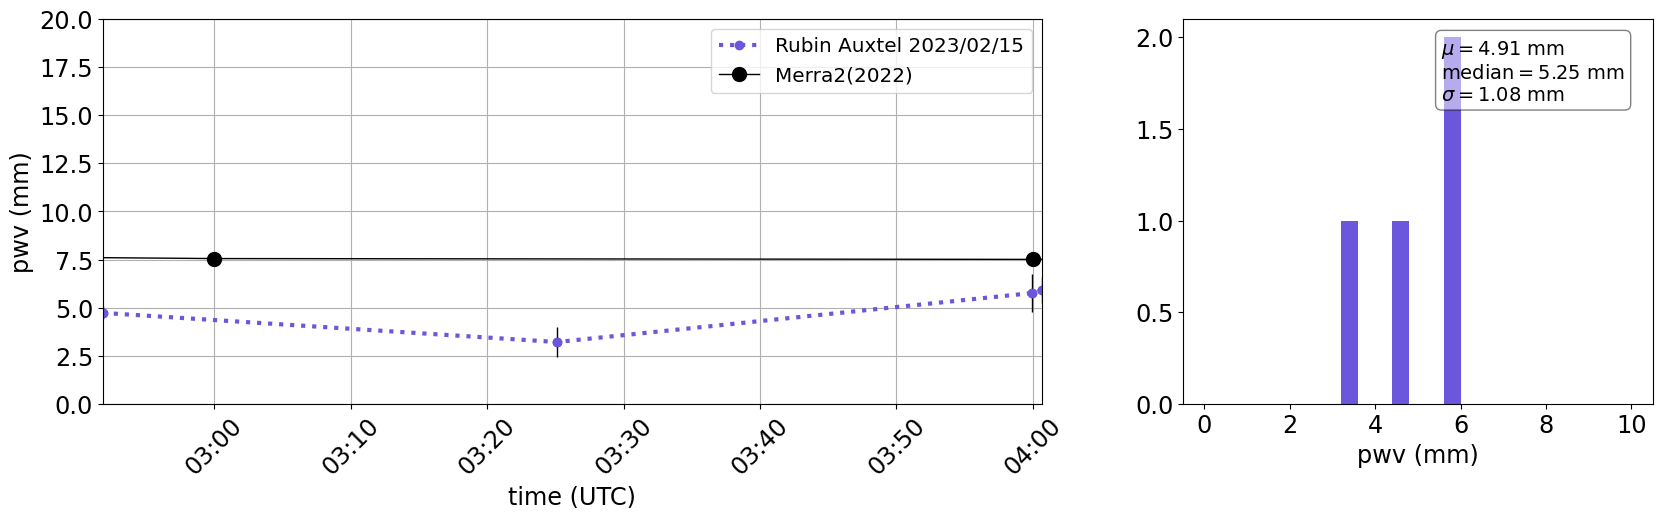

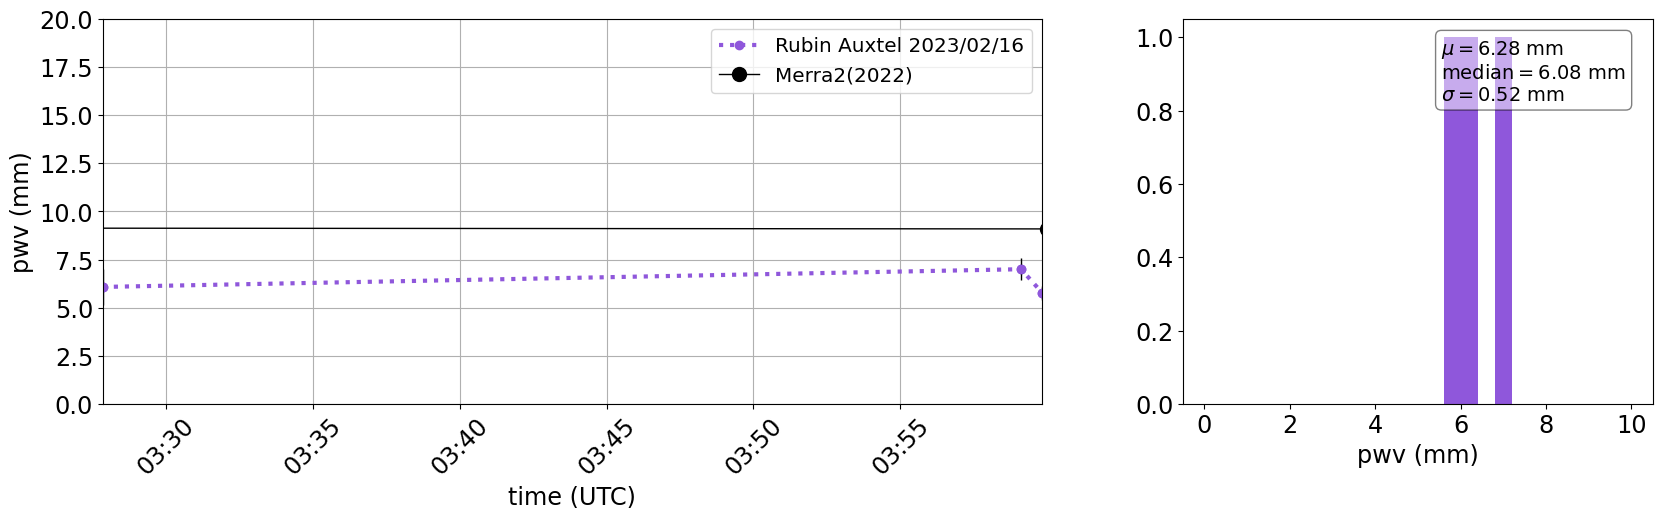

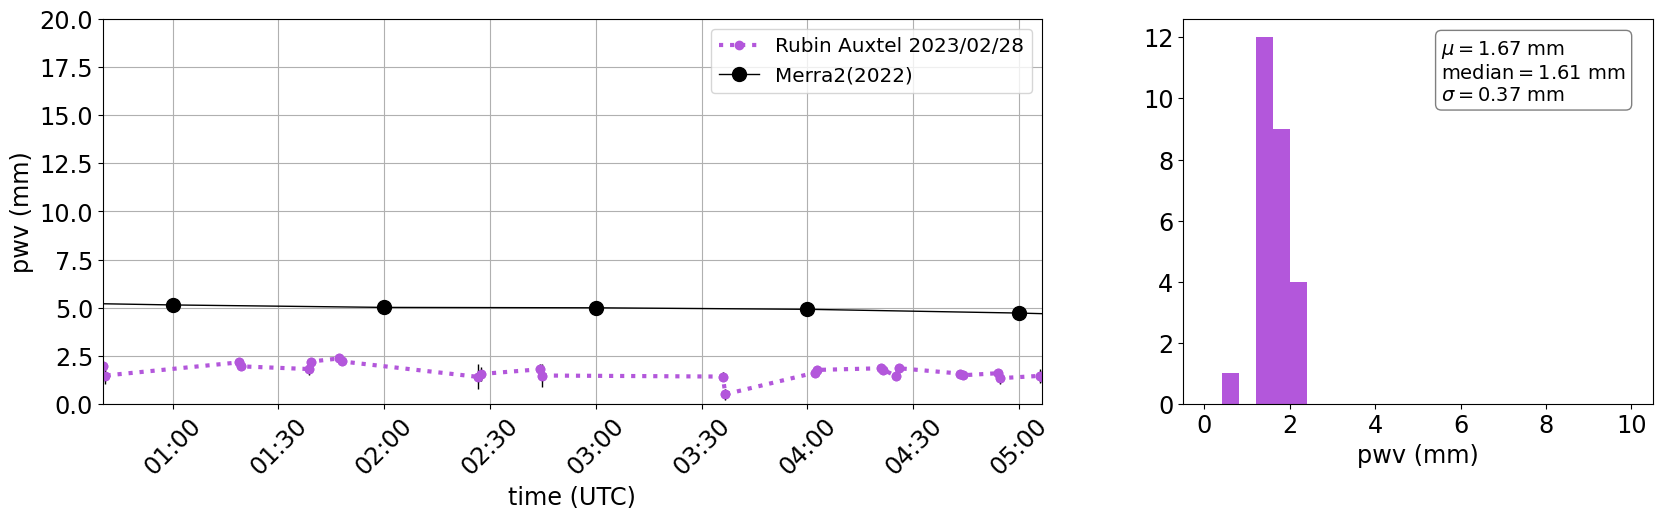

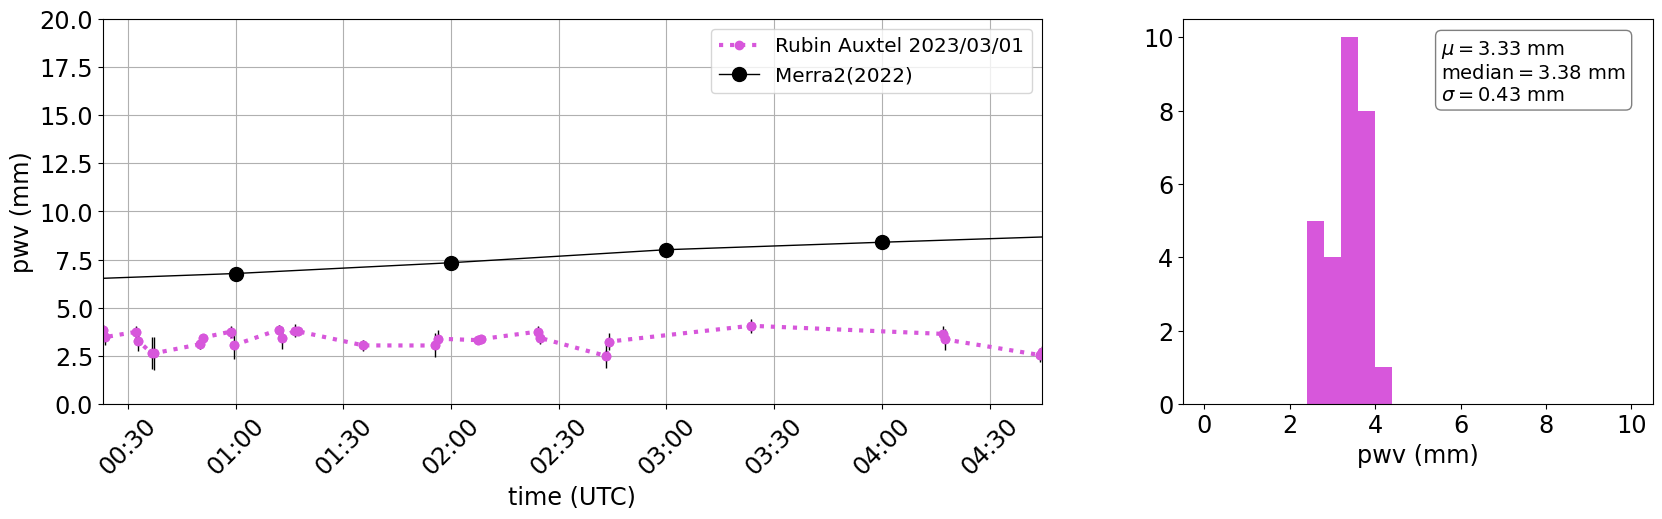

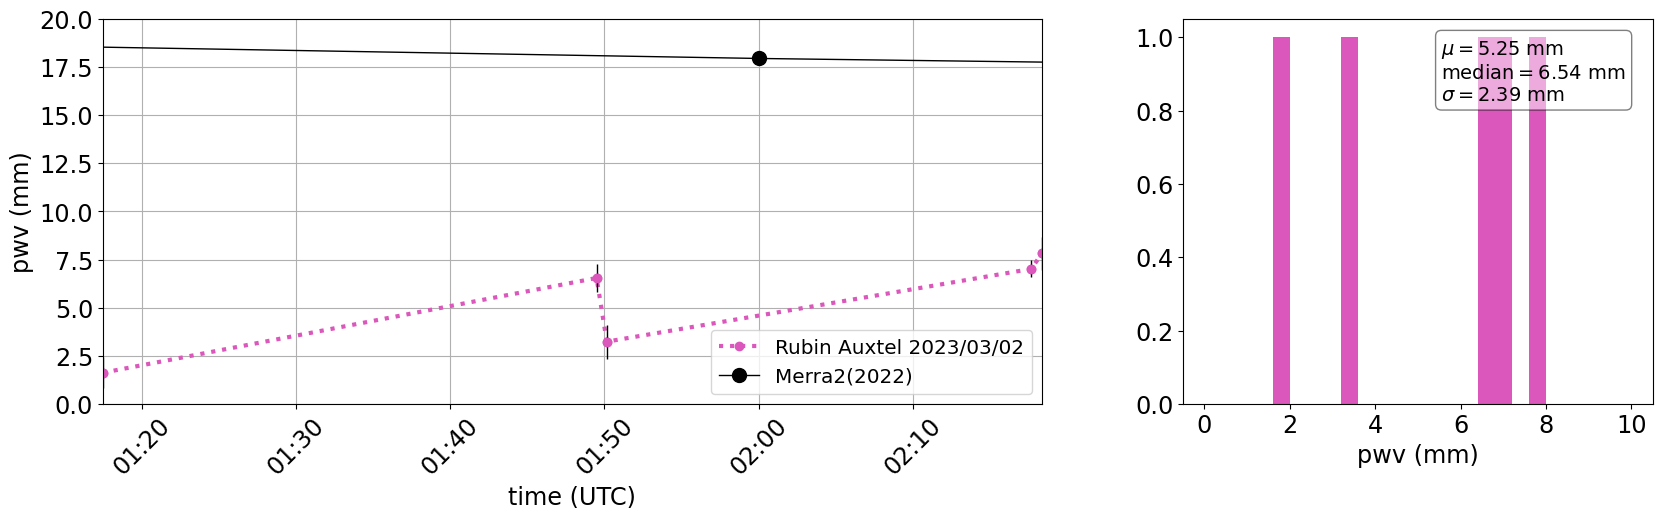

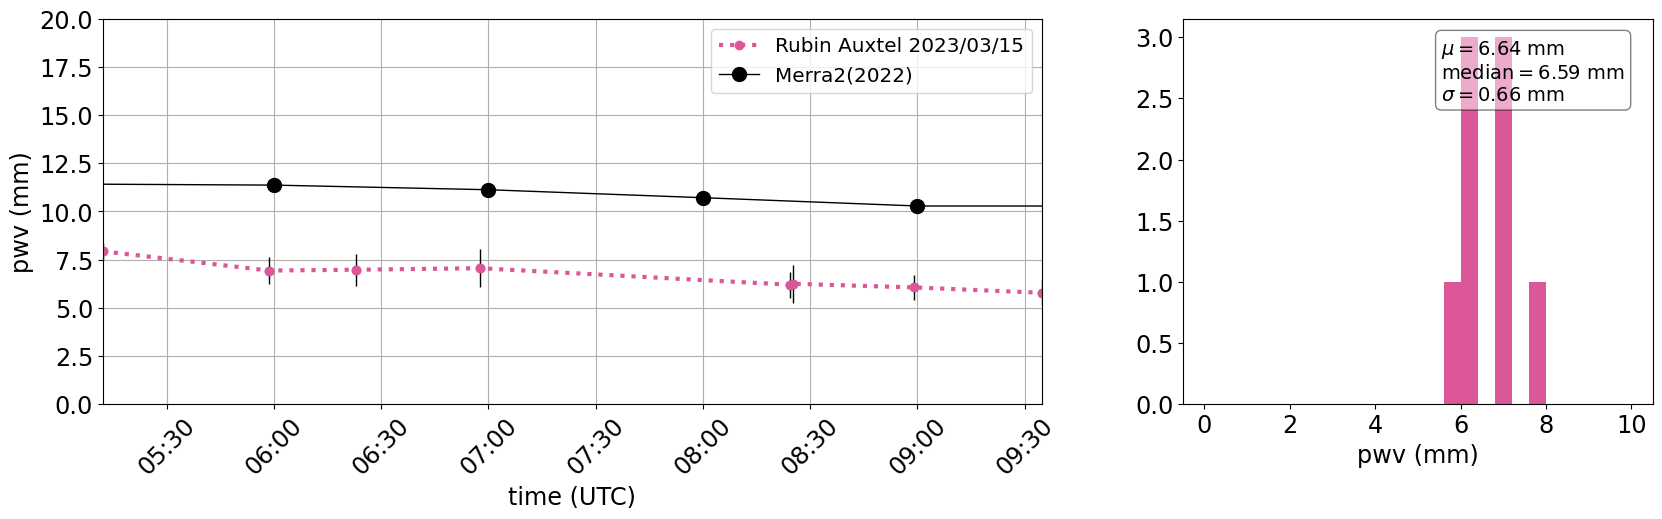

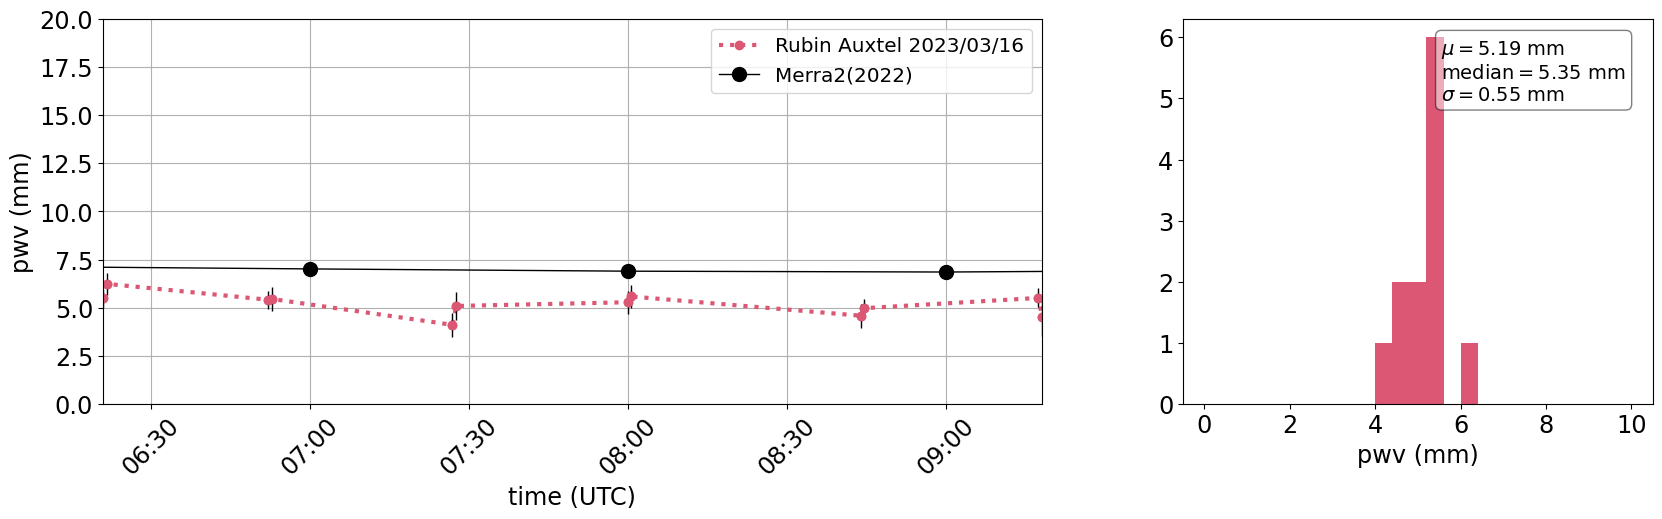

In [27]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    pwv= infos['pwv_avg'].values
    epwv= infos['pwv_sig'].values
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 



  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="Merra2(2022)")
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.legend()

    ax.set_xlim(start,end)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()
    ax.set_ylim(0.,20.)


    
    
    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(pwv,bins=25,range=(0,10),facecolor=hls_colors[idx])
    ax.set_xlabel("pwv (mm)")
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted pwv with polar star HD185975 : " + tags[idx]
    else:
        the_title = "Fitted pwv with all stars : " + tags[idx]
    #plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

In [28]:
len(all_df)

22

In [ ]:
fig = plt.figure(figsize=(12,30))

gs = gridspec.GridSpec(9, 1,height_ratios=[1,1,1,1,1,1,1,1,1],figure=fig)


for idx,infos in enumerate(all_df):
    
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    pwv= infos['pwv_avg'].values
    epwv= infos['pwv_sig'].values
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
   
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start

   
    
    ax= fig.add_subplot(gs[idx,0])
    
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 
  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="Merra2(2023)")
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    if idx == 0:
        ax.legend(loc='lower left')
    else:
        ax.legend(loc='upper left')
        
        
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    if idx ==0:
        ax.text(0.75, 0.40, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    else:
        ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
        
    ax.text(0.45, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=20,verticalalignment='top', bbox=props)
        
    ax.set_xlim(start,end)
 
    ax.grid()
    ax.set_ylim(0.,10.)


plt.suptitle(tag_stars)
plt.tight_layout()
figname = f"fig_pwv_prelim-2023_{tag_stars}.png"
plt.savefig(figname)
plt.show()
    

# Compute average per night

## PWV

In [29]:
all_nights_pwvauxtel = np.zeros((len(all_df),3))
all_nights_pwvmerra2 = np.zeros((len(all_df),3))
all_night_N = np.zeros(len(all_df))
all_labels = []

for idx,infos in enumerate(all_df):
    
    all_night_N[idx] = len(infos) 
    all_labels.append(tags[idx])
    
    if len(infos) == 0:
        all_nights_pwvauxtel[idx,0] = np.nan
        all_nights_pwvauxtel[idx,1] = np.nan
        all_nights_pwvauxtel[idx,2] = np.nan
        
        all_nights_pwvmerra2[idx,0] = np.nan
        all_nights_pwvmerra2[idx,1] = np.nan
        all_nights_pwvmerra2[idx,2] = np.nan
        
        continue
        
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    pwv= infos['pwv_avg'].values
    epwv= infos['pwv_sig'].values
    
    
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
    all_nights_pwvauxtel[idx,0] = mu
    all_nights_pwvauxtel[idx,1] = median
    all_nights_pwvauxtel[idx,2] = sigma
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]
    
    
    night_pwv_merra2 = []
    for idx_m2,dattim_m2 in enumerate(all_merra2_datetime):
        if dattim_m2 >= startTime and dattim_m2 <= endTime:
            night_pwv_merra2.append(pwv_merra2.iloc[idx_m2]) 
        
    night_pwv_merra2=np.array(night_pwv_merra2)
    
    mu_m = night_pwv_merra2.mean()
    median_m = np.median(night_pwv_merra2)
    sigma_m =night_pwv_merra2.std()
    
    all_nights_pwvmerra2[idx,0] = mu_m
    all_nights_pwvmerra2[idx,1] = median_m
    all_nights_pwvmerra2[idx,2] = sigma_m
    
    

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_45624/3736776466.py:52: RuntimeWarning: Mean of empty slice.
  mu_m = night_pwv_merra2.mean()
/Users/sylvie/mambaforge/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/sylvie/mambaforge/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sylvie/mambaforge/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/sylvie/mambaforge/lib/python3.10/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/sylvie/mambaforge/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value enc

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


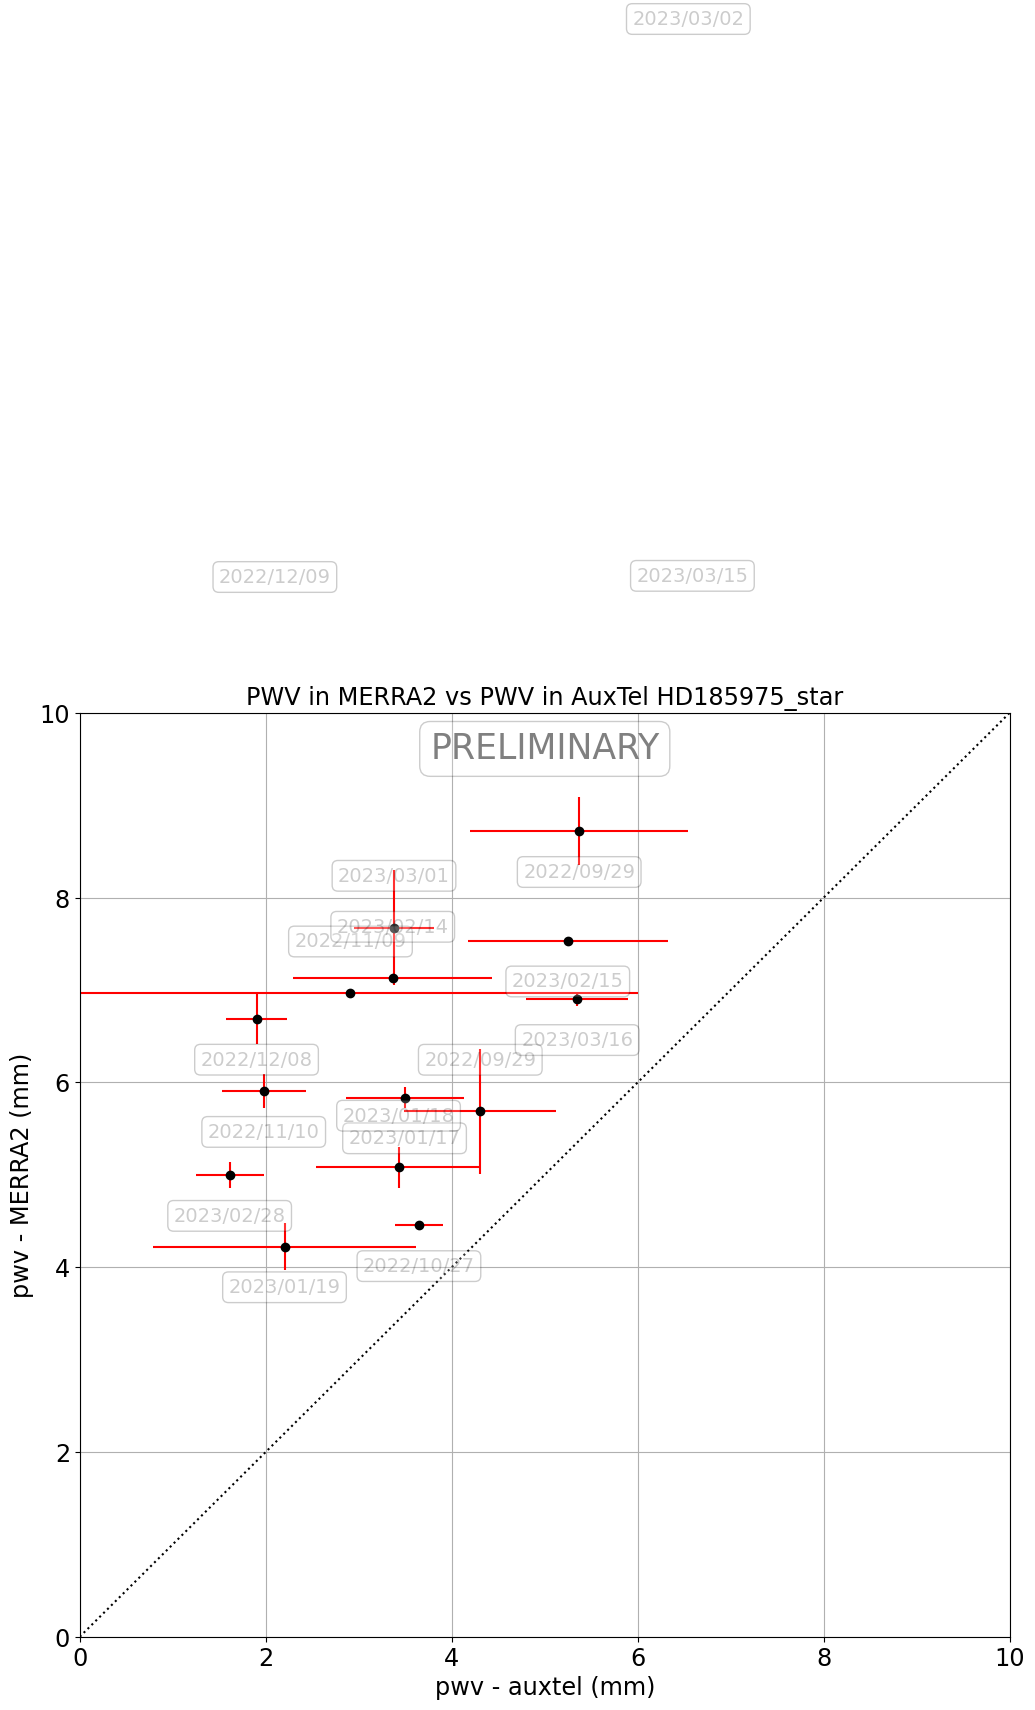

In [30]:
fig = plt.figure(figsize=(12,12))
props = dict(boxstyle='round', facecolor='white', alpha=0.2)

ax=fig.add_subplot(1,1,1)

ax.errorbar(all_nights_pwvauxtel[:,1],all_nights_pwvmerra2[:,1],xerr=all_nights_pwvauxtel[:,2], yerr=all_nights_pwvmerra2[:,2],marker="o",ls='none',ecolor="r",color="k")
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_title(f"PWV in MERRA2 vs PWV in AuxTel {tag_stars}")
ax.set_xlabel("pwv - auxtel (mm)")
ax.set_ylabel("pwv - MERRA2 (mm)")
ax.plot([0,10],[0,10],"k:")

for idx in range(len(all_nights_pwvauxtel[:,1])):
    
    if all_night_N[idx] == 0:
        continue
    
    xx=all_nights_pwvauxtel[idx,1]
    yy=all_nights_pwvmerra2[idx,1]
   
    if idx%2==0:
        yy+=0.5
    else:
        yy-=0.5
    
    
    #ax.text(xx, yy, tags[idx], transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    ax.text(xx, yy, all_labels[idx], fontsize=14,horizontalalignment='center', bbox=props,alpha=0.2)
    
ax.text(0.5, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=25,horizontalalignment='center', bbox=props)

ax.grid()
figname = f"fig_pwvm2vspwvaux_prelim_{tag_stars}.png"
plt.savefig(figname)
plt.show()

## Ozone

In [32]:
all_nights_ozauxtel = np.zeros((len(all_df),3))
all_nights_ozmerra2 = np.zeros((len(all_df),3))
all_night_N = np.zeros(len(all_df))
all_labels = []

for idx,infos in enumerate(all_df):
    
    
    all_labels.append(tags[idx])
    
    if len(infos) == 0 or idx<=2 :
        all_nights_ozauxtel[idx,0] = np.nan
        all_nights_ozauxtel[idx,1] = np.nan
        all_nights_ozauxtel[idx,2] = np.nan
        
        all_nights_ozmerra2[idx,0] = np.nan
        all_nights_ozmerra2[idx,1] = np.nan
        all_nights_ozmerra2[idx,2] = np.nan
        all_night_N[idx] = len(infos) 
        continue
        
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    oz= infos['oz_1'].values
    eoz= infos['eoz_1'].values
    
    
    
    mu = oz.mean()
    median = np.median(oz)
    sigma =oz.std()
    
    all_nights_ozauxtel[idx,0] = mu
    all_nights_ozauxtel[idx,1] = median
    all_nights_ozauxtel[idx,2] = sigma
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]
    
    
    night_oz_merra2 = []
    for idx_m2,dattim_m2 in enumerate(all_merra2_datetime):
        if dattim_m2 >= startTime and dattim_m2 <= endTime:
            night_oz_merra2.append(oz_merra2.iloc[idx_m2]) 
        
    night_oz_merra2=np.array(night_oz_merra2)
    
    mu_m = night_oz_merra2.mean()
    median_m = np.median(night_oz_merra2)
    sigma_m =night_oz_merra2.std()
    
    all_nights_ozmerra2[idx,0] = mu_m
    all_nights_ozmerra2[idx,1] = median_m
    all_nights_ozmerra2[idx,2] = sigma_m
    
    

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_45624/1695636342.py:52: RuntimeWarning: Mean of empty slice.
  mu_m = night_oz_merra2.mean()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


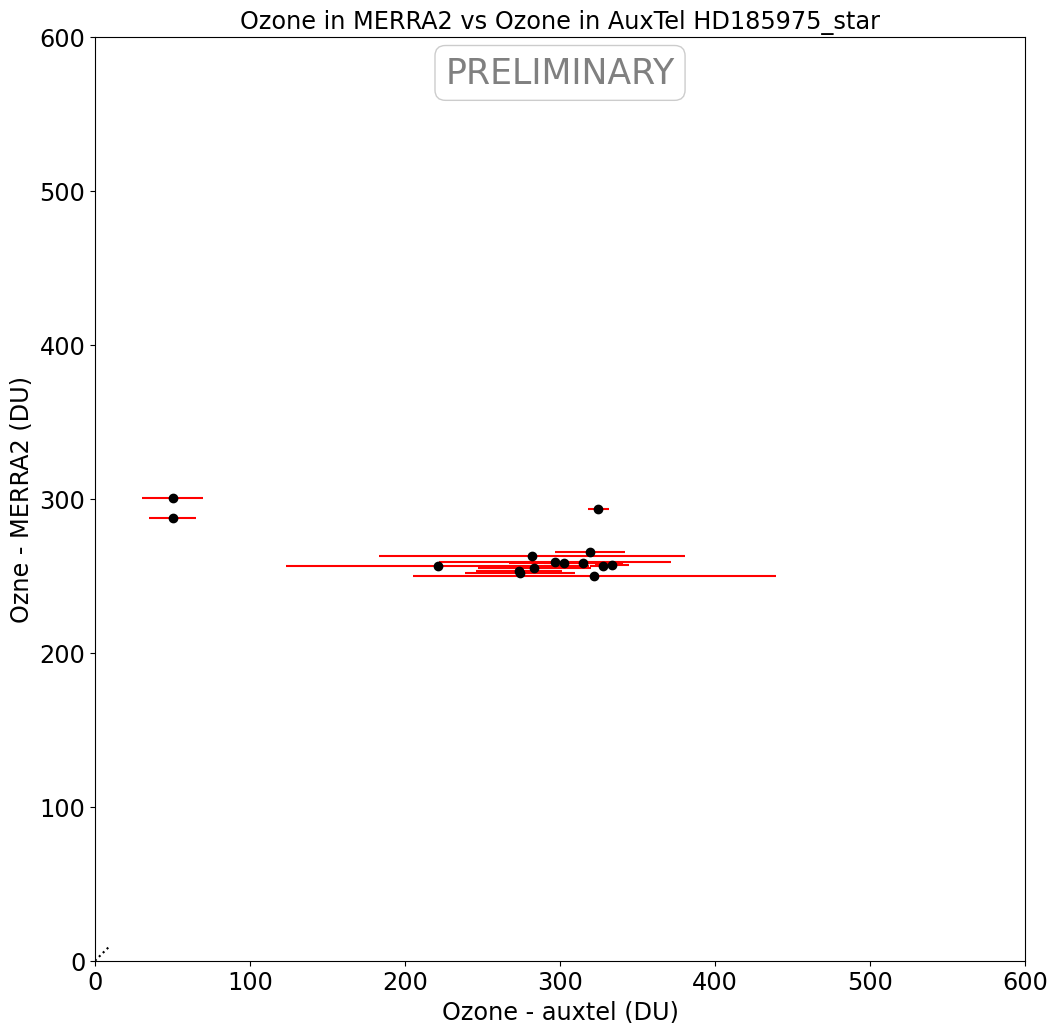

In [33]:
fig = plt.figure(figsize=(12,12))
props = dict(boxstyle='round', facecolor='white', alpha=0.2)

ax=fig.add_subplot(1,1,1)

ax.errorbar(all_nights_ozauxtel[:,1],all_nights_ozmerra2[:,1],xerr=all_nights_ozauxtel[:,2], yerr=all_nights_ozmerra2[:,2],marker="o",ls='none',ecolor="r",color="k")
ax.set_xlim(0,600)
ax.set_ylim(0,600)
ax.set_title(f"Ozone in MERRA2 vs Ozone in AuxTel {tag_stars}")
ax.set_xlabel("Ozone - auxtel (DU)")
ax.set_ylabel("Ozne - MERRA2 (DU)")
ax.plot([0,10],[0,10],"k:")

for idx in range(len(all_nights_pwvauxtel[:,1])):
    
    if all_night_N[idx] == 0:
        continue
    
    xx=all_nights_ozauxtel[idx,1]
    yy=all_nights_ozmerra2[idx,1]
   
    if idx%2==0:
        yy+=50
    else:
        yy-=50
    
    
    #ax.text(xx, yy, tags[idx], transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    ax.text(xx, yy, all_labels[idx], fontsize=14,horizontalalignment='center', bbox=props,alpha=0.2)
    
ax.text(0.5, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=25,horizontalalignment='center', bbox=props)

plt.grid()

ax.grid()
figname = f"fig_ozm2vsozaux_prelim_{tag_stars}.png"
plt.savefig(figname)
plt.show()